In [13]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline  

#reading the data: /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza processed.tsv
data = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza processed.tsv', sep='\t', header=11,index_col=0)
data

sample_01  sample_02  sample_03  sample_04  sample_05  \
gene_id                                                               
SPAC1002.01          66         31         42         29         22   
SPAC1002.02         302        180        420        305        210   
SPAC1002.03c       2136       1439       2109       2101       1315   
SPAC1002.04c        195        139        256        200        197   
SPAC1002.05c        135         83        149        132         94   
...                 ...        ...        ...        ...        ...   
SPNCRNA.995          69         20         69         36         15   
SPNCRNA.996          26         23         23         32         26   
SPNCRNA.997          17          0          6          2          7   
SPNCRNA.998          30          8         57         25         27   
SPNCRNA.999           6          4         14         15         16   

              sample_06  sample_07  sample_08  sample_09  sample_10  ...  \
gene_id                                                              ...   
SPAC1002.01          74         67         61         78        117  ...   
SPAC1002.02         480        517        491        672        618  ...   
SPAC1002.03c       2166       2993       2298       3532       2568  ...   
SPAC1002.04c        307        342        324        407        269  ...   
SPAC1002.05c        191        197        178        269        225  ...   
...                 ...        ...        ...        ...        ...  ...   
SPNCRNA.995          35        111         50         44         70  ...   
SPNCRNA.996          41         45         43         43         38  ...   
SPNCRNA.997           1          9          2          3         13  ...   
SPNCRNA.998          18         34         30         44         50  ...   
SPNCRNA.999           7          7         15         19         19  ...   

              sample_59  sample_60  sample_61  sample_62  sample_63  \
gene_id                                                               
SPAC1002.01         110         67         70         85         56   
SPAC1002.02         647        520        513        450        344   
SPAC1002.03c       2147       2286       2408       1618       1989   
SPAC1002.04c        412        499        438        287        305   
SPAC1002.05c        264        247        277        212        245   
...                 ...        ...        ...        ...        ...   
SPNCRNA.995          72         46         78         62        100   
SPNCRNA.996          65         71         46         70         36   
SPNCRNA.997          15         23          1          7         15   
SPNCRNA.998          37         39         28         20         44   
SPNCRNA.999          15         38          3         11         17   

              sample_64  sample_65  sample_66  sample_67  sample_68  
gene_id                                                              
SPAC1002.01          30        115         44         48         42  
SPAC1002.02         331        568        252        326        285  
SPAC1002.03c       1624       2662       1163       1545       1102  
SPAC1002.04c        335        360        245        244        300  
SPAC1002.05c        170        261        107        165        122  
...                 ...        ...        ...        ...        ...  
SPNCRNA.995          15         74         80        106         78  
SPNCRNA.996          70         74         35         20         32  
SPNCRNA.997           8         18         12         11         11  
SPNCRNA.998          33         47         21         19         26  
SPNCRNA.999           7         28         13         14         13  

[6737 rows x 68 columns]

In [14]:
#not entirely obvious what the antisense data is, so I will just ignore this for the moment
#reading the data: /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza antisense.tsv
#antisense = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza antisense.tsv', sep='\t', header=17,index_col=0)
#load the proper gene desc map /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv
gene_desc = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv', sep='\t', header=None,)
#indices=[]
#for i in antisense.index:
#    if i in gene_desc[0].values:
#        #if there is a value in the second column, that is not nan
#        if str(gene_desc[gene_desc[0]==i][2].values[0])!='nan':
            
#            indices.append(gene_desc[gene_desc[0]==i][2].values[0])
#        else:
#           indices.append(i)
            
#   else:
#           indices.append(i)
            
#antisense.index=indices



#do same for data
indices_=[]
for i in data.index:
    if i in gene_desc[0].values:
        #if there is a value in the second column, that is not nan
        if str(gene_desc[gene_desc[0]==i][2].values[0])!='nan':
            
            indices_.append(gene_desc[gene_desc[0]==i][2].values[0])
        else:
            indices_.append(i)
            
    else:
            indices_.append(i)
            
data.index=indices_


In [15]:
#add anti to the gene_ids
#antisense.index = ['anti-'+i for i in antisense.index]
#concatenate the two dataframes
#data = pd.concat([data,antisense],axis=0)
data.head()

sample_01  sample_02  sample_03  sample_04  sample_05  sample_06  \
mrx11         66         31         42         29         22         74   
pom34        302        180        420        305        210        480   
gls2        2136       1439       2109       2101       1315       2166   
taf11        195        139        256        200        197        307   
jmj2         135         83        149        132         94        191   

       sample_07  sample_08  sample_09  sample_10  ...  sample_59  sample_60  \
mrx11         67         61         78        117  ...        110         67   
pom34        517        491        672        618  ...        647        520   
gls2        2993       2298       3532       2568  ...       2147       2286   
taf11        342        324        407        269  ...        412        499   
jmj2         197        178        269        225  ...        264        247   

       sample_61  sample_62  sample_63  sample_64  sample_65  sample_66  \
mrx11         70         85         56         30        115         44   
pom34        513        450        344        331        568        252   
gls2        2408       1618       1989       1624       2662       1163   
taf11        438        287        305        335        360        245   
jmj2         277        212        245        170        261        107   

       sample_67  sample_68  
mrx11         48         42  
pom34        326        285  
gls2        1545       1102  
taf11        244        300  
jmj2         165        122  

[5 rows x 68 columns]

In [16]:
#load sample - genotype map from /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza sample - genotype map.xlsx
map = pd.read_excel('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza sample - genotype map.xlsx',header=None)
map.columns = ['sample','genotype']
#save genotypes
true_genotypes = map['genotype']
#if a genotype is in the list more than once, put an number after it
for i in map.genotype.unique():
    if i in map.genotype.value_counts()[map.genotype.value_counts()>1].index:
        map.loc[map.genotype==i,'genotype'] = [str(i)+"_rep_"+str(int(j)+1) for j in range(map.genotype.value_counts()[i])]


for i in data.columns:
    ind = np.where(map["sample"]==i)[0]
    #rename the ind-th column of data to the genotype of the sample
    data.rename(columns={i:map["genotype"][ind].values[0]},inplace=True)
data.head()

/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


R1_1_rep_1  R1_2  R1_4_rep_1  R1_3_rep_1  R1_5_rep_1  R1_6_rep_1  \
mrx11          66    31          42          29          22          74   
pom34         302   180         420         305         210         480   
gls2         2136  1439        2109        2101        1315        2166   
taf11         195   139         256         200         197         307   
jmj2          135    83         149         132          94         191   

       R1_7_rep_1  R1_8_rep_1  R1_9_rep_1  R1_10_rep_1  ...  R1_4_rep_2  \
mrx11          67          61          78          117  ...         110   
pom34         517         491         672          618  ...         647   
gls2         2993        2298        3532         2568  ...        2147   
taf11         342         324         407          269  ...         412   
jmj2          197         178         269          225  ...         264   

       R1_5_rep_2  R1_6_rep_2  R1_7_rep_2  R1_8_rep_2  R1_9_rep_2  \
mrx11          67          70          85          56          30   
pom34         520         513         450         344         331   
gls2         2286        2408        1618        1989        1624   
taf11         499         438         287         305         335   
jmj2          247         277         212         245         170   

       R1_10_rep_2  swc5_del_rep_1  swc5_del_rep_2  swc5_del_rep_3  
mrx11          115              44              48              42  
pom34          568             252             326             285  
gls2          2662            1163            1545            1102  
taf11          360             245             244             300  
jmj2           261             107             165             122  

[5 rows x 68 columns]

In [17]:
#save column names and indices, then create a numpy matrix of the data
col_names = data.columns
ind_names = data.index
data = data.values
data

array([[  66,   31,   42, ...,   44,   48,   42],
       [ 302,  180,  420, ...,  252,  326,  285],
       [2136, 1439, 2109, ..., 1163, 1545, 1102],
       ...,
       [  17,    0,    6, ...,   12,   11,   11],
       [  30,    8,   57, ...,   21,   19,   26],
       [   6,    4,   14, ...,   13,   14,   13]])

In [18]:
#perform deseq2 noramlisation on the data
#calculate row-wise geometric means
row_means = np.exp(np.mean(np.log(data+1),axis=1))
#create a matrix with the ratios of the datapoints to the row means
data_ = data/row_means[:,None]
#take the median of the ratios in each column
col_medians = np.median(data_,axis=0)
#divide data in each column by the median of the ratios in that column
data_ = data/col_medians


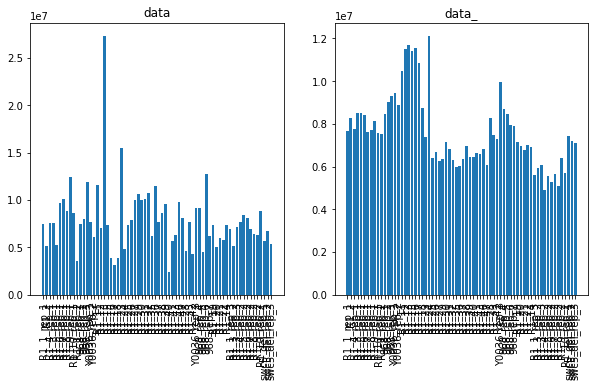

In [19]:
#plot the column totals in data and in data_
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(range(len(col_names)),np.sum(data,axis=0))
plt.xticks(range(len(col_names)),col_names,rotation=90)
plt.title('data')
plt.subplot(1,2,2)
plt.bar(range(len(col_names)),np.sum(data_,axis=0))
plt.xticks(range(len(col_names)),col_names,rotation=90)
plt.title('data_')
plt.show()


In [20]:
#import washing phenotypes /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste's original code/QTL mapping/washing_phenotypes.csv
washing = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste original code/QTL mapping/washing_phenotypes.csv',header=0,index_col=0)
washing.columns = ['genotype','phenotype']
#import filtering phenotypes /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste's original code/QTL mapping/filtering_phenotypes.csv
filtering = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Celeste original code/QTL mapping/filtering_phenotypes.csv',header=0,index_col=0)
filtering.columns = ['genotype','phenotype']
#merge the two dataframes by genotype, and name the phenotypes washing and filtering
phenotypes = pd.merge(washing,filtering,on='genotype')
phenotypes.columns = ['genotype','washing','filtering']
phenotypes

genotype   washing  filtering
0      X968  0.047930   0.081319
1     Y0036  0.172119   0.449411
2      R1_1  0.054247   0.104369
3     R1_10  0.028066   0.053252
4     R1_11  0.040438   0.063310
5     R1_12  0.421832   0.867539
6     R1_13  0.039811   0.021799
7     R1_14  0.042707   0.049553
8     R1_15  0.029537   0.031385
9     R1_16  0.023504   0.023788
10    R1_17  0.025863   0.184335
11    R1_18  0.151611   0.444932
12    R1_19  0.046443   0.028229
13     R1_2  0.061369   0.179664
14    R1_20  0.035152   0.025299
15    R1_21  0.043023   0.069683
16    R1_22  0.019350   0.026723
17    R1_23  0.034654   0.037370
18    R1_24  0.078209   0.495905
19    R1_25  0.038677   0.024313
20    R1_26  0.030804   0.022943
21    R1_27  0.038478   0.034667
22    R1_28  0.015525   0.026348
23    R1_29  0.019658   0.040922
24     R1_3  0.033055   0.054054
25    R1_30  0.020797   0.021091
26    R1_31  0.041101   0.033326
27    R1_32  0.028581   0.027360
28    R1_33  0.016066   0.020753
29    R1_34  0.480026   0.036712
30    R1_35  0.066556   0.033325
31    R1_36  0.516687   0.498841
32    R1_37  0.031920   0.028193
33    R1_38  0.025814   0.027578
34    R1_39  0.364000   0.209282
35     R1_4  1.019548   0.958473
36    R1_40  0.036280   0.278052
37    R1_41  0.014202   0.022958
38    R1_42  0.073556   0.049020
39    R1_43  0.058999   0.082602
40    R1_44  0.038950   0.054827
41    R1_45  1.009984   0.989494
42    R1_46  0.017455   0.025709
43    R1_47  0.099641   0.136854
44    R1_48  0.021858   0.072742
45    R1_49  0.133768   0.105369
46     R1_5  0.061934   0.219492
47    R1_50  0.402690   0.326797
48    R1_51  0.868284   0.412821
49    R1_52  0.534445   0.891084
50    R1_53  0.018397   0.064826
51    R1_54  1.024340   0.958329
52     R1_6  0.036447   0.033178
53     R1_7  1.020331   0.965270
54     R1_8  0.047120   0.112016
55     R1_9  0.034268   0.031571

In [21]:
#create an array called genotypes_to_retain, which has the entries from true_genotypes removing _rep_1 and _rep_2
genotypes_to_retain = [i.split('_rep_')[0] for i in true_genotypes]
#only retain the ones that are in the phenotypes dataframe
genotypes_to_retain = [i for i in genotypes_to_retain if i in phenotypes.genotype.values]
#subset col_names to include only the genotypes that are in genotypes_to_retain, or those + _rep_...
col_names_retained = [i for i in col_names if i in genotypes_to_retain or i.split('_rep_')[0] in genotypes_to_retain]
#index of which col_names were retained
ind = [i in col_names_retained for i in col_names]
#subset the data to only include the genotypes in genotypes_to_retain in the same order
data_full = data_.copy()
data_ = data_[:,ind]

#subset the phenotypes to only include the genotypes in genotypes_to_retain
#phenotypes = phenotypes[[i in genotypes_to_retain for i in phenotypes.genotype]]

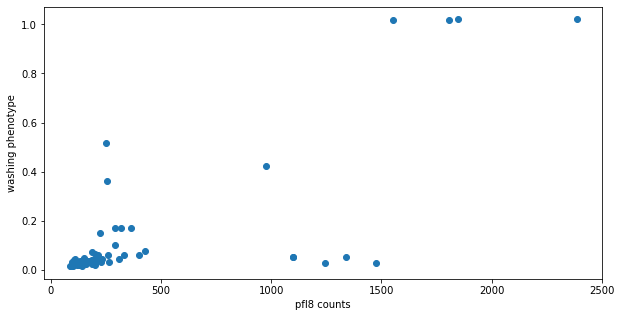

In [32]:

#plot pfl8 counts vs washing phenotype and save figure in bokeh
#find where ind_names is pfl8
pfl8_ind = np.where(ind_names=='pfl8')[0][0]
#plot with matplotlib
plt.figure(figsize=(10,5))
plt.scatter(data_[pfl8_ind,:],phenotypes_.washing)
plt.xlabel('pfl8 counts')
plt.ylabel('washing phenotype')
plt.show()

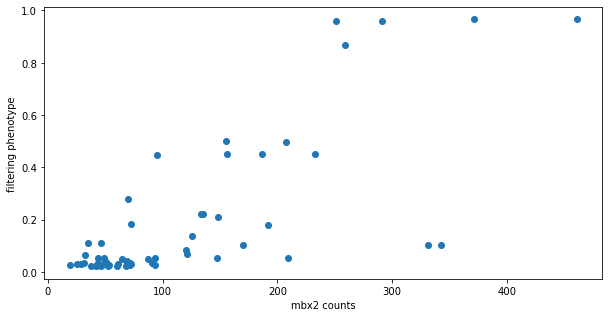

In [34]:
#plot mbx2 vs filtering phenotype
#find where ind_names is mbx2
mbx2_ind = np.where(ind_names=='mbx2')[0][0]
#plot with matplotlib
plt.figure(figsize=(10,5))
plt.scatter(data_[mbx2_ind,:],phenotypes_.filtering)
plt.xlabel('mbx2 counts')
plt.ylabel('filtering phenotype')
plt.show()





In [22]:
col_names_retained_wo_reps = [i.split('_rep_')[0] for i in col_names_retained]
import scipy.stats as st
#create a new df for phenotypes with reordering phenotypes such that genotype matches the order of those in col_names_retained_wo_reps
phenotypes_ = pd.DataFrame(columns=['genotype','washing','filtering'])
for i in col_names_retained_wo_reps:
    phenotypes_ = phenotypes_.append(phenotypes.loc[phenotypes.genotype==i,:])
phenotypes_.index = range(len(phenotypes_))
phenotypes_
#extrac the two phenotypes as arrays from the df
washing = phenotypes_['washing'].values
filtering = phenotypes_['filtering'].values


def find_correlated_genes(data,phenotype, only_sig=True, add_function=True):
    df = pd.DataFrame(columns=['gene','correlation','p-value'])
    with warnings.catch_warnings():
        for i in range(data.shape[0]):
            print(i/float(data.shape[0]))
            cor = st.pearsonr(data[i,:],phenotype)[:2]
            df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
    #perform bonferroni correction
    df['p-value adj'] = df['p-value']*df.shape[0]
    #order by p-value
    df = df.sort_values(by='p-value')
    #only retain significant ones
    if only_sig:
        df = df[df['p-value adj']<0.05]
    #for each gene add the function (column 4 in gene_desc)
    if add_function:
        #find the row in gene_desc where the gene name matches either the entry in column 0 or 2
        #add the function from column 4 to the df
        df['function'] = [gene_desc.loc[(gene_desc[0]==i) | (gene_desc[2]==i),4].to_string(index=False)  for i in df.gene]
        #if entry in function is 'Series([], )' then replace with 'unknown'
        df['function'] = [i if i!='Series([], )' else 'unknown' for i in df['function']]
        #if gene name has -antisense- in it, then look for what is after that, and see if it has a function
        #if it does, then add that function to the df
        df["sense function"] = df["function"]
        for i in range(df.shape[0]):
            if '-antisense-' in df.gene.values[i]:
                #find the gene name before -antisense-
                gene_name = df.gene.values[i].split('-antisense-')[0]
                #find the function of that gene
                function = gene_desc.loc[(gene_desc[0]==gene_name) | (gene_desc[2]==gene_name),4].to_string(index=False)
                #if the function is not 'Series([], )' then add it to the df
                if function!='Series([], )':
                    df['sense function'].values[i] = function
                else:
                    df['sense function'].values[i] = 'unknown'

    return df

wash_df = find_correlated_genes(data_,washing)
filt_df = find_correlated_genes(data_,filtering)
#get correlation for gsf2 and other genes
gsf2_vals = data_[ind_names=='gsf2',:]
gsf2_corr = find_correlated_genes(data_full,gsf2_vals[0])
#get correlation for gsf2 and other genes
gsf1_vals = data_[ind_names=='gsf1',:]
gsf1_corr = find_correlated_genes(data_full,gsf1_vals[0])
#get correlation for mbx2 and other genes
mbx2_vals = data_[ind_names=='mbx2',:]
mbx2_corr = find_correlated_genes(data_full,mbx2_vals[0])
#get correlation for cbf11 and other genes
cbf11_vals = data_[ind_names=="cbf11",:]
cbf11_corr = find_correlated_genes(data_full,cbf11_vals[0])
#get correlation for cbf12 and other genes
cbf12_vals = data_[ind_names=="cbf12",:]
cbf12_corr = find_correlated_genes(data_full,cbf12_vals[0])
puf5_vals = data_[ind_names=="puf5",:]
puf5_corr = find_correlated_genes(data_full,puf5_vals[0])

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  phenotypes_ = phenotypes_.append(phenotypes.loc[phenotypes.genotype==i,:])
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  phenotypes_ = phenotypes_.append(phenotypes.loc[phenotypes.genotype==i,:])
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  phenotypes_ = phenotypes_.append(phenotypes.loc[phenotypes.genotype==i,:])
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:6: FutureWarning: The frame.append method is 

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.006976398990648657
0.007124833011726288
0.007273267032803918
0.0074217010538815496
0.007570135074959181
0.007718569096036812
0.007867003117114442
0.008015437138192074
0.008163871159269705
0.008312305180347335


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.008460739201424967
0.008609173222502597
0.008757607243580228
0.00890604126465786
0.00905447528573549
0.009202909306813122
0.009351343327890753
0.009499777348968383
0.009648211370046015
0.009796645391123645
0.009945079412201277
0.010093513433278908
0.010241947454356538
0.01039038147543417
0.0105388154965118
0.01068724951758943
0.010835683538667063
0.010984117559744693
0.011132551580822325
0.011280985601899956
0.011429419622977586
0.011577853644055218
0.011726287665132848
0.011874721686210479
0.01202315570728811
0.012171589728365741
0.012320023749443373
0.012468457770521003


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.012616891791598634
0.012765325812676266
0.012913759833753896
0.013062193854831528
0.013210627875909159
0.013359061896986789
0.013507495918064421
0.013655929939142051
0.013804363960219682
0.013952797981297314
0.014101232002374944
0.014249666023452576
0.014398100044530206
0.014546534065607837
0.014694968086685469
0.014843402107763099
0.01499183612884073
0.015140270149918362
0.015288704170995992
0.015437138192073624
0.015585572213151254
0.015734006234228885
0.015882440255306517
0.01603087427638415
0.016179308297461777
0.01632774231853941
0.01647617633961704
0.01662461036069467
0.016773044381772302


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.016921478402849934
0.017069912423927563
0.017218346445005195
0.017366780466082827
0.017515214487160456
0.017663648508238088
0.01781208252931572
0.01796051655039335
0.01810895057147098
0.018257384592548612
0.018405818613626244
0.018554252634703873
0.018702686655781505
0.018851120676859137
0.018999554697936766
0.019147988719014398
0.01929642274009203
0.01944485676116966
0.01959329078224729
0.019741724803324923
0.019890158824402555
0.020038592845480183
0.020187026866557815
0.020335460887635447
0.020483894908713076
0.020632328929790708
0.02078076295086834
0.02092919697194597
0.0210776309930236
0.021226065014101233


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.02137449903517886
0.021522933056256494
0.021671367077334126
0.021819801098411758
0.021968235119489386
0.02211666914056702
0.02226510316164465
0.02241353718272228
0.02256197120379991
0.022710405224877543
0.022858839245955172
0.023007273267032804
0.023155707288110436
0.023304141309188064
0.023452575330265697
0.02360100935134333
0.023749443372420957
0.02389787739349859
0.02404631141457622
0.024194745435653853
0.024343179456731482
0.024491613477809114
0.024640047498886746
0.024788481519964375
0.024936915541042007
0.02508534956211964
0.025233783583197267
0.0253822176042749
0.02553065162535253
0.02567908564643016


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.025827519667507792
0.025975953688585424
0.026124387709663056
0.026272821730740685
0.026421255751818317
0.02656968977289595
0.026718123793973578
0.02686655781505121
0.027014991836128842
0.02716342585720647
0.027311859878284103
0.027460293899361735
0.027608727920439363
0.027757161941516995
0.027905595962594627
0.02805402998367226
0.028202464004749888
0.02835089802582752
0.028499332046905152
0.02864776606798278
0.028796200089060413
0.028944634110138045
0.029093068131215673
0.029241502152293306
0.029389936173370938
0.029538370194448566
0.029686804215526198
0.02983523823660383
0.02998367225768146
0.03013210627875909


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.030280540299836723
0.030428974320914355
0.030577408341991984
0.030725842363069616
0.030874276384147248
0.031022710405224876
0.03117114442630251
0.03131957844738014
0.03146801246845777
0.031616446489535405
0.03176488051061303
0.03191331453169066
0.0320617485527683
0.032210182573845926
0.032358616594923555
0.03250705061600119
0.03265548463707882
0.03280391865815645
0.03295235267923408
0.03310078670031171
0.03324922072138934
0.033397654742466976
0.033546088763544604
0.03369452278462223
0.03384295680569987
0.0339913908267775
0.034139824847855126
0.03428825886893276
0.03443669289001039
0.03458512691108802
0.034733560932165654


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.03488199495324328
0.03503042897432091
0.03517886299539855
0.035327297016476175
0.03547573103755381
0.03562416505863144
0.03577259907970907
0.0359210331007867
0.03606946712186433
0.03621790114294196
0.036366335164019596
0.036514769185097225
0.03666320320617485
0.03681163722725249
0.03696007124833012
0.037108505269407746
0.03725693929048538
0.03740537331156301
0.03755380733264064
0.037702241353718274
0.0378506753747959
0.03799910939587353
0.03814754341695117
0.038295977438028796
0.038444411459106424
0.03859284548018406
0.03874127950126169
0.03888971352233932
0.03903814754341695
0.03918658156449458


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.03933501558557221
0.039483449606649845
0.039631883627727474
0.03978031764880511
0.03992875166988274
0.04007718569096037
0.040225619712038
0.04037405373311563
0.04052248775419326
0.040670921775270895
0.04081935579634852
0.04096778981742615
0.04111622383850379
0.041264657859581416
0.041413091880659045
0.04156152590173668
0.04170995992281431
0.04185839394389194
0.04200682796496957
0.0421552619860472
0.04230369600712483
0.042452130028202466
0.042600564049280094
0.04274899807035772
0.04289743209143536


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.04304586611251299
0.043194300133590616
0.04334273415466825
0.04349116817574588
0.043639602196823515
0.043788036217901144
0.04393647023897877
0.04408490426005641
0.04423333828113404
0.044381772302211665
0.0445302063232893
0.04467864034436693
0.04482707436544456
0.044975508386522194
0.04512394240759982
0.04527237642867745
0.045420810449755086
0.045569244470832715
0.045717678491910343
0.04586611251298798
0.04601454653406561
0.046162980555143236
0.04631141457622087
0.0464598485972985
0.04660828261837613
0.046756716639453764
0.04690515066053139
0.04705358468160902


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.04720201870268666
0.047350452723764286
0.047498886744841914
0.04764732076591955
0.04779575478699718
0.047944188808074814
0.04809262282915244
0.04824105685023007
0.04838949087130771
0.048537924892385335
0.048686358913462964
0.0488347929345406
0.04898322695561823
0.04913166097669586
0.04928009499777349
0.04942852901885112
0.04957696303992875
0.049725397061006385
0.049873831082084014
0.05002226510316164
0.05017069912423928
0.050319133145316906
0.050467567166394535
0.05061600118747217
0.0507644352085498
0.05091286922962743
0.05106130325070506


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.05120973727178269
0.05135817129286032
0.051506605313937956
0.051655039335015585
0.05180347335609321
0.05195190737717085
0.05210034139824848
0.05224877541932611
0.05239720944040374
0.05254564346148137
0.052694077482559006
0.052842511503636634
0.05299094552471426
0.0531393795457919
0.05328781356686953
0.053436247587947155
0.05358468160902479
0.05373311563010242
0.05388154965118005
0.054029983672257684
0.05417841769333531
0.05432685171441294
0.054475285735490576
0.054623719756568205
0.054772153777645834
0.05492058779872347


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.0550690218198011
0.055217455840878726
0.05536588986195636
0.05551432388303399
0.05566275790411162
0.055811191925189255
0.05595962594626688
0.05610805996734452
0.05625649398842215
0.056404928009499776
0.05655336203057741
0.05670179605165504
0.05685023007273267
0.056998664093810304
0.05714709811488793
0.05729553213596556
0.0574439661570432
0.057592400178120826
0.057740834199198454
0.05788926822027609
0.05803770224135372
0.05818613626243135
0.05833457028350898
0.05848300430458661
0.05863143832566424
0.058779872346741875
0.058928306367819504
0.05907674038889713


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.05922517440997477
0.059373608431052396
0.059522042452130025
0.05967047647320766
0.05981891049428529
0.05996734451536292
0.06011577853644055
0.06026421255751818
0.06041264657859582
0.060561080599673446
0.060709514620751075
0.06085794864182871
0.06100638266290634
0.06115481668398397
0.0613032507050616
0.06145168472613923
0.06160011874721686
0.061748552768294496
0.061896986789372124
0.06204542081044975
0.06219385483152739
0.06234228885260502
0.062490722873682646
0.06263915689476028
0.06278759091583791
0.06293602493691554
0.06308445895799317
0.06323289297907081
0.06338132700014844
0.06352976102122607


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.0636781950423037
0.06382662906338132
0.06397506308445895
0.0641234971055366
0.06427193112661422
0.06442036514769185
0.06456879916876948
0.06471723318984711
0.06486566721092474
0.06501410123200238
0.06516253525308001
0.06531096927415764
0.06545940329523527
0.0656078373163129
0.06575627133739052
0.06590470535846817
0.0660531393795458
0.06620157340062342
0.06635000742170105
0.06649844144277868
0.06664687546385632
0.06679530948493395
0.06694374350601158
0.06709217752708921
0.06724061154816684
0.06738904556924447
0.06753747959032211
0.06768591361139974
0.06783434763247737
0.067982781653555
0.06813121567463262


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.06827964969571025
0.0684280837167879
0.06857651773786552
0.06872495175894315
0.06887338578002078
0.06902181980109841
0.06917025382217604
0.06931868784325368
0.06946712186433131
0.06961555588540894
0.06976398990648656
0.0699124239275642
0.07006085794864182
0.07020929196971946
0.0703577259907971
0.07050616001187472
0.07065459403295235
0.07080302805402998
0.07095146207510762
0.07109989609618525
0.07124833011726288
0.07139676413834051
0.07154519815941814
0.07169363218049576
0.0718420662015734
0.07199050022265104
0.07213893424372866
0.07228736826480629


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.07243580228588392
0.07258423630696155
0.07273267032803919
0.07288110434911682
0.07302953837019445
0.07317797239127208
0.0733264064123497
0.07347484043342734
0.07362327445450498
0.0737717084755826
0.07392014249666023
0.07406857651773786
0.07421701053881549
0.07436544455989312
0.07451387858097076
0.07466231260204839
0.07481074662312602
0.07495918064420365
0.07510761466528128
0.07525604868635892
0.07540448270743655
0.07555291672851418
0.0757013507495918
0.07584978477066943
0.07599821879174706
0.0761466528128247
0.07629508683390233
0.07644352085497996
0.07659195487605759
0.07674038889713522
0.07688882291821285


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.07703725693929049
0.07718569096036812
0.07733412498144575
0.07748255900252338
0.077630993023601
0.07777942704467863
0.07792786106575628
0.0780762950868339
0.07822472910791153
0.07837316312898916
0.07852159715006679
0.07867003117114442
0.07881846519222206
0.07896689921329969
0.07911533323437732
0.07926376725545495
0.07941220127653258
0.07956063529761022
0.07970906931868785
0.07985750333976548
0.0800059373608431
0.08015437138192073
0.08030280540299836
0.080451239424076
0.08059967344515363
0.08074810746623126


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.08089654148730889
0.08104497550838652
0.08119340952946415
0.08134184355054179
0.08149027757161942
0.08163871159269705
0.08178714561377468
0.0819355796348523
0.08208401365592993
0.08223244767700758
0.0823808816980852
0.08252931571916283
0.08267774974024046
0.08282618376131809
0.08297461778239572
0.08312305180347336
0.08327148582455099
0.08341991984562862
0.08356835386670625
0.08371678788778388
0.08386522190886152
0.08401365592993915
0.08416208995101677
0.0843105239720944


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.08445895799317203
0.08460739201424966
0.0847558260353273
0.08490426005640493
0.08505269407748256
0.08520112809856019
0.08534956211963782
0.08549799614071545
0.08564643016179309
0.08579486418287072
0.08594329820394835
0.08609173222502597
0.0862401662461036
0.08638860026718123
0.08653703428825887
0.0866854683093365
0.08683390233041413
0.08698233635149176
0.08713077037256939
0.08727920439364703
0.08742763841472466


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.08757607243580229
0.08772450645687992
0.08787294047795755
0.08802137449903517
0.08816980852011282
0.08831824254119044
0.08846667656226807
0.0886151105833457
0.08876354460442333
0.08891197862550096
0.0890604126465786
0.08920884666765623
0.08935728068873386
0.08950571470981149
0.08965414873088912
0.08980258275196674
0.08995101677304439
0.09009945079412202
0.09024788481519964
0.09039631883627727
0.0905447528573549
0.09069318687843253


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.09084162089951017
0.0909900549205878
0.09113848894166543
0.09128692296274306
0.09143535698382069
0.09158379100489833
0.09173222502597596
0.09188065904705359
0.09202909306813122
0.09217752708920884
0.09232596111028647
0.09247439513136411
0.09262282915244174
0.09277126317351937
0.092919697194597
0.09306813121567463
0.09321656523675226
0.0933649992578299
0.09351343327890753
0.09366186729998516
0.09381030132106279
0.09395873534214041
0.09410716936321804
0.09425560338429569


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.09440403740537331
0.09455247142645094
0.09470090544752857
0.0948493394686062
0.09499777348968383
0.09514620751076147
0.0952946415318391
0.09544307555291673
0.09559150957399436
0.09573994359507199
0.09588837761614963
0.09603681163722726
0.09618524565830489
0.09633367967938251
0.09648211370046014
0.09663054772153777
0.09677898174261541
0.09692741576369304
0.09707584978477067
0.0972242838058483
0.09737271782692593
0.09752115184800356
0.0976695858690812
0.09781801989015883
0.09796645391123646
0.09811488793231408
0.09826332195339171
0.09841175597446934


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.09856018999554698
0.09870862401662461
0.09885705803770224
0.09900549205877987
0.0991539260798575
0.09930236010093513
0.09945079412201277
0.0995992281430904
0.09974766216416803
0.09989609618524566
0.10004453020632328
0.10019296422740093
0.10034139824847856
0.10048983226955618
0.10063826629063381
0.10078670031171144
0.10093513433278907
0.10108356835386671
0.10123200237494434
0.10138043639602197
0.1015288704170996
0.10167730443817723
0.10182573845925486
0.1019741724803325


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.10212260650141013
0.10227104052248776
0.10241947454356538
0.10256790856464301
0.10271634258572064
0.10286477660679828
0.10301321062787591
0.10316164464895354
0.10331007867003117
0.1034585126911088
0.10360694671218643
0.10375538073326407
0.1039038147543417
0.10405224877541933
0.10420068279649695
0.10434911681757458
0.10449755083865223
0.10464598485972985
0.10479441888080748
0.10494285290188511
0.10509128692296274
0.10523972094404037
0.10538815496511801
0.10553658898619564


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.10568502300727327
0.1058334570283509
0.10598189104942853
0.10613032507050615
0.1062787590915838
0.10642719311266143
0.10657562713373905
0.10672406115481668
0.10687249517589431
0.10702092919697194
0.10716936321804958
0.10731779723912721
0.10746623126020484
0.10761466528128247
0.1077630993023601
0.10791153332343774
0.10805996734451537
0.108208401365593


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.10835683538667062
0.10850526940774825
0.10865370342882588
0.10880213744990352
0.10895057147098115
0.10909900549205878
0.10924743951313641
0.10939587353421404
0.10954430755529167
0.10969274157636931
0.10984117559744694
0.10998960961852457
0.1101380436396022
0.11028647766067982
0.11043491168175745
0.1105833457028351
0.11073177972391272
0.11088021374499035
0.11102864776606798
0.11117708178714561
0.11132551580822324
0.11147394982930088


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.11162238385037851
0.11177081787145614
0.11191925189253377
0.1120676859136114
0.11221611993468904
0.11236455395576667
0.1125129879768443
0.11266142199792192
0.11280985601899955
0.11295829004007718
0.11310672406115482
0.11325515808223245
0.11340359210331008
0.11355202612438771
0.11370046014546534
0.11384889416654297
0.11399732818762061
0.11414576220869824
0.11429419622977587
0.1144426302508535
0.11459106427193112
0.11473949829300875
0.1148879323140864
0.11503636633516402
0.11518480035624165
0.11533323437731928
0.11548166839839691


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.11563010241947454
0.11577853644055218
0.11592697046162981
0.11607540448270744
0.11622383850378507
0.1163722725248627
0.11652070654594034
0.11666914056701796
0.1168175745880956
0.11696600860917322
0.11711444263025085
0.11726287665132848
0.11741131067240612
0.11755974469348375
0.11770817871456138
0.11785661273563901
0.11800504675671664
0.11815348077779426
0.11830191479887191
0.11845034881994954
0.11859878284102716
0.11874721686210479
0.11889565088318242
0.11904408490426005
0.11919251892533769
0.11934095294641532


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.11948938696749295
0.11963782098857058
0.11978625500964821
0.11993468903072584
0.12008312305180348
0.1202315570728811
0.12037999109395874
0.12052842511503636
0.12067685913611399
0.12082529315719163
0.12097372717826926
0.12112216119934689
0.12127059522042452
0.12141902924150215
0.12156746326257978
0.12171589728365742
0.12186433130473505
0.12201276532581268
0.1221611993468903
0.12230963336796793
0.12245806738904556
0.1226065014101232
0.12275493543120083


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.12290336945227846
0.12305180347335609
0.12320023749443372
0.12334867151551135
0.12349710553658899
0.12364553955766662
0.12379397357874425
0.12394240759982188
0.1240908416208995
0.12423927564197713
0.12438770966305478
0.1245361436841324
0.12468457770521003
0.12483301172628766
0.12498144574736529
0.12512987976844292
0.12527831378952056
0.12542674781059818
0.12557518183167582
0.12572361585275346
0.12587204987383108
0.12602048389490872
0.12616891791598633
0.12631735193706398
0.12646578595814162
0.12661421997921923
0.12676265400029688
0.1269110880213745
0.12705952204245213


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.12720795606352975
0.1273563900846074
0.12750482410568503
0.12765325812676265
0.1278016921478403
0.1279501261689179
0.12809856018999555
0.1282469942110732
0.1283954282321508
0.12854386225322845
0.12869229627430606
0.1288407302953837
0.12898916431646135
0.12913759833753896
0.1292860323586166
0.12943446637969422
0.12958290040077186
0.12973133442184948
0.12987976844292712
0.13002820246400476
0.13017663648508238


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.13032507050616002
0.13047350452723763
0.13062193854831528
0.13077037256939292
0.13091880659047053
0.13106724061154817
0.1312156746326258
0.13136410865370343
0.13151254267478105
0.1316609766958587
0.13180941071693633
0.13195784473801395
0.1321062787590916
0.1322547127801692
0.13240314680124685
0.1325515808223245


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1327000148434021
0.13284844886447975
0.13299688288555736
0.133145316906635
0.13329375092771265
0.13344218494879026
0.1335906189698679
0.13373905299094552
0.13388748701202316
0.13403592103310077
0.13418435505417842
0.13433278907525606
0.13448122309633367
0.13462965711741132
0.13477809113848893
0.13492652515956657
0.13507495918064422
0.13522339320172183
0.13537182722279947
0.1355202612438771
0.13566869526495473
0.13581712928603235
0.13596556330711
0.13611399732818763
0.13626243134926525


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1364108653703429
0.1365592993914205
0.13670773341249814
0.1368561674335758
0.1370046014546534
0.13715303547573104
0.13730146949680866
0.1374499035178863
0.13759833753896394
0.13774677156004156
0.1378952055811192
0.13804363960219682
0.13819207362327446
0.13834050764435207
0.13848894166542972
0.13863737568650736
0.13878580970758497
0.13893424372866262
0.13908267774974023
0.13923111177081787
0.13937954579189551
0.13952797981297313
0.13967641383405077
0.1398248478551284
0.13997328187620603


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.14012171589728364
0.1402701499183613
0.14041858393943893
0.14056701796051654
0.1407154519815942
0.1408638860026718
0.14101232002374944
0.14116075404482709
0.1413091880659047
0.14145762208698234
0.14160605610805996
0.1417544901291376
0.14190292415021524
0.14205135817129286
0.1421997921923705
0.14234822621344811
0.14249666023452576
0.14264509425560337
0.14279352827668101
0.14294196229775866
0.14309039631883627
0.14323883033991391
0.14338726436099153
0.14353569838206917
0.1436841324031468
0.14383256642422443


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.14398100044530207
0.14412943446637969
0.14427786848745733
0.14442630250853494
0.14457473652961259
0.14472317055069023
0.14487160457176784
0.14502003859284548
0.1451684726139231
0.14531690663500074
0.14546534065607838
0.145613774677156
0.14576220869823364
0.14591064271931126
0.1460590767403889
0.14620751076146654
0.14635594478254416
0.1465043788036218
0.1466528128246994
0.14680124684577706
0.14694968086685467
0.1470981148879323
0.14724654890900996
0.14739498293008757
0.1475434169511652
0.14769185097224283
0.14784028499332047
0.1479887190143981


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.14813715303547573
0.14828558705655337
0.14843402107763098
0.14858245509870863
0.14873088911978624
0.14887932314086388
0.14902775716194153
0.14917619118301914
0.14932462520409678
0.1494730592251744
0.14962149324625204
0.14976992726732968
0.1499183612884073
0.15006679530948494
0.15021522933056256
0.1503636633516402
0.15051209737271784
0.15066053139379545
0.1508089654148731
0.1509573994359507
0.15110583345702835
0.15125426747810597
0.1514027014991836
0.15155113552026125
0.15169956954133887
0.1518480035624165
0.15199643758349413
0.15214487160457177


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1522933056256494
0.15244173964672703
0.15259017366780467
0.15273860768888228
0.15288704170995993
0.15303547573103754
0.15318390975211518
0.15333234377319283
0.15348077779427044
0.15362921181534808
0.1537776458364257
0.15392607985750334
0.15407451387858098
0.1542229478996586
0.15437138192073624
0.15451981594181385
0.1546682499628915
0.15481668398396914
0.15496511800504675
0.1551135520261244
0.155261986047202
0.15541042006827965
0.15555885408935727
0.1557072881104349
0.15585572213151255
0.15600415615259017


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1561525901736678
0.15630102419474542
0.15644945821582307
0.1565978922369007
0.15674632625797832
0.15689476027905597
0.15704319430013358
0.15719162832121122
0.15734006234228884
0.15748849636336648
0.15763693038444412
0.15778536440552174
0.15793379842659938
0.158082232447677
0.15823066646875464
0.15837910048983228
0.1585275345109099
0.15867596853198754
0.15882440255306515
0.1589728365741428
0.15912127059522044
0.15926970461629805
0.1594181386373757
0.1595665726584533
0.15971500667953095
0.15986344070060857
0.1600118747216862


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.16016030874276385
0.16030874276384147
0.1604571767849191
0.16060561080599672
0.16075404482707437
0.160902478848152
0.16105091286922962
0.16119934689030727
0.16134778091138488
0.16149621493246252
0.16164464895354014
0.16179308297461778
0.16194151699569542
0.16208995101677304
0.16223838503785068
0.1623868190589283
0.16253525308000594
0.16268368710108358
0.1628321211221612
0.16298055514323884
0.16312898916431645
0.1632774231853941
0.16342585720647174
0.16357429122754935
0.163722725248627
0.1638711592697046
0.16401959329078225


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.16416802731185987
0.1643164613329375
0.16446489535401515
0.16461332937509277
0.1647617633961704
0.16491019741724802
0.16505863143832566
0.1652070654594033
0.16535549948048092
0.16550393350155856
0.16565236752263618
0.16580080154371382
0.16594923556479144
0.16609766958586908
0.16624610360694672
0.16639453762802434
0.16654297164910198
0.1666914056701796
0.16683983969125724
0.16698827371233488
0.1671367077334125
0.16728514175449014
0.16743357577556775
0.1675820097966454
0.16773044381772304
0.16787887783880065
0.1680273118598783
0.1681757458809559
0.16832417990203355


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.16847261392311116
0.1686210479441888
0.16876948196526645
0.16891791598634406
0.1690663500074217
0.16921478402849932
0.16936321804957696
0.1695116520706546
0.16966008609173222
0.16980852011280986
0.16995695413388748
0.17010538815496512
0.17025382217604276
0.17040225619712038
0.17055069021819802
0.17069912423927563
0.17084755826035328
0.1709959922814309
0.17114442630250853
0.17129286032358618
0.1714412943446638
0.17158972836574143
0.17173816238681905


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1718865964078967
0.17203503042897433
0.17218346445005195
0.1723318984711296
0.1724803324922072
0.17262876651328485
0.17277720053436246
0.1729256345554401
0.17307406857651775
0.17322250259759536
0.173370936618673
0.17351937063975062
0.17366780466082826
0.1738162386819059
0.17396467270298352
0.17411310672406116
0.17426154074513878
0.17440997476621642
0.17455840878729406
0.17470684280837168
0.17485527682944932


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.17500371085052693
0.17515214487160458
0.1753005788926822
0.17544901291375983
0.17559744693483748
0.1757458809559151
0.17589431497699273
0.17604274899807035
0.176191183019148
0.17633961704022563
0.17648805106130325
0.1766364850823809
0.1767849191034585
0.17693335312453615
0.17708178714561376
0.1772302211666914
0.17737865518776905
0.17752708920884666
0.1776755232299243
0.17782395725100192


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.17797239127207956
0.1781208252931572
0.17826925931423482
0.17841769333531246
0.17856612735639008
0.17871456137746772
0.17886299539854536
0.17901142941962297
0.17915986344070062
0.17930829746177823
0.17945673148285587
0.1796051655039335
0.17975359952501113
0.17990203354608877
0.1800504675671664
0.18019890158824403
0.18034733560932165
0.1804957696303993
0.18064420365147693
0.18079263767255455
0.1809410716936322
0.1810895057147098
0.18123793973578745
0.18138637375686506
0.1815348077779427
0.18168324179902035


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.18183167582009796
0.1819801098411756
0.18212854386225322
0.18227697788333086
0.1824254119044085
0.18257384592548612
0.18272227994656376
0.18287071396764137
0.18301914798871902
0.18316758200979666
0.18331601603087427
0.18346445005195192
0.18361288407302953
0.18376131809410717
0.1839097521151848
0.18405818613626243
0.18420662015734007
0.1843550541784177
0.18450348819949533
0.18465192222057294
0.1848003562416506
0.18494879026272823
0.18509722428380584
0.1852456583048835
0.1853940923259611
0.18554252634703874
0.18569096036811636


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.185839394389194
0.18598782841027164
0.18613626243134926
0.1862846964524269
0.18643313047350452
0.18658156449458216
0.1867299985156598
0.18687843253673742
0.18702686655781506
0.18717530057889267
0.18732373459997032
0.18747216862104796
0.18762060264212557
0.18776903666320321
0.18791747068428083
0.18806590470535847
0.1882143387264361
0.18836277274751373
0.18851120676859137
0.188659640789669
0.18880807481074663
0.18895650883182424
0.18910494285290189
0.18925337687397953
0.18940181089505714
0.18955024491613479


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1896986789372124
0.18984711295829004
0.18999554697936766
0.1901439810004453
0.19029241502152294
0.19044084904260056
0.1905892830636782
0.19073771708475581
0.19088615110583346
0.1910345851269111
0.19118301914798871
0.19133145316906636
0.19147988719014397
0.19162832121122161
0.19177675523229926
0.19192518925337687
0.1920736232744545
0.19222205729553213
0.19237049131660977
0.19251892533768739
0.19266735935876503
0.19281579337984267
0.19296422740092029
0.19311266142199793
0.19326109544307554


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.19340952946415318
0.19355796348523083
0.19370639750630844
0.19385483152738608
0.1940032655484637
0.19415169956954134
0.19430013359061896
0.1944485676116966
0.19459700163277424
0.19474543565385186
0.1948938696749295
0.1950423036960071
0.19519073771708476
0.1953391717381624
0.19548760575924
0.19563603978031766
0.19578447380139527
0.1959329078224729
0.19608134184355056
0.19622977586462817
0.1963782098857058
0.19652664390678343
0.19667507792786107
0.19682351194893868
0.19697194597001633
0.19712037999109397


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.19726881401217158
0.19741724803324923
0.19756568205432684
0.19771411607540448
0.19786255009648213
0.19801098411755974
0.19815941813863738
0.198307852159715
0.19845628618079264
0.19860472020187026
0.1987531542229479
0.19890158824402554
0.19905002226510315
0.1991984562861808
0.1993468903072584
0.19949532432833605
0.1996437583494137
0.1997921923704913
0.19994062639156895
0.20008906041264657
0.2002374944337242
0.20038592845480185
0.20053436247587947
0.2006827964969571


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.20083123051803473
0.20097966453911237
0.20112809856018998
0.20127653258126763
0.20142496660234527
0.20157340062342288
0.20172183464450053
0.20187026866557814
0.20201870268665578
0.20216713670773342
0.20231557072881104
0.20246400474988868
0.2026124387709663
0.20276087279204394
0.20290930681312155
0.2030577408341992
0.20320617485527684
0.20335460887635445
0.2035030428974321
0.2036514769185097
0.20379991093958735
0.203948344960665
0.2040967789817426
0.20424521300282025


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.20439364702389787
0.2045420810449755
0.20469051506605315
0.20483894908713077
0.2049873831082084
0.20513581712928602
0.20528425115036367
0.20543268517144128
0.20558111919251892
0.20572955321359657
0.20587798723467418
0.20602642125575182
0.20617485527682944
0.20632328929790708
0.20647172331898472
0.20662015734006234
0.20676859136113998
0.2069170253822176
0.20706545940329524
0.20721389342437285
0.2073623274454505
0.20751076146652814
0.20765919548760575


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2078076295086834
0.207956063529761
0.20810449755083865
0.2082529315719163
0.2084013655929939
0.20854979961407155
0.20869823363514917
0.2088466676562268
0.20899510167730445
0.20914353569838207
0.2092919697194597
0.20944040374053732
0.20958883776161497
0.20973727178269258
0.20988570580377022
0.21003413982484787
0.21018257384592548
0.21033100786700312
0.21047944188808074
0.21062787590915838
0.21077630993023602
0.21092474395131364


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.21107317797239128
0.2112216119934689
0.21137004601454654
0.21151848003562415
0.2116669140567018
0.21181534807777944
0.21196378209885705
0.2121122161199347
0.2122606501410123
0.21240908416208995
0.2125575181831676
0.2127059522042452
0.21285438622532285
0.21300282024640046
0.2131512542674781
0.21329968828855575
0.21344812230963336
0.213596556330711
0.21374499035178862
0.21389342437286626
0.21404185839394388
0.21419029241502152
0.21433872643609916
0.21448716045717678
0.21463559447825442
0.21478402849933204


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.21493246252040968
0.21508089654148732
0.21522933056256494
0.21537776458364258
0.2155261986047202
0.21567463262579784
0.21582306664687548
0.2159715006679531
0.21611993468903073
0.21626836871010835
0.216416802731186
0.2165652367522636
0.21671367077334125
0.2168621047944189
0.2170105388154965
0.21715897283657415
0.21730740685765176
0.2174558408787294
0.21760427489980705
0.21775270892088466
0.2179011429419623
0.21804957696303992
0.21819801098411756
0.21834644500519518
0.21849487902627282
0.21864331304735046


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.21879174706842808
0.21894018108950572
0.21908861511058333
0.21923704913166098
0.21938548315273862
0.21953391717381623
0.21968235119489388
0.2198307852159715
0.21997921923704913
0.22012765325812678
0.2202760872792044
0.22042452130028203
0.22057295532135965
0.2207213893424373
0.2208698233635149
0.22101825738459255
0.2211666914056702
0.2213151254267478
0.22146355944782545
0.22161199346890306
0.2217604274899807
0.22190886151105835
0.22205729553213596
0.2222057295532136


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.22235416357429122
0.22250259759536886
0.22265103161644648
0.22279946563752412
0.22294789965860176
0.22309633367967938
0.22324476770075702
0.22339320172183463
0.22354163574291228
0.22369006976398992
0.22383850378506753
0.22398693780614518
0.2241353718272228
0.22428380584830043
0.22443223986937808
0.2245806738904557
0.22472910791153333
0.22487754193261095
0.2250259759536886
0.2251744099747662


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.22532284399584385
0.2254712780169215
0.2256197120379991
0.22576814605907675
0.22591658008015436
0.226065014101232
0.22621344812230965
0.22636188214338726
0.2265103161644649
0.22665875018554252
0.22680718420662016
0.22695561822769778
0.22710405224877542
0.22725248626985306
0.22740092029093067
0.22754935431200832
0.22769778833308593
0.22784622235416357
0.22799465637524122
0.22814309039631883
0.22829152441739647
0.2284399584384741
0.22858839245955173
0.22873682648062937
0.228885260501707


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.22903369452278463
0.22918212854386225
0.2293305625649399
0.2294789965860175
0.22962743060709515
0.2297758646281728
0.2299242986492504
0.23007273267032805
0.23022116669140566
0.2303696007124833
0.23051803473356094
0.23066646875463856
0.2308149027757162
0.23096333679679382
0.23111177081787146
0.23126020483894907
0.23140863886002672
0.23155707288110436
0.23170550690218197
0.23185394092325962
0.23200237494433723
0.23215080896541487
0.23229924298649252
0.23244767700757013


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.23259611102864777
0.2327445450497254
0.23289297907080303
0.23304141309188067
0.2331898471129583
0.23333828113403593
0.23348671515511354
0.2336351491761912
0.2337835831972688
0.23393201721834644
0.2340804512394241
0.2342288852605017
0.23437731928157934
0.23452575330265696
0.2346741873237346
0.23482262134481224
0.23497105536588986
0.2351194893869675
0.23526792340804512
0.23541635742912276
0.23556479145020037
0.23571322547127802
0.23586165949235566
0.23601009351343327
0.23615852753451091
0.23630696155558853


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.23645539557666617
0.23660382959774381
0.23675226361882143
0.23690069763989907
0.2370491316609767
0.23719756568205433
0.23734599970313197
0.23749443372420959
0.23764286774528723
0.23779130176636484
0.23793973578744249
0.2380881698085201
0.23823660382959774
0.23838503785067539
0.238533471871753
0.23868190589283064
0.23883033991390826
0.2389787739349859
0.23912720795606354
0.23927564197714116
0.2394240759982188
0.23957251001929641


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.23972094404037406
0.23986937806145167
0.2400178120825293
0.24016624610360696
0.24031468012468457
0.2404631141457622
0.24061154816683983
0.24075998218791747
0.2409084162089951
0.24105685023007273
0.24120528425115037
0.24135371827222799
0.24150215229330563
0.24165058631438327


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.24179902033546088
0.24194745435653853
0.24209588837761614
0.24224432239869378
0.2423927564197714
0.24254119044084904
0.24268962446192668
0.2428380584830043
0.24298649250408194
0.24313492652515956
0.2432833605462372
0.24343179456731484
0.24358022858839246
0.2437286626094701
0.2438770966305477
0.24402553065162536
0.24417396467270297
0.2443223986937806
0.24447083271485825
0.24461926673593587
0.2447677007570135
0.24491613477809113
0.24506456879916877
0.2452130028202464
0.24536143684132403
0.24550987086240167
0.24565830488347928
0.24580673890455693
0.24595517292563457
0.24610360694671218
0.24625204096778983
0.24640047498886744
0.24654890900994508
0.2466973430310227
0.24684577705210034
0.24699421107317798
0.2471426450942556


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.24729107911533324
0.24743951313641085
0.2475879471574885
0.24773638117856614
0.24788481519964375
0.2480332492207214
0.248181683241799
0.24833011726287665
0.24847855128395427
0.2486269853050319
0.24877541932610955
0.24892385334718717
0.2490722873682648
0.24922072138934243
0.24936915541042007
0.2495175894314977
0.24966602345257533
0.24981445747365297
0.24996289149473058
0.2501113255158082
0.25025975953688584
0.2504081935579635
0.2505566275790411
0.25070506160011874
0.25085349562119635
0.251001929642274
0.25115036366335164
0.25129879768442925
0.2514472317055069


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.25159566572658454
0.25174409974766215
0.25189253376873977
0.25204096778981744
0.25218940181089505
0.25233783583197267
0.25248626985305034
0.25263470387412795
0.25278313789520557
0.25293157191628324
0.25308000593736085
0.25322843995843847
0.2533768739795161
0.25352530800059375
0.25367374202167137
0.253822176042749
0.25397061006382665
0.25411904408490427
0.2542674781059819
0.2544159121270595
0.25456434614813717
0.2547127801692148
0.2548612141902924
0.25500964821137007
0.2551580822324477
0.2553065162535253
0.25545495027460297
0.2556033842956806
0.2557518183167582
0.2559002523378358
0.2560486863589135


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2561971203799911
0.2563455544010687
0.2564939884221464
0.256642422443224
0.2567908564643016
0.2569392904853792
0.2570877245064569
0.2572361585275345
0.2573845925486121
0.2575330265696898
0.2576814605907674
0.257829894611845
0.2579783286329227
0.2581267626540003
0.2582751966750779
0.25842363069615554
0.2585720647172332
0.2587204987383108
0.25886893275938844
0.2590173667804661
0.2591658008015437
0.25931423482262134
0.25946266884369895
0.2596111028647766
0.25975953688585424


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.25990797090693185
0.2600564049280095
0.26020483894908714
0.26035327297016475
0.26050170699124237
0.26065014101232004
0.26079857503339765
0.26094700905447527
0.26109544307555294
0.26124387709663055
0.26139231111770816
0.26154074513878584
0.26168917915986345
0.26183761318094106
0.2619860472020187
0.26213448122309635
0.26228291524417396
0.2624313492652516
0.26257978328632925
0.26272821730740686


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2628766513284845
0.2630250853495621
0.26317351937063976
0.2633219533917174
0.263470387412795
0.26361882143387266
0.2637672554549503
0.2639156894760279
0.26406412349710556
0.2642125575181832
0.2643609915392608
0.2645094255603384
0.2646578595814161
0.2648062936024937
0.2649547276235713
0.265103161644649
0.2652515956657266
0.2654000296868042
0.2655484637078818
0.2656968977289595
0.2658453317500371
0.2659937657711147
0.2661421997921924
0.26629063381327
0.2664390678343476
0.2665875018554253
0.2667359358765029
0.2668843698975805
0.26703280391865813
0.2671812379397358
0.2673296719608134
0.26747810598189103
0.2676265400029687


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2677749740240463
0.26792340804512393
0.26807184206620155
0.2682202760872792
0.26836871010835683
0.26851714412943445
0.2686655781505121
0.26881401217158973
0.26896244619266735


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.26911088021374496
0.26925931423482263
0.26940774825590025
0.26955618227697786
0.26970461629805553
0.26985305031913315
0.27000148434021076
0.27014991836128843
0.27029835238236605
0.27044678640344366
0.2705952204245213
0.27074365444559895
0.27089208846667656
0.2710405224877542
0.27118895650883185
0.27133739052990946


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2714858245509871
0.2716342585720647
0.27178269259314236
0.27193112661422
0.2720795606352976
0.27222799465637526
0.2723764286774529
0.2725248626985305
0.27267329671960816
0.2728217307406858
0.2729701647617634
0.273118598782841
0.2732670328039187
0.2734154668249963
0.2735639008460739
0.2737123348671516
0.2738607688882292


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2740092029093068
0.2741576369303844
0.2743060709514621
0.2744545049725397
0.2746029389936173
0.274751373014695
0.2748998070357726
0.2750482410568502
0.2751966750779279
0.2753451090990055
0.2754935431200831
0.27564197714116073
0.2757904111622384
0.275938845183316
0.27608727920439363
0.2762357132254713
0.2763841472465489
0.27653258126762653
0.27668101528870415
0.2768294493097818
0.27697788333085943
0.27712631735193705
0.2772747513730147
0.27742318539409233
0.27757161941516995
0.27772005343624756
0.27786848745732523
0.27801692147840285
0.27816535549948046
0.27831378952055813
0.27846222354163574
0.27861065756271336
0.27875909158379103
0.27890752560486864
0.27905595962594626
0.2792043936470239
0.27935282766810154
0.27950126168917916


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2796496957102568
0.27979812973133444
0.27994656375241206
0.2800949977734897
0.2802434317945673
0.28039186581564496
0.2805402998367226
0.2806887338578002
0.28083716787887786
0.2809856018999555
0.2811340359210331
0.28128246994211076
0.2814309039631884
0.281579337984266
0.2817277720053436
0.28187620602642127
0.2820246400474989
0.2821730740685765
0.28232150808965417
0.2824699421107318
0.2826183761318094
0.282766810152887
0.2829152441739647
0.2830636781950423
0.2832121122161199
0.2833605462371976
0.2835089802582752
0.2836574142793528
0.2838058483004305


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2839542823215081
0.2841027163425857
0.28425115036366333
0.284399584384741
0.2845480184058186
0.28469645242689623
0.2848448864479739
0.2849933204690515
0.28514175449012913
0.28529018851120674
0.2854386225322844
0.28558705655336203
0.28573549057443964
0.2858839245955173
0.28603235861659493
0.28618079263767254
0.2863292266587502
0.28647766067982783
0.28662609470090544
0.28677452872198306
0.2869229627430607
0.28707139676413834
0.28721983078521596
0.2873682648062936
0.28751669882737124
0.28766513284844886


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.28781356686952647
0.28796200089060414
0.28811043491168176
0.28825886893275937
0.28840730295383704
0.28855573697491466
0.28870417099599227
0.2888526050170699
0.28900103903814756
0.28914947305922517
0.2892979070803028
0.28944634110138046
0.28959477512245807
0.2897432091435357
0.28989164316461336
0.29004007718569097
0.2901885112067686
0.2903369452278462
0.29048537924892387
0.2906338132700015
0.2907822472910791
0.29093068131215677
0.2910791153332344


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.291227549354312
0.2913759833753896
0.2915244173964673
0.2916728514175449
0.2918212854386225
0.2919697194597002
0.2921181534807778
0.2922665875018554
0.2924150215229331
0.2925634555440107
0.2927118895650883
0.2928603235861659
0.2930087576072436
0.2931571916283212
0.2933056256493988
0.2934540596704765
0.2936024936915541
0.2937509277126317
0.29389936173370934
0.294047795754787
0.2941962297758646
0.29434466379694224
0.2944930978180199
0.2946415318390975
0.29478996586017514
0.2949383998812528
0.2950868339023304
0.29523526792340804
0.29538370194448565


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2955321359655633
0.29568056998664094
0.29582900400771855
0.2959774380287962
0.29612587204987384
0.29627430607095145
0.29642274009202907
0.29657117411310674
0.29671960813418435
0.29686804215526197
0.29701647617633964
0.29716491019741725
0.29731334421849487
0.2974617782395725
0.29761021226065015
0.29775864628172777


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is cons

0.2979070803028054
0.29805551432388305
0.29820394834496067
0.2983523823660383
0.29850081638711595
0.29864925040819357
0.2987976844292712
0.2989461184503488
0.29909455247142647
0.2992429864925041
0.2993914205135817
0.29953985453465937
0.299688288555737
0.2998367225768146
0.2999851565978922
0.3001335906189699
0.3002820246400475
0.3004304586611251
0.3005788926822028
0.3007273267032804
0.300875760724358
0.3010241947454357
0.3011726287665133
0.3013210627875909


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3014694968086685
0.3016179308297462
0.3017663648508238
0.3019147988719014
0.3020632328929791
0.3022116669140567
0.3023601009351343
0.30250853495621194
0.3026569689772896
0.3028054029983672
0.30295383701944484
0.3031022710405225
0.3032507050616001
0.30339913908267774
0.3035475731037554
0.303696007124833
0.30384444114591064
0.30399287516698825
0.3041413091880659
0.30428974320914354
0.30443817723022115
0.3045866112512988
0.30473504527237644
0.30488347929345405
0.30503191331453167


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.30518034733560934
0.30532878135668695
0.30547721537776457
0.30562564939884224
0.30577408341991985
0.30592251744099747
0.3060709514620751
0.30621938548315275
0.30636781950423037
0.306516253525308
0.30666468754638565
0.30681312156746327
0.3069615555885409
0.30710998960961855
0.30725842363069616
0.3074068576517738
0.3075552916728514
0.30770372569392906
0.3078521597150067
0.3080005937360843
0.30814902775716196
0.3082974617782396


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3084458957993172
0.3085943298203948
0.3087427638414725
0.3088911978625501
0.3090396318836277
0.3091880659047054
0.309336499925783
0.3094849339468606
0.3096333679679383
0.3097818019890159
0.3099302360100935
0.3100786700311711
0.3102271040522488
0.3103755380733264
0.310523972094404
0.3106724061154817
0.3108208401365593
0.3109692741576369
0.31111770817871454
0.3112661421997922
0.3114145762208698
0.31156301024194744
0.3117114442630251
0.3118598782841027
0.31200831230518034
0.312156746326258


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scip

0.3123051803473356
0.31245361436841323
0.31260204838949085
0.3127504824105685
0.31289891643164613
0.31304735045272375
0.3131957844738014
0.31334421849487903
0.31349265251595665
0.31364108653703426
0.31378952055811193
0.31393795457918955
0.31408638860026716
0.31423482262134483
0.31438325664242245
0.31453169066350006
0.3146801246845777
0.31482855870565535
0.31497699272673296
0.3151254267478106
0.31527386076888825
0.31542229478996586
0.3155707288110435
0.31571916283212115
0.31586759685319876
0.3160160308742764
0.316164464895354
0.31631289891643166


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3164613329375093
0.3166097669585869
0.31675820097966456
0.3169066350007422
0.3170550690218198
0.3172035030428974
0.3173519370639751
0.3175003710850527
0.3176488051061303
0.317797239127208
0.3179456731482856
0.3180941071693632
0.3182425411904409
0.3183909752115185
0.3185394092325961
0.3186878432536737
0.3188362772747514
0.318984711295829
0.3191331453169066
0.3192815793379843
0.3194300133590619
0.3195784473801395
0.31972688140121713
0.3198753154222948
0.3200237494433724
0.32017218346445003
0.3203206174855277
0.3204690515066053
0.32061748552768293
0.3207659195487606
0.3209143535698382


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.32106278759091583
0.32121122161199345
0.3213596556330711
0.32150808965414873
0.32165652367522635
0.321804957696304
0.32195339171738163
0.32210182573845925
0.32225025975953686
0.32239869378061453
0.32254712780169215
0.32269556182276976
0.32284399584384743
0.32299242986492505
0.32314086388600266
0.3232892979070803
0.32343773192815795
0.32358616594923556
0.3237345999703132
0.32388303399139085
0.32403146801246846
0.3241799020335461
0.32432833605462374
0.32447677007570136
0.324625204096779
0.3247736381178566
0.32492207213893426
0.3250705061600119


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3252189401810895
0.32536737420216716
0.3255158082232448
0.3256642422443224
0.3258126762654
0.3259611102864777
0.3261095443075553
0.3262579783286329
0.3264064123497106
0.3265548463707882
0.3267032803918658
0.3268517144129435
0.3270001484340211
0.3271485824550987
0.3272970164761763
0.327445450497254
0.3275938845183316
0.3277423185394092
0.3278907525604869
0.3280391865815645
0.3281876206026421
0.32833605462371973
0.3284844886447974
0.328632922665875
0.32878135668695263
0.3289297907080303
0.3290782247291079
0.32922665875018553
0.3293750927712632
0.3295235267923408


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.32967196081341843
0.32982039483449604
0.3299688288555737
0.33011726287665133
0.33026569689772894
0.3304141309188066
0.33056256493988423
0.33071099896096184
0.33085943298203946
0.33100786700311713
0.33115630102419474
0.33130473504527236
0.33145316906635003
0.33160160308742764
0.33175003710850526
0.3318984711295829
0.33204690515066054
0.33219533917173816
0.3323437731928158
0.33249220721389344
0.33264064123497106
0.33278907525604867
0.33293750927712634
0.33308594329820396
0.33323437731928157
0.3333828113403592
0.33353124536143686
0.33367967938251447
0.3338281134035921
0.33397654742466976


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.33412498144574737
0.334273415466825
0.3344218494879026
0.33457028350898027
0.3347187175300579
0.3348671515511355
0.33501558557221317
0.3351640195932908
0.3353124536143684
0.33546088763544607
0.3356093216565237
0.3357577556776013
0.3359061896986789
0.3360546237197566
0.3362030577408342
0.3363514917619118
0.3364999257829895
0.3366483598040671
0.3367967938251447
0.33694522784622233
0.3370936618673
0.3372420958883776
0.33739052990945523
0.3375389639305329
0.3376873979516105
0.3378358319726881
0.3379842659937658
0.3381327000148434
0.338281134035921
0.33842956805699864
0.3385780020780763


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3387264360991539
0.33887487012023154
0.3390233041413092
0.3391717381623868
0.33932017218346444
0.33946860620454206
0.3396170402256197
0.33976547424669734
0.33991390826777496
0.3400623422888526
0.34021077630993024
0.34035921033100786
0.3405076443520855
0.34065607837316314
0.34080451239424076
0.34095294641531837
0.34110138043639604
0.34124981445747365
0.34139824847855127
0.34154668249962894
0.34169511652070655
0.34184355054178417
0.3419919845628618
0.34214041858393945
0.34228885260501707
0.3424372866260947
0.34258572064717235
0.34273415466824997
0.3428825886893276
0.3430310227104052
0.34317945673148287


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3433278907525605
0.3434763247736381
0.34362475879471577
0.3437731928157934
0.343921626836871
0.34407006085794867
0.3442184948790263
0.3443669289001039
0.3445153629211815
0.3446637969422592
0.3448122309633368
0.3449606649844144
0.3451090990054921
0.3452575330265697
0.3454059670476473
0.3455544010687249
0.3457028350898026
0.3458512691108802
0.3459997031319578
0.3461481371530355
0.3462965711741131
0.3464450051951907
0.3465934392162684
0.346741873237346
0.3468903072584236
0.34703874127950124
0.3471871753005789
0.3473356093216565
0.34748404334273414


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3476324773638118
0.3477809113848894
0.34792934540596704
0.34807777942704465
0.3482262134481223
0.34837464746919994
0.34852308149027755
0.3486715155113552
0.34881994953243284
0.34896838355351045
0.3491168175745881
0.34926525159566574
0.34941368561674335
0.34956211963782097
0.34971055365889864
0.34985898767997625
0.35000742170105387
0.35015585572213154
0.35030428974320915
0.35045272376428677
0.3506011577853644
0.35074959180644205
0.35089802582751967
0.3510464598485973
0.35119489386967495
0.35134332789075257
0.3514917619118302
0.3516401959329078
0.35178862995398547


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3519370639750631
0.3520854979961407
0.35223393201721837
0.352382366038296
0.3525308000593736
0.35267923408045126
0.3528276681015289
0.3529761021226065
0.3531245361436841
0.3532729701647618
0.3534214041858394
0.353569838206917
0.3537182722279947
0.3538667062490723
0.3540151402701499
0.3541635742912275
0.3543120083123052
0.3544604423333828
0.3546088763544604
0.3547573103755381
0.3549057443966157
0.3550541784176933
0.355202612438771
0.3553510464598486
0.3554994804809262
0.35564791450200384


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3557963485230815
0.3559447825441591
0.35609321656523674
0.3562416505863144
0.356390084607392
0.35653851862846964
0.35668695264954725
0.3568353866706249
0.35698382069170254
0.35713225471278015
0.3572806887338578
0.35742912275493544
0.35757755677601305
0.3577259907970907
0.35787442481816834
0.35802285883924595
0.35817129286032356
0.35831972688140123
0.35846816090247885
0.35861659492355646
0.35876502894463413
0.35891346296571175
0.35906189698678936
0.359210331007867
0.35935876502894465
0.35950719905002226
0.3596556330710999
0.35980406709217755


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.35995250111325516
0.3601009351343328
0.3602493691554104
0.36039780317648806
0.3605462371975657
0.3606946712186433
0.36084310523972096
0.3609915392607986
0.3611399732818762
0.36128840730295386
0.3614368413240315
0.3615852753451091
0.3617337093661867
0.3618821433872644
0.362030577408342
0.3621790114294196
0.3623274454504973
0.3624758794715749
0.3626243134926525
0.3627727475137301
0.3629211815348078
0.3630696155558854
0.363218049576963
0.3633664835980407
0.3635149176191183
0.3636633516401959
0.3638117856612736
0.3639602196823512
0.3641086537034288
0.36425708772450643


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3644055217455841
0.3645539557666617
0.36470238978773933
0.364850823808817
0.3649992578298946
0.36514769185097223
0.36529612587204985
0.3654445598931275
0.36559299391420513
0.36574142793528275
0.3658898619563604
0.36603829597743803
0.36618672999851565
0.3663351640195933
0.36648359804067093
0.36663203206174855
0.36678046608282616
0.36692890010390383
0.36707733412498145


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.36722576814605906
0.36737420216713673
0.36752263618821435
0.36767107020929196
0.3678195042303696
0.36796793825144725
0.36811637227252486
0.3682648062936025
0.36841324031468015
0.36856167433575776
0.3687101083568354
0.368858542377913
0.36900697639899066
0.3691554104200683
0.3693038444411459
0.36945227846222356
0.3696007124833012
0.3697491465043788
0.36989758052545646
0.3700460145465341
0.3701944485676117
0.3703428825886893
0.370491316609767
0.3706397506308446
0.3707881846519222
0.3709366186729999
0.3710850526940775
0.3712334867151551
0.3713819207362327


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3715303547573104
0.371678788778388
0.3718272227994656
0.3719756568205433
0.3721240908416209
0.3722725248626985
0.3724209588837762
0.3725693929048538
0.3727178269259314
0.37286626094700903
0.3730146949680867
0.3731631289891643
0.37331156301024193
0.3734599970313196
0.3736084310523972
0.37375686507347483
0.37390529909455245
0.3740537331156301
0.37420216713670773
0.37435060115778535
0.374499035178863
0.37464746919994063
0.37479590322101825
0.3749443372420959
0.37509277126317353
0.37524120528425114
0.37538963930532876
0.37553807332640643
0.37568650734748404


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scip

0.37583494136856166
0.37598337538963933
0.37613180941071694
0.37628024343179456
0.3764286774528722
0.37657711147394984
0.37672554549502746
0.3768739795161051
0.37702241353718274
0.37717084755826036
0.377319281579338
0.3774677156004156
0.37761614962149326
0.3777645836425709
0.3779130176636485
0.37806145168472616
0.37820988570580377
0.3783583197268814
0.37850675374795906
0.37865518776903667
0.3788036217901143
0.3789520558111919
0.37910048983226957
0.3792489238533472
0.3793973578744248
0.37954579189550247
0.3796942259165801
0.3798426599376577


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3799910939587353
0.380139527979813
0.3802879620008906
0.3804363960219682
0.3805848300430459
0.3807332640641235
0.3808816980852011
0.3810301321062788
0.3811785661273564
0.381327000148434
0.38147543416951163
0.3816238681905893
0.3817723022116669
0.38192073623274453
0.3820691702538222
0.3822176042748998
0.38236603829597743
0.38251447231705504
0.3826629063381327
0.38281134035921033
0.38295977438028794
0.3831082084013656
0.38325664242244323
0.38340507644352084
0.3835535104645985
0.3837019444856761
0.38385037850675374


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.38399881252783136
0.384147246548909
0.38429568056998664
0.38444411459106426
0.3845925486121419
0.38474098263321954
0.38488941665429716
0.38503785067537477
0.38518628469645244
0.38533471871753006
0.38548315273860767
0.38563158675968534
0.38578002078076296
0.38592845480184057
0.38607688882291824
0.38622532284399586
0.38637375686507347
0.3865221908861511
0.38667062490722875
0.38681905892830637
0.386967492949384
0.38711592697046165


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.38726436099153927
0.3874127950126169
0.3875612290336945
0.38770966305477217
0.3878580970758498
0.3880065310969274
0.38815496511800507
0.3883033991390827
0.3884518331601603
0.3886002671812379
0.3887487012023156
0.3888971352233932
0.3890455692444708
0.3891940032655485
0.3893424372866261
0.3894908713077037
0.3896393053287814
0.389787739349859
0.3899361733709366
0.3900846073920142
0.3902330414130919
0.3903814754341695
0.3905299094552471
0.3906783434763248


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3908267774974024
0.39097521151848
0.39112364553955764
0.3912720795606353
0.3914205135817129
0.39156894760279054
0.3917173816238682
0.3918658156449458
0.39201424966602344
0.3921626836871011
0.3923111177081787
0.39245955172925634
0.39260798575033395
0.3927564197714116
0.39290485379248924
0.39305328781356685
0.3932017218346445
0.39335015585572214
0.39349858987679975
0.39364702389787737
0.39379545791895504
0.39394389194003265
0.39409232596111027
0.39424075998218794
0.39438919400326555
0.39453762802434317
0.39468606204542084
0.39483449606649845
0.39498293008757607


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3951313641086537
0.39527979812973135
0.39542823215080897
0.3955766661718866
0.39572510019296425
0.39587353421404187
0.3960219682351195
0.3961704022561971
0.39631883627727477
0.3964672702983524
0.39661570431943
0.39676413834050767
0.3969125723615853
0.3970610063826629
0.3972094404037405
0.3973578744248182
0.3975063084458958
0.3976547424669734
0.3978031764880511
0.3979516105091287
0.3981000445302063
0.398248478551284


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3983969125723616
0.3985453465934392
0.3986937806145168
0.3988422146355945
0.3989906486566721
0.3991390826777497
0.3992875166988274
0.399435950719905
0.3995843847409826
0.39973281876206024
0.3998812527831379
0.4000296868042155
0.40017812082529314
0.4003265548463708
0.4004749888674484


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.40062342288852604
0.4007718569096037
0.4009202909306813
0.40106872495175894
0.40121715897283655
0.4013655929939142
0.40151402701499184
0.40166246103606945
0.4018108950571471
0.40195932907822474
0.40210776309930235
0.40225619712037997


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.40240463114145764
0.40255306516253525
0.40270149918361287
0.40284993320469054
0.40299836722576815
0.40314680124684577
0.40329523526792344
0.40344366928900105
0.40359210331007866


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4037405373311563
0.40388897135223395
0.40403740537331156
0.4041858393943892
0.40433427341546685
0.40448270743654446
0.4046311414576221
0.4047795754786997
0.40492800949977736
0.405076443520855
0.4052248775419326
0.40537331156301026
0.4055217455840879
0.4056701796051655


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4058186136262431
0.4059670476473208
0.4061154816683984
0.406263915689476
0.4064123497105537
0.4065607837316313
0.4067092177527089


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4068576517737866
0.4070060857948642
0.4071545198159418
0.4073029538370194
0.4074513878580971


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4075998218791747
0.4077482559002523
0.40789668992133
0.4080451239424076


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4081935579634852
0.40834199198456284
0.4084904260056405
0.4086388600267181
0.40878729404779574


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4089357280688734
0.409084162089951
0.40923259611102863
0.4093810301321063


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4095294641531839
0.40967789817426153
0.40982633219533915
0.4099747662164168
0.41012320023749443
0.41027163425857205
0.4104200682796497


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.41056850230072733
0.41071693632180495
0.41086537034288256
0.41101380436396023
0.41116223838503785


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.41131067240611546
0.41145910642719313
0.41160754044827075
0.41175597446934836
0.41190440849042603


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.41205284251150365
0.41220127653258126
0.4123497105536589
0.41249814457473655
0.41264657859581416
0.4127950126168918
0.41294344663796945


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.41309188065904706
0.4132403146801247
0.4133887487012023
0.41353718272227996
0.4136856167433576
0.4138340507644352
0.41398248478551286
0.4141309188065905
0.4142793528276681
0.4144277868487457


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4145762208698234
0.414724654890901
0.4148730889119786
0.4150215229330563
0.4151699569541339
0.4153183909752115
0.4154668249962892
0.4156152590173668
0.4157636930384444
0.415912127059522


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4160605610805997
0.4162089951016773
0.4163574291227549
0.4165058631438326
0.4166542971649102
0.4168027311859878
0.41695116520706543
0.4170995992281431


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4172480332492207
0.41739646727029833
0.417544901291376
0.4176933353124536
0.41784176933353123
0.4179902033546089
0.4181386373756865


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.41828707139676413
0.41843550541784175
0.4185839394389194
0.41873237345999703
0.41888080748107465
0.4190292415021523
0.41917767552322993
0.41932610954430755


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.41947454356538516
0.41962297758646283
0.41977141160754045
0.41991984562861806
0.42006827964969573
0.42021671367077335
0.42036514769185096
0.42051358171292863
0.42066201573400624
0.42081044975508386


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4209588837761615
0.42110731779723914
0.42125575181831676
0.4214041858393944
0.42155261986047204
0.42170105388154966
0.4218494879026273
0.4219979219237049
0.42214635594478256
0.4222947899658602
0.4224432239869378
0.42259165800801546
0.4227400920290931
0.4228885260501707
0.4230369600712483


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.423185394092326
0.4233338281134036
0.4234822621344812
0.4236306961555589
0.4237791301766365
0.4239275641977141
0.42407599821879177
0.4242244322398694
0.424372866260947
0.4245213002820246
0.4246697343031023
0.4248181683241799
0.4249666023452575
0.4251150363663352
0.4252634703874128
0.4254119044084904
0.42556033842956803
0.4257087724506457
0.4258572064717233
0.42600564049280093
0.4261540745138786
0.4263025085349562
0.42645094255603383
0.4265993765771115
0.4267478105981891


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.42689624461926673
0.42704467864034434
0.427193112661422
0.42734154668249963
0.42748998070357724
0.4276384147246549
0.42778684874573253
0.42793528276681014
0.42808371678788776
0.42823215080896543
0.42838058483004304
0.42852901885112066
0.42867745287219833
0.42882588689327594
0.42897432091435356
0.4291227549354312
0.42927118895650884
0.42941962297758646
0.42956805699866407
0.42971649101974174
0.42986492504081936
0.43001335906189697
0.43016179308297464
0.43031022710405226
0.43045866112512987


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4306070951462075
0.43075552916728516
0.43090396318836277
0.4310523972094404
0.43120083123051806
0.43134926525159567
0.4314976992726733
0.43164613329375096
0.43179456731482857
0.4319430013359062
0.4320914353569838
0.43223986937806147
0.4323883033991391
0.4325367374202167
0.43268517144129437
0.432833605462372
0.4329820394834496
0.4331304735045272
0.4332789075256049
0.4334273415466825
0.4335757755677601
0.4337242095888378
0.4338726436099154
0.434021077630993
0.4341695116520706
0.4343179456731483


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4344663796942259
0.4346148137153035
0.4347632477363812
0.4349116817574588
0.4350601157785364
0.4352085497996141
0.4353569838206917
0.4355054178417693
0.43565385186284694
0.4358022858839246
0.4359507199050022
0.43609915392607984
0.4362475879471575
0.4363960219682351
0.43654445598931274
0.43669289001039036
0.436841324031468
0.43698975805254564
0.43713819207362326
0.4372866260947009
0.43743506011577854
0.43758349413685615
0.4377319281579338
0.43788036217901144
0.43802879620008905
0.43817723022116667
0.43832566424224434


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.43847409826332195
0.43862253228439957
0.43877096630547724
0.43891940032655485
0.43906783434763247
0.4392162683687101
0.43936470238978775
0.43951313641086537
0.439661570431943
0.43981000445302065
0.43995843847409827
0.4401068724951759
0.44025530651625355
0.44040374053733117
0.4405521745584088
0.4407006085794864
0.44084904260056407
0.4409974766216417
0.4411459106427193
0.44129434466379697
0.4414427786848746
0.4415912127059522
0.4417396467270298
0.4418880807481075
0.4420365147691851
0.4421849487902627
0.4423333828113404
0.442481816832418
0.4426302508534956
0.4427786848745732
0.4429271188956509
0.4430755529167285
0.4432239869378061
0.4433724209588838
0.4435208549799614
0.443669289001039
0.4438177230221167
0.4439661570431943
0.4441145910642719
0.44426302508534954
0.4444114591064272
0.4445598931275048
0.44470832714858244
0.4448567611696601
0.4450051951907377
0.44515362921181534
0.44530206323289295
0.4454504972539706
0.44559893127504824
0.44574736529612585
0.4458957993172035


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.44604423333828114
0.44619266735935875
0.4463411013804364
0.44648953540151404
0.44663796942259165
0.44678640344366927
0.44693483746474694
0.44708327148582455
0.44723170550690217
0.44738013952797984
0.44752857354905745
0.44767700757013507
0.4478254415912127
0.44797387561229035
0.44812230963336797
0.4482707436544456
0.44841917767552325
0.44856761169660087
0.4487160457176785
0.44886447973875615
0.44901291375983376
0.4491613477809114
0.449309781801989
0.44945821582306666
0.4496066498441443
0.4497550838652219
0.44990351788629956
0.4500519519073772
0.4502003859284548
0.4503488199495324


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4504972539706101
0.4506456879916877
0.4507941220127653
0.450942556033843
0.4510909900549206
0.4512394240759982
0.4513878580970758
0.4515362921181535
0.4516847261392311
0.4518331601603087
0.4519815941813864
0.452130028202464
0.4522784622235416
0.4524268962446193
0.4525753302656969
0.4527237642867745
0.45287219830785214
0.4530206323289298
0.4531690663500074
0.45331750037108504
0.4534659343921627
0.4536143684132403
0.45376280243431794
0.45391123645539555


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4540596704764732
0.45420810449755084
0.45435653851862845
0.4545049725397061
0.45465340656078373
0.45480184058186135
0.454950274602939
0.45509870862401663
0.45524714264509425
0.45539557666617186
0.45554401068724953
0.45569244470832715
0.45584087872940476
0.45598931275048243
0.45613774677156005
0.45628618079263766
0.4564346148137153
0.45658304883479295
0.45673148285587056
0.4568799168769482
0.45702835089802585
0.45717678491910346
0.4573252189401811
0.45747365296125875
0.45762208698233636


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.457770521003414
0.4579189550244916
0.45806738904556926
0.4582158230666469
0.4583642570877245
0.45851269110880216
0.4586611251298798
0.4588095591509574
0.458957993172035
0.4591064271931127
0.4592548612141903
0.4594032952352679
0.4595517292563456
0.4597001632774232
0.4598485972985008
0.4599970313195784
0.4601454653406561
0.4602938993617337
0.4604423333828113
0.460590767403889
0.4607392014249666
0.4608876354460442
0.4610360694671219


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4611845034881995
0.4613329375092771
0.46148137153035473
0.4616298055514324
0.46177823957251
0.46192667359358763
0.4620751076146653
0.4622235416357429
0.46237197565682053
0.46252040967789815
0.4626688436989758
0.46281727772005343
0.46296571174113105
0.4631141457622087
0.46326257978328633
0.46341101380436395


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4635594478254416
0.46370788184651923
0.46385631586759685
0.46400474988867446
0.46415318390975213
0.46430161793082975
0.46445005195190736
0.46459848597298503


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.46474691999406265
0.46489535401514026
0.4650437880362179
0.46519222205729555
0.46534065607837316
0.4654890900994508


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.46563752412052845
0.46578595814160606
0.4659343921626837
0.46608282618376135


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.46623126020483896
0.4663796942259166
0.4665281282469942
0.46667656226807186
0.4668249962891495
0.4669734303102271
0.46712186433130476
0.4672702983523824
0.46741873237346


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4675671663945376
0.4677156004156153
0.4678640344366929
0.4680124684577705
0.4681609024788482
0.4683093364999258


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4684577705210034
0.468606204542081
0.4687546385631587
0.4689030725842363


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4690515066053139
0.4691999406263916
0.4693483746474692
0.4694968086685468
0.4696452426896245
0.4697936767107021
0.4699421107317797
0.47009054475285733
0.470238978773935
0.4703874127950126
0.47053584681609023
0.4706842808371679
0.4708327148582455
0.47098114887932313
0.47112958290040075

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860


0.4712780169214784
0.47142645094255603
0.47157488496363364
0.4717233189847113
0.47187175300578893
0.47202018702686654
0.4721686210479442
0.47231705506902183
0.47246548909009944
0.47261392311117706
0.47276235713225473
0.47291079115333234
0.47305922517440996
0.47320765919548763
0.47335609321656524
0.47350452723764286
0.4736529612587205
0.47380139527979814
0.47394982930087576


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4740982633219534
0.47424669734303104
0.47439513136410866
0.4745435653851863
0.47469199940626394
0.47484043342734156
0.47498886744841917
0.4751373014694968
0.47528573549057446
0.47543416951165207
0.4755826035327297
0.47573103755380736
0.47587947157488497
0.4760279055959626
0.4761763396170402
0.47632477363811787
0.4764732076591955
0.4766216416802731
0.47677007570135077
0.4769185097224284
0.477066943743506


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.47721537776458367
0.4773638117856613
0.4775122458067389
0.4776606798278165
0.4778091138488942
0.4779575478699718
0.4781059818910494
0.4782544159121271
0.4784028499332047
0.4785512839542823
0.47869971797535993
0.4788481519964376


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4789965860175152
0.47914502003859283
0.4792934540596705
0.4794418880807481
0.47959032210182573
0.47973875612290334
0.479887190143981
0.4800356241650586
0.48018405818613624
0.4803324922072139
0.4804809262282915
0.48062936024936914
0.4807777942704468
0.4809262282915244

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860


0.48107466231260204
0.48122309633367966
0.4813715303547573
0.48151996437583494
0.48166839839691256
0.4818168324179902
0.48196526643906784
0.48211370046014546
0.48226213448122307
0.48241056850230074
0.48255900252337836
0.48270743654445597
0.48285587056553364
0.48300430458661125


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.48315273860768887
0.48330117262876654
0.48344960664984415
0.48359804067092177
0.4837464746919994
0.48389490871307705
0.48404334273415467
0.4841917767552323


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.48434021077630995
0.48448864479738757
0.4846370788184652
0.4847855128395428
0.48493394686062047
0.4850823808816981
0.4852308149027757


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.48537924892385337
0.485527682944931
0.4856761169660086
0.48582455098708627
0.4859729850081639
0.4861214190292415
0.4862698530503191
0.4864182870713968
0.4865667210924744
0.486715155113552
0.4868635891346297
0.4870120231557073
0.4871604571767849


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4873088911978625
0.4874573252189402
0.4876057592400178
0.4877541932610954
0.4879026272821731
0.4880510613032507
0.4881994953243283
0.48834792934540594
0.4884963633664836
0.4886447973875612
0.48879323140863884
0.4889416654297165
0.4890900994507941
0.48923853347187174
0.4893869674929494
0.489535401514027
0.48968383553510464
0.48983226955618225
0.4899807035772599
0.49012913759833754
0.49027757161941515
0.4904260056404928
0.49057443966157044
0.49072287368264805
0.49087130770372567
0.49101974172480334
0.49116817574588095
0.49131660976695857
0.49146504378803624
0.49161347780911385


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.49176191183019147
0.49191034585126914
0.49205877987234675
0.49220721389342437
0.492355647914502
0.49250408193557965
0.49265251595665727
0.4928009499777349
0.49294938399881255
0.49309781801989017
0.4932462520409678
0.4933946860620454
0.49354312008312307
0.4936915541042007
0.4938399881252783
0.49398842214635597
0.4941368561674336
0.4942852901885112
0.49443372420958887
0.4945821582306665
0.4947305922517441
0.4948790262728217
0.4950274602938994
0.495175894314977
0.4953243283360546
0.4954727623571323
0.4956211963782099
0.4957696303992875
0.4959180644203651


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4960664984414428
0.4962149324625204
0.496363366483598
0.4965118005046757
0.4966602345257533
0.4968086685468309
0.49695710256790854
0.4971055365889862
0.4972539706100638
0.49740240463114144
0.4975508386522191
0.4976992726732967
0.49784770669437434
0.497996140715452
0.4981445747365296
0.49829300875760724
0.49844144277868485
0.4985898767997625
0.49873831082084014
0.49888674484191775
0.4990351788629954
0.49918361288407304
0.49933204690515065
0.49948048092622827
0.49962891494730594
0.49977734896838355
0.49992578298946116
0.5000742170105388
0.5002226510316164
0.5003710850526941


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5005195190737717
0.5006679530948493
0.500816387115927
0.5009648211370046
0.5011132551580822
0.5012616891791598
0.5014101232002375
0.5015585572213151
0.5017069912423927
0.5018554252634704
0.502003859284548
0.5021522933056256
0.5023007273267033
0.502449161347781
0.5025975953688585
0.5027460293899362
0.5028944634110138
0.5030428974320914
0.5031913314531691
0.5033397654742467
0.5034881994953243
0.503636633516402
0.5037850675374795
0.5039335015585572
0.5040819355796349
0.5042303696007124
0.5043788036217901
0.5045272376428678


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5046756716639453
0.504824105685023
0.5049725397061007
0.5051209737271782
0.5052694077482559
0.5054178417693336
0.5055662757904111
0.5057147098114888
0.5058631438325665
0.506011577853644
0.5061600118747217
0.5063084458957993
0.5064568799168769
0.5066053139379546
0.5067537479590322
0.5069021819801098
0.5070506160011875
0.5071990500222651
0.5073474840433427
0.5074959180644204
0.507644352085498
0.5077927861065756
0.5079412201276533
0.5080896541487309
0.5082380881698085
0.5083865221908862
0.5085349562119638
0.5086833902330414
0.508831824254119


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5089802582751967
0.5091286922962743
0.5092771263173519
0.5094255603384296
0.5095739943595072
0.5097224283805848
0.5098708624016625
0.5100192964227401
0.5101677304438177
0.5103161644648954
0.510464598485973
0.5106130325070506
0.5107614665281283
0.5109099005492059
0.5110583345702835
0.5112067685913612
0.5113552026124387
0.5115036366335164
0.5116520706545941
0.5118005046756716
0.5119489386967493
0.512097372717827
0.5122458067389045
0.5123942407599822
0.5125426747810599
0.5126911088021374
0.5128395428232151


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5129879768442928
0.5131364108653703
0.513284844886448
0.5134332789075257
0.5135817129286032
0.5137301469496809
0.5138785809707584
0.5140270149918361
0.5141754490129138
0.5143238830339913
0.514472317055069
0.5146207510761467
0.5147691850972242
0.5149176191183019
0.5150660531393796
0.5152144871604571


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5153629211815348
0.5155113552026125
0.51565978922369
0.5158082232447677
0.5159566572658454
0.516105091286923
0.5162535253080006
0.5164019593290782
0.5165503933501558
0.5166988273712335
0.5168472613923111
0.5169956954133887
0.5171441294344664
0.517292563455544
0.5174409974766216
0.5175894314976993
0.5177378655187769
0.5178862995398545
0.5180347335609322
0.5181831675820098
0.5183316016030874
0.518480035624165
0.5186284696452427
0.5187769036663203
0.5189253376873979
0.5190737717084756


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5192222057295532
0.5193706397506308
0.5195190737717085
0.5196675077927861
0.5198159418138637
0.5199643758349414
0.520112809856019
0.5202612438770966
0.5204096778981743
0.5205581119192519
0.5207065459403295
0.5208549799614072
0.5210034139824847
0.5211518480035624
0.5213002820246401
0.5214487160457176
0.5215971500667953
0.521745584087873
0.5218940181089505
0.5220424521300282
0.5221908861511059
0.5223393201721834
0.5224877541932611
0.5226361882143388
0.5227846222354163
0.522933056256494
0.5230814902775717


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5232299242986492
0.5233783583197269
0.5235267923408045
0.5236752263618821
0.5238236603829598
0.5239720944040374
0.524120528425115
0.5242689624461927
0.5244173964672703
0.5245658304883479
0.5247142645094256
0.5248626985305032
0.5250111325515808
0.5251595665726585
0.5253080005937361
0.5254564346148137
0.5256048686358914
0.525753302656969
0.5259017366780466
0.5260501706991242


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5261986047202019
0.5263470387412795
0.5264954727623571
0.5266439067834348
0.5267923408045124
0.52694077482559
0.5270892088466677
0.5272376428677453
0.5273860768888229
0.5275345109099006
0.5276829449309782
0.5278313789520558
0.5279798129731335
0.5281282469942111
0.5282766810152887
0.5284251150363664
0.5285735490574439
0.5287219830785216
0.5288704170995993
0.5290188511206768
0.5291672851417545
0.5293157191628322
0.5294641531839097
0.5296125872049874
0.529761021226065
0.5299094552471426
0.5300578892682203
0.530206323289298
0.5303547573103755


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5305031913314532
0.5306516253525309
0.5308000593736084
0.5309484933946861
0.5310969274157636
0.5312453614368413
0.531393795457919
0.5315422294789965
0.5316906635000742
0.5318390975211519
0.5319875315422294
0.5321359655633071
0.5322843995843848
0.5324328336054623
0.53258126762654
0.5327297016476177
0.5328781356686952
0.5330265696897729
0.5331750037108506
0.5333234377319281
0.5334718717530058
0.5336203057740834


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.533768739795161
0.5339171738162387
0.5340656078373163
0.5342140418583939
0.5343624758794716
0.5345109099005492
0.5346593439216268
0.5348077779427045
0.5349562119637821
0.5351046459848597
0.5352530800059374
0.535401514027015
0.5355499480480926
0.5356983820691703
0.5358468160902479
0.5359952501113255


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5361436841324031
0.5362921181534808
0.5364405521745584
0.536588986195636
0.5367374202167137
0.5368858542377913
0.5370342882588689
0.5371827222799466
0.5373311563010242
0.5374795903221018
0.5376280243431795
0.5377764583642571
0.5379248923853347
0.5380733264064124
0.5382217604274899
0.5383701944485676
0.5385186284696453
0.5386670624907228
0.5388154965118005
0.5389639305328782
0.5391123645539557
0.5392607985750334
0.5394092325961111
0.5395576666171886


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5397061006382663
0.539854534659344
0.5400029686804215
0.5401514027014992
0.5402998367225769
0.5404482707436544
0.5405967047647321
0.5407451387858097
0.5408935728068873
0.541042006827965
0.5411904408490426
0.5413388748701202
0.5414873088911979
0.5416357429122755
0.5417841769333531
0.5419326109544308
0.5420810449755084
0.542229478996586
0.5423779130176637
0.5425263470387413
0.5426747810598189
0.5428232150808966
0.5429716491019742
0.5431200831230518
0.5432685171441294
0.543416951165207
0.5435653851862847


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5437138192073623
0.54386225322844
0.5440106872495176
0.5441591212705952
0.5443075552916729
0.5444559893127505
0.5446044233338281
0.5447528573549058
0.5449012913759834
0.545049725397061
0.5451981594181387
0.5453465934392163
0.5454950274602939
0.5456434614813716
0.5457918955024491
0.5459403295235268
0.5460887635446044
0.546237197565682
0.5463856315867597
0.5465340656078373
0.5466824996289149
0.5468309336499926


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5469793676710702
0.5471278016921478
0.5472762357132255
0.5474246697343031
0.5475731037553807
0.5477215377764584
0.547869971797536
0.5480184058186136
0.5481668398396913
0.5483152738607688
0.5484637078818465
0.5486121419029242
0.5487605759240017
0.5489090099450794
0.5490574439661571
0.5492058779872346
0.5493543120083123
0.54950274602939
0.5496511800504675
0.5497996140715452
0.5499480480926229
0.5500964821137004
0.5502449161347781
0.5503933501558558


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5505417841769333
0.550690218198011
0.5508386522190886
0.5509870862401662
0.5511355202612439
0.5512839542823215
0.5514323883033991
0.5515808223244768
0.5517292563455544
0.551877690366632
0.5520261243877097
0.5521745584087873
0.5523229924298649
0.5524714264509426
0.5526198604720202
0.5527682944930978
0.5529167285141755
0.5530651625352531
0.5532135965563307
0.5533620305774083
0.553510464598486
0.5536588986195636
0.5538073326406412
0.5539557666617189
0.5541042006827965
0.5542526347038741


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5544010687249518
0.5545495027460294
0.554697936767107
0.5548463707881847
0.5549948048092623
0.5551432388303399
0.5552916728514176
0.5554401068724951
0.5555885408935728
0.5557369749146505
0.555885408935728
0.5560338429568057
0.5561822769778834
0.5563307109989609
0.5564791450200386
0.5566275790411163
0.5567760130621938
0.5569244470832715
0.5570728811043492
0.5572213151254267
0.5573697491465044
0.5575181831675821
0.5576666171886596
0.5578150512097373
0.5579634852308148


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5581119192518925
0.5582603532729702
0.5584087872940477
0.5585572213151254
0.5587056553362031
0.5588540893572806
0.5590025233783583
0.559150957399436
0.5592993914205135
0.5594478254415912
0.5595962594626689
0.5597446934837464
0.5598931275048241
0.5600415615259018
0.5601899955469793
0.560338429568057
0.5604868635891346
0.5606352976102122
0.5607837316312899
0.5609321656523675
0.5610805996734451
0.5612290336945228
0.5613774677156004
0.561525901736678
0.5616743357577557
0.5618227697788333
0.561971203799911
0.5621196378209886
0.5622680718420662
0.5624165058631438


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5625649398842215
0.5627133739052991
0.5628618079263767
0.5630102419474543
0.563158675968532
0.5633071099896096
0.5634555440106872
0.5636039780317649
0.5637524120528425
0.5639008460739201
0.5640492800949978
0.5641977141160754
0.564346148137153
0.5644945821582307
0.5646430161793083
0.5647914502003859
0.5649398842214636
0.5650883182425412
0.5652367522636188
0.5653851862846965
0.565533620305774
0.5656820543268517
0.5658304883479294
0.5659789223690069
0.5661273563900846
0.5662757904111623
0.5664242244322398
0.5665726584533175
0.5667210924743952
0.5668695264954727


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5670179605165504
0.5671663945376281
0.5673148285587056
0.5674632625797833
0.567611696600861
0.5677601306219385
0.5679085646430162
0.5680569986640938
0.5682054326851714
0.5683538667062491
0.5685023007273267
0.5686507347484043
0.568799168769482
0.5689476027905596
0.5690960368116372
0.5692444708327149
0.5693929048537925
0.5695413388748701
0.5696897728959478
0.5698382069170254
0.569986640938103
0.5701350749591807
0.5702835089802583
0.5704319430013359
0.5705803770224135
0.5707288110434912
0.5708772450645688
0.5710256790856464
0.5711741131067241


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5713225471278017
0.5714709811488793
0.571619415169957
0.5717678491910346
0.5719162832121122
0.5720647172331899
0.5722131512542675
0.5723615852753451
0.5725100192964228
0.5726584533175004
0.572806887338578
0.5729553213596557
0.5731037553807332
0.5732521894018109
0.5734006234228886
0.5735490574439661
0.5736974914650438
0.5738459254861215
0.573994359507199
0.5741427935282767
0.5742912275493544
0.5744396615704319
0.5745880955915096
0.5747365296125873
0.5748849636336648
0.5750333976547425
0.57518183167582
0.5753302656968977


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5754786997179754
0.5756271337390529
0.5757755677601306
0.5759240017812083
0.5760724358022858
0.5762208698233635
0.5763693038444412
0.5765177378655187
0.5766661718865964
0.5768146059076741
0.5769630399287516
0.5771114739498293
0.577259907970907
0.5774083419919845
0.5775567760130622
0.5777052100341398
0.5778536440552174
0.5780020780762951
0.5781505120973727
0.5782989461184503
0.578447380139528
0.5785958141606056
0.5787442481816832
0.5788926822027609
0.5790411162238385
0.5791895502449161
0.5793379842659938
0.5794864182870714
0.579634852308149


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5797832863292267
0.5799317203503043
0.5800801543713819
0.5802285883924595
0.5803770224135372
0.5805254564346148
0.5806738904556924
0.5808223244767701
0.5809707584978477
0.5811191925189253
0.581267626540003
0.5814160605610806
0.5815644945821582
0.5817129286032359
0.5818613626243135
0.5820097966453911
0.5821582306664688
0.5823066646875464
0.582455098708624
0.5826035327297017
0.5827519667507792
0.5829004007718569
0.5830488347929346
0.5831972688140121
0.5833457028350898
0.5834941368561675
0.583642570877245


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5837910048983227
0.5839394389194004
0.5840878729404779
0.5842363069615556
0.5843847409826333
0.5845331750037108
0.5846816090247885
0.5848300430458662
0.5849784770669437
0.5851269110880214
0.585275345109099
0.5854237791301766
0.5855722131512543
0.5857206471723319
0.5858690811934095
0.5860175152144872
0.5861659492355648
0.5863143832566424
0.5864628172777201
0.5866112512987977
0.5867596853198753
0.586908119340953
0.5870565533620306
0.5872049873831082
0.5873534214041859


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5875018554252635
0.5876502894463411
0.5877987234674187
0.5879471574884964
0.588095591509574
0.5882440255306516
0.5883924595517293
0.5885408935728069
0.5886893275938845
0.5888377616149622
0.5889861956360398
0.5891346296571174
0.589283063678195
0.5894314976992727
0.5895799317203503
0.589728365741428
0.5898767997625056
0.5900252337835832
0.5901736678046609
0.5903221018257384
0.5904705358468161
0.5906189698678938
0.5907674038889713
0.590915837910049
0.5910642719311267
0.5912127059522042


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5913611399732819
0.5915095739943595
0.5916580080154371
0.5918064420365148
0.5919548760575924
0.59210331007867
0.5922517440997477
0.5924001781208252
0.5925486121419029
0.5926970461629806
0.5928454801840581
0.5929939142051358
0.5931423482262135
0.593290782247291
0.5934392162683687
0.5935876502894464
0.5937360843105239
0.5938845183316016
0.5940329523526793
0.5941813863737568
0.5943298203948345
0.5944782544159122
0.5946266884369897
0.5947751224580674
0.594923556479145
0.5950719905002226
0.5952204245213003
0.5953688585423779


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5955172925634555
0.5956657265845332
0.5958141606056108
0.5959625946266884
0.5961110286477661
0.5962594626688437
0.5964078966899213
0.596556330710999
0.5967047647320766
0.5968531987531542
0.5970016327742319
0.5971500667953095
0.5972985008163871
0.5974469348374647
0.5975953688585424
0.59774380287962
0.5978922369006976
0.5980406709217753
0.5981891049428529
0.5983375389639305
0.5984859729850082
0.5986344070060858
0.5987828410271634
0.5989312750482411
0.5990797090693187
0.5992281430903963
0.599376577111474
0.5995250111325516


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5996734451536292
0.5998218791747069
0.5999703131957844
0.6001187472168621
0.6002671812379398
0.6004156152590173
0.600564049280095
0.6007124833011727
0.6008609173222502
0.6010093513433279
0.6011577853644056
0.6013062193854831
0.6014546534065608
0.6016030874276385
0.601751521448716
0.6018999554697937
0.6020483894908714


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6021968235119489
0.6023452575330266
0.6024936915541041
0.6026421255751818
0.6027905595962595
0.602938993617337
0.6030874276384147
0.6032358616594924
0.60338429568057
0.6035327297016476
0.6036811637227253
0.6038295977438028
0.6039780317648805
0.6041264657859582
0.6042748998070357
0.6044233338281134
0.6045717678491911
0.6047202018702686
0.6048686358913463
0.6050170699124239
0.6051655039335015
0.6053139379545792
0.6054623719756568
0.6056108059967344
0.6057592400178121
0.6059076740388897
0.6060561080599673
0.606204542081045


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.6063529761021226
0.6065014101232002
0.6066498441442779
0.6067982781653555
0.6069467121864331
0.6070951462075108
0.6072435802285884
0.607392014249666
0.6075404482707436
0.6076888822918213
0.607837316312899
0.6079857503339765
0.6081341843550542
0.6082826183761318
0.6084310523972094
0.6085794864182871
0.6087279204393647
0.6088763544604423
0.60902478848152
0.6091732225025976
0.6093216565236752
0.6094700905447529
0.6096185245658304
0.6097669585869081
0.6099153926079858
0.6100638266290633
0.610212260650141
0.6103606946712187
0.6105091286922962


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6106575627133739
0.6108059967344516
0.6109544307555291
0.6111028647766068
0.6112512987976845
0.611399732818762
0.6115481668398397
0.6116966008609174
0.6118450348819949
0.6119934689030726
0.6121419029241502
0.6122903369452278
0.6124387709663055
0.6125872049873831
0.6127356390084607
0.6128840730295384
0.613032507050616
0.6131809410716936
0.6133293750927713
0.6134778091138489
0.6136262431349265
0.6137746771560042
0.6139231111770818
0.6140715451981594
0.6142199792192371


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6143684132403147
0.6145168472613923
0.6146652812824699
0.6148137153035476
0.6149621493246252
0.6151105833457028
0.6152590173667805
0.6154074513878581
0.6155558854089357
0.6157043194300134
0.615852753451091
0.6160011874721686
0.6161496214932463
0.6162980555143239
0.6164464895354015
0.6165949235564792
0.6167433575775568
0.6168917915986344
0.6170402256197121
0.6171886596407896
0.6173370936618673
0.617485527682945
0.6176339617040225
0.6177823957251002
0.6179308297461779
0.6180792637672554


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6182276977883331
0.6183761318094108
0.6185245658304883
0.618672999851566
0.6188214338726437
0.6189698678937212
0.6191183019147989
0.6192667359358766
0.6194151699569541
0.6195636039780318
0.6197120379991093
0.619860472020187
0.6200089060412647
0.6201573400623422
0.6203057740834199
0.6204542081044976
0.6206026421255751
0.6207510761466528
0.6208995101677305
0.621047944188808
0.6211963782098857
0.6213448122309634
0.6214932462520409
0.6216416802731186
0.6217901142941963
0.6219385483152738
0.6220869823363515
0.6222354163574291
0.6223838503785067


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6225322843995844
0.622680718420662
0.6228291524417396
0.6229775864628173
0.6231260204838949
0.6232744545049725
0.6234228885260502
0.6235713225471278
0.6237197565682054
0.6238681905892831
0.6240166246103607
0.6241650586314383
0.624313492652516
0.6244619266735936
0.6246103606946712
0.6247587947157488
0.6249072287368265
0.6250556627579041
0.6252040967789817
0.6253525308000594
0.625500964821137
0.6256493988422146
0.6257978328632923
0.6259462668843699
0.6260947009054475
0.6262431349265252


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6263915689476028
0.6265400029686804
0.6266884369897581
0.6268368710108357
0.6269853050319133
0.627133739052991
0.6272821730740685
0.6274306070951462
0.6275790411162239
0.6277274751373014
0.6278759091583791
0.6280243431794568
0.6281727772005343
0.628321211221612
0.6284696452426897
0.6286180792637672
0.6287665132848449
0.6289149473059226
0.6290633813270001
0.6292118153480778
0.6293602493691554
0.629508683390233
0.6296571174113107
0.6298055514323883
0.6299539854534659
0.6301024194745436
0.6302508534956212
0.6303992875166988


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6305477215377765
0.630696155558854
0.6308445895799317
0.6309930236010094
0.631141457622087
0.6312898916431646
0.6314383256642423
0.6315867596853199
0.6317351937063975
0.6318836277274751
0.6320320617485528
0.6321804957696304
0.632328929790708
0.6324773638117857
0.6326257978328633
0.6327742318539409
0.6329226658750186
0.6330710998960962
0.6332195339171738
0.6333679679382515
0.6335164019593291
0.6336648359804067
0.6338132700014844
0.633961704022562
0.6341101380436396
0.6342585720647173
0.6344070060857948
0.6345554401068725
0.6347038741279502


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6348523081490277
0.6350007421701054
0.635149176191183
0.6352976102122606
0.6354460442333383
0.635594478254416
0.6357429122754935
0.6358913462965712
0.6360397803176489
0.6361882143387264
0.6363366483598041
0.6364850823808818
0.6366335164019593
0.636781950423037
0.6369303844441145
0.6370788184651922
0.6372272524862699
0.6373756865073474
0.6375241205284251
0.6376725545495028
0.6378209885705803
0.637969422591658
0.6381178566127357
0.6382662906338132


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6384147246548909
0.6385631586759686
0.6387115926970461
0.6388600267181238
0.6390084607392015
0.639156894760279
0.6393053287813567
0.6394537628024343
0.6396021968235119
0.6397506308445896
0.6398990648656672
0.6400474988867448
0.6401959329078225
0.6403443669289001
0.6404928009499777
0.6406412349710554
0.640789668992133


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6409381030132106
0.6410865370342883
0.6412349710553659
0.6413834050764435
0.6415318390975212
0.6416802731185988
0.6418287071396764
0.641977141160754
0.6421255751818317
0.6422740092029093
0.6424224432239869
0.6425708772450646
0.6427193112661422
0.6428677452872198
0.6430161793082975
0.6431646133293751
0.6433130473504527
0.6434614813715304
0.643609915392608
0.6437583494136856
0.6439067834347633
0.6440552174558409
0.6442036514769185
0.6443520854979962
0.6445005195190737
0.6446489535401514


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6447973875612291
0.6449458215823066
0.6450942556033843
0.645242689624462
0.6453911236455395
0.6455395576666172
0.6456879916876949
0.6458364257087724
0.6459848597298501
0.6461332937509278
0.6462817277720053
0.646430161793083
0.6465785958141606
0.6467270298352382
0.6468754638563159
0.6470238978773935
0.6471723318984711
0.6473207659195488
0.6474691999406263
0.647617633961704
0.6477660679827817
0.6479145020038592
0.6480629360249369
0.6482113700460146
0.6483598040670921


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6485082380881698
0.6486566721092475
0.648805106130325
0.6489535401514027
0.6491019741724803
0.649250408193558
0.6493988422146356
0.6495472762357132
0.6496957102567908
0.6498441442778685
0.6499925782989461
0.6501410123200237
0.6502894463411014
0.650437880362179
0.6505863143832566
0.6507347484043343
0.6508831824254119
0.6510316164464895
0.6511800504675672
0.6513284844886448
0.6514769185097224
0.6516253525308
0.6517737865518777


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6519222205729553
0.6520706545940329
0.6522190886151106
0.6523675226361882
0.6525159566572658
0.6526643906783435
0.6528128246994211
0.6529612587204987
0.6531096927415764
0.653258126762654
0.6534065607837316
0.6535549948048093
0.653703428825887
0.6538518628469645
0.6540002968680422
0.6541487308891197
0.6542971649101974
0.6544455989312751


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6545940329523526
0.6547424669734303
0.654890900994508
0.6550393350155855
0.6551877690366632
0.6553362030577409
0.6554846370788184
0.6556330710998961
0.6557815051209738
0.6559299391420513
0.656078373163129
0.6562268071842067
0.6563752412052842
0.6565236752263619
0.6566721092474395
0.6568205432685171
0.6569689772895948
0.6571174113106724
0.65726584533175
0.6574142793528277
0.6575627133739053
0.6577111473949829
0.6578595814160606
0.6580080154371382
0.6581564494582158


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6583048834792935
0.6584533175003711
0.6586017515214487
0.6587501855425264
0.658898619563604
0.6590470535846816
0.6591954876057592
0.6593439216268369
0.6594923556479145
0.6596407896689921
0.6597892236900698
0.6599376577111474
0.660086091732225
0.6602345257533027
0.6603829597743803
0.6605313937954579
0.6606798278165356
0.6608282618376132


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6609766958586908
0.6611251298797685
0.6612735639008461
0.6614219979219237
0.6615704319430014
0.6617188659640789
0.6618672999851566
0.6620157340062343
0.6621641680273118
0.6623126020483895
0.6624610360694672
0.6626094700905447
0.6627579041116224
0.6629063381327001
0.6630547721537776
0.6632032061748553
0.663351640195933
0.6635000742170105
0.6636485082380882
0.6637969422591657
0.6639453762802434
0.6640938103013211
0.6642422443223986
0.6643906783434763


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.664539112364554
0.6646875463856315
0.6648359804067092
0.6649844144277869
0.6651328484488644
0.6652812824699421
0.6654297164910198
0.6655781505120973
0.665726584533175
0.6658750185542527
0.6660234525753302
0.6661718865964079
0.6663203206174855
0.6664687546385631
0.6666171886596408
0.6667656226807184
0.666914056701796
0.6670624907228737
0.6672109247439513
0.6673593587650289
0.6675077927861066
0.6676562268071842
0.6678046608282618


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6679530948493395
0.6681015288704171
0.6682499628914947
0.6683983969125724
0.66854683093365
0.6686952649547276
0.6688436989758052
0.6689921329968829
0.6691405670179605
0.6692890010390381
0.6694374350601158
0.6695858690811934
0.669734303102271
0.6698827371233487
0.6700311711444263
0.6701796051655039
0.6703280391865816
0.6704764732076592
0.6706249072287368
0.6707733412498145
0.6709217752708921
0.6710702092919697
0.6712186433130474
0.6713670773341249
0.6715155113552026
0.6716639453762803
0.6718123793973578
0.6719608134184355


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6721092474395132
0.6722576814605907
0.6724061154816684
0.6725545495027461
0.6727029835238236
0.6728514175449013
0.672999851565979
0.6731482855870565
0.6732967196081342
0.6734451536292119
0.6735935876502894
0.6737420216713671
0.6738904556924447
0.6740388897135223
0.6741873237346
0.6743357577556776
0.6744841917767552
0.6746326257978329
0.6747810598189105
0.6749294938399881
0.6750779278610658
0.6752263618821434
0.675374795903221
0.6755232299242987
0.6756716639453763
0.6758200979664539
0.6759685319875316


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6761169660086092
0.6762654000296868
0.6764138340507644
0.676562268071842
0.6767107020929197
0.6768591361139973
0.677007570135075
0.6771560041561526
0.6773044381772302
0.6774528721983079
0.6776013062193855
0.6777497402404631
0.6778981742615408
0.6780466082826184
0.678195042303696
0.6783434763247737
0.6784919103458513
0.6786403443669289
0.6787887783880066
0.6789372124090841
0.6790856464301618
0.6792340804512395
0.679382514472317
0.6795309484933947
0.6796793825144724
0.6798278165355499
0.6799762505566276
0.6801246845777053
0.6802731185987828
0.6804215526198605


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6805699866409382
0.6807184206620157
0.6808668546830934
0.681015288704171
0.6811637227252486
0.6813121567463263
0.6814605907674038
0.6816090247884815
0.6817574588095592
0.6819058928306367
0.6820543268517144
0.6822027608727921
0.6823511948938696
0.6824996289149473
0.682648062936025
0.6827964969571025
0.6829449309781802
0.6830933649992579
0.6832417990203354
0.6833902330414131
0.6835386670624907
0.6836871010835683
0.683835535104646
0.6839839691257236
0.6841324031468012
0.6842808371678789
0.6844292711889565
0.6845777052100341


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6847261392311118
0.6848745732521894
0.685023007273267
0.6851714412943447
0.6853198753154223
0.6854683093364999
0.6856167433575776
0.6857651773786552
0.6859136113997328
0.6860620454208104
0.6862104794418881
0.6863589134629657
0.6865073474840433
0.686655781505121
0.6868042155261986
0.6869526495472762
0.6871010835683539
0.6872495175894315
0.6873979516105091
0.6875463856315868
0.6876948196526644
0.687843253673742


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6879916876948197
0.6881401217158973
0.6882885557369749
0.6884369897580526
0.6885854237791301
0.6887338578002078
0.6888822918212855
0.689030725842363
0.6891791598634407
0.6893275938845184
0.6894760279055959
0.6896244619266736
0.6897728959477513
0.6899213299688288
0.6900697639899065
0.6902181980109842
0.6903666320320617
0.6905150660531394
0.6906635000742171
0.6908119340952946
0.6909603681163723
0.6911088021374499
0.6912572361585275
0.6914056701796052
0.6915541042006828
0.6917025382217604
0.6918509722428381
0.6919994062639157
0.6921478402849933


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.692296274306071
0.6924447083271486
0.6925931423482262
0.6927415763693039
0.6928900103903815
0.6930384444114591
0.6931868784325368
0.6933353124536143
0.693483746474692
0.6936321804957696
0.6937806145168472
0.6939290485379249
0.6940774825590025
0.6942259165800801
0.6943743506011578
0.6945227846222354
0.694671218643313
0.6948196526643907
0.6949680866854683
0.695116520706546
0.6952649547276236
0.6954133887487012
0.6955618227697788
0.6957102567908565
0.6958586908119341
0.6960071248330117
0.6961555588540893
0.696303992875167
0.6964524268962446
0.6966008609173222
0.6967492949383999


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6968977289594775
0.6970461629805551
0.6971945970016328
0.6973430310227104
0.697491465043788
0.6976398990648657
0.6977883330859433
0.6979367671070209
0.6980852011280986
0.6982336351491762
0.6983820691702538
0.6985305031913315
0.698678937212409
0.6988273712334867
0.6989758052545644
0.6991242392756419
0.6992726732967196
0.6994211073177973
0.6995695413388748
0.6997179753599525
0.6998664093810302
0.7000148434021077
0.7001632774231854
0.7003117114442631
0.7004601454653406
0.7006085794864183
0.7007570135074959
0.7009054475285735
0.7010538815496512
0.7012023155707288
0.7013507495918064


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7014991836128841
0.7016476176339617
0.7017960516550393
0.701944485676117
0.7020929196971946
0.7022413537182722
0.7023897877393499
0.7025382217604275
0.7026866557815051
0.7028350898025828
0.7029835238236604
0.703131957844738
0.7032803918658156
0.7034288258868933
0.7035772599079709
0.7037256939290485
0.7038741279501262
0.7040225619712038
0.7041709959922814
0.7043194300133591
0.7044678640344367
0.7046162980555143
0.704764732076592
0.7049131660976696
0.7050616001187472
0.7052100341398249
0.7053584681609025
0.7055069021819801
0.7056553362030578
0.7058037702241353
0.705952204245213


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7061006382662907
0.7062490722873682
0.7063975063084459
0.7065459403295236
0.7066943743506011
0.7068428083716788
0.7069912423927565
0.707139676413834
0.7072881104349117
0.7074365444559894
0.7075849784770669
0.7077334124981446
0.7078818465192223
0.7080302805402998
0.7081787145613775
0.708327148582455
0.7084755826035327
0.7086240166246104
0.708772450645688
0.7089208846667656
0.7090693186878433
0.7092177527089208
0.7093661867299985
0.7095146207510762
0.7096630547721537
0.7098114887932314
0.7099599228143091
0.7101083568353866
0.7102567908564643
0.710405224877542


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7105536588986195
0.7107020929196972
0.7108505269407748
0.7109989609618524
0.7111473949829301
0.7112958290040077
0.7114442630250853
0.711592697046163
0.7117411310672406
0.7118895650883182
0.7120379991093959
0.7121864331304735
0.7123348671515511
0.7124833011726288
0.7126317351937064
0.712780169214784
0.7129286032358617
0.7130770372569393
0.7132254712780169
0.7133739052990945
0.7135223393201722
0.7136707733412498


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7138192073623274
0.7139676413834051
0.7141160754044827
0.7142645094255603
0.714412943446638
0.7145613774677156
0.7147098114887932
0.7148582455098709
0.7150066795309485
0.7151551135520261
0.7153035475731038
0.7154519815941814
0.715600415615259
0.7157488496363367
0.7158972836574142
0.7160457176784919
0.7161941516995696
0.7163425857206471
0.7164910197417248
0.7166394537628025
0.71678788778388
0.7169363218049577
0.7170847558260354
0.7172331898471129
0.7173816238681906
0.7175300578892683
0.7176784919103458
0.7178269259314235
0.7179753599525012


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7181237939735787
0.7182722279946564
0.718420662015734
0.7185690960368116
0.7187175300578893
0.7188659640789669
0.7190143981000445
0.7191628321211222
0.7193112661421998
0.7194597001632774
0.7196081341843551
0.7197565682054327
0.7199050022265103
0.720053436247588
0.7202018702686656
0.7203503042897432
0.7204987383108208
0.7206471723318985
0.7207956063529761
0.7209440403740537
0.7210924743951314
0.721240908416209
0.7213893424372866
0.7215377764583643
0.7216862104794419
0.7218346445005195
0.7219830785215972
0.7221315125426748


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7222799465637524
0.72242838058483
0.7225768146059077
0.7227252486269853
0.722873682648063
0.7230221166691405
0.7231705506902182
0.7233189847112959
0.7234674187323734
0.7236158527534511
0.7237642867745288
0.7239127207956063
0.724061154816684
0.7242095888377617
0.7243580228588392
0.7245064568799169
0.7246548909009946
0.7248033249220721
0.7249517589431498
0.7251001929642275
0.725248626985305
0.7253970610063827
0.7255454950274602
0.7256939290485379
0.7258423630696156
0.7259907970906931
0.7261392311117708
0.7262876651328485


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.726436099153926
0.7265845331750037
0.7267329671960814
0.7268814012171589
0.7270298352382366
0.7271782692593143
0.7273267032803918
0.7274751373014695
0.7276235713225472
0.7277720053436247
0.7279204393647024
0.72806887338578
0.7282173074068576
0.7283657414279353
0.7285141754490129
0.7286626094700905
0.7288110434911682
0.7289594775122458
0.7291079115333234
0.7292563455544011
0.7294047795754787
0.7295532135965563
0.729701647617634
0.7298500816387116
0.7299985156597892
0.7301469496808669


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7302953837019445
0.7304438177230221
0.7305922517440997
0.7307406857651774
0.730889119786255
0.7310375538073326
0.7311859878284103
0.7313344218494879
0.7314828558705655
0.7316312898916432
0.7317797239127208
0.7319281579337984
0.7320765919548761
0.7322250259759537
0.7323734599970313
0.732521894018109
0.7326703280391866
0.7328187620602642
0.7329671960813419
0.7331156301024194
0.7332640641234971
0.7334124981445748
0.7335609321656523
0.73370936618673
0.7338578002078077
0.7340062342288852
0.7341546682499629
0.7343031022710406
0.7344515362921181


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7345999703131958
0.7347484043342735
0.734896838355351
0.7350452723764287
0.7351937063975064
0.7353421404185839
0.7354905744396616
0.7356390084607392
0.7357874424818168
0.7359358765028945
0.736084310523972
0.7362327445450497
0.7363811785661274
0.736529612587205
0.7366780466082826
0.7368264806293603
0.7369749146504379
0.7371233486715155
0.7372717826925932
0.7374202167136708
0.7375686507347484
0.737717084755826
0.7378655187769037
0.7380139527979813
0.7381623868190589
0.7383108208401366
0.7384592548612142
0.7386076888822918


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7387561229033694
0.7389045569244471
0.7390529909455247
0.7392014249666023
0.73934985898768
0.7394982930087576
0.7396467270298352
0.7397951610509129
0.7399435950719905
0.7400920290930681
0.7402404631141457
0.7403888971352234
0.740537331156301
0.7406857651773786
0.7408341991984563
0.740982633219534
0.7411310672406115
0.7412795012616892
0.7414279352827668
0.7415763693038444
0.7417248033249221
0.7418732373459997
0.7420216713670773
0.742170105388155
0.7423185394092326
0.7424669734303102
0.7426154074513879


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7427638414724654
0.7429122754935431
0.7430607095146208
0.7432091435356983
0.743357577556776
0.7435060115778537
0.7436544455989312
0.7438028796200089
0.7439513136410866
0.7440997476621641
0.7442481816832418
0.7443966157043195
0.744545049725397
0.7446934837464747
0.7448419177675524
0.7449903517886299
0.7451387858097076
0.7452872198307852
0.7454356538518628
0.7455840878729405
0.7457325218940181
0.7458809559150957
0.7460293899361734
0.746177823957251
0.7463262579783286
0.7464746919994063
0.7466231260204839
0.7467715600415615


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7469199940626392
0.7470684280837168
0.7472168621047944
0.7473652961258721
0.7475137301469497
0.7476621641680273
0.7478105981891049
0.7479590322101826
0.7481074662312602
0.7482559002523378
0.7484043342734155
0.7485527682944931
0.7487012023155707
0.7488496363366484
0.748998070357726
0.7491465043788036
0.7492949383998813
0.7494433724209589
0.7495918064420365
0.7497402404631142
0.7498886744841918


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7500371085052694
0.7501855425263471
0.7503339765474246
0.7504824105685023
0.75063084458958
0.7507792786106575
0.7509277126317352
0.7510761466528129
0.7512245806738904
0.7513730146949681
0.7515214487160458
0.7516698827371233
0.751818316758201
0.7519667507792787
0.7521151848003562
0.7522636188214339
0.7524120528425116
0.7525604868635891
0.7527089208846668
0.7528573549057443
0.753005788926822
0.7531542229478997
0.7533026569689772
0.7534510909900549
0.7535995250111326
0.7537479590322101
0.7538963930532878
0.7540448270743655
0.754193261095443
0.7543416951165207


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7544901291375984
0.754638563158676
0.7547869971797536
0.7549354312008312
0.7550838652219088
0.7552322992429865
0.7553807332640641
0.7555291672851417
0.7556776013062194
0.755826035327297
0.7559744693483746
0.7561229033694523
0.7562713373905299
0.7564197714116075
0.7565682054326852
0.7567166394537628
0.7568650734748404
0.7570135074959181
0.7571619415169957
0.7573103755380733
0.7574588095591509
0.7576072435802286
0.7577556776013062
0.7579041116223838
0.7580525456434615
0.7582009796645391
0.7583494136856167
0.7584978477066944
0.758646281727772
0.7587947157488496
0.7589431497699273


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7590915837910049
0.7592400178120825
0.7593884518331602
0.7595368858542378
0.7596853198753154
0.7598337538963931
0.7599821879174706
0.7601306219385483
0.760279055959626
0.7604274899807035
0.7605759240017812
0.7607243580228589
0.7608727920439364
0.7610212260650141
0.7611696600860918
0.7613180941071693
0.761466528128247
0.7616149621493247
0.7617633961704022
0.7619118301914799
0.7620602642125576
0.7622086982336351
0.7623571322547128
0.7625055662757904
0.762654000296868
0.7628024343179457
0.7629508683390233
0.7630993023601009
0.7632477363811786


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7633961704022562
0.7635446044233338
0.7636930384444115
0.7638414724654891
0.7639899064865667
0.7641383405076444
0.764286774528722
0.7644352085497996
0.7645836425708773
0.7647320765919549
0.7648805106130325
0.7650289446341101
0.7651773786551878
0.7653258126762654
0.765474246697343
0.7656226807184207
0.7657711147394983
0.7659195487605759
0.7660679827816536


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7662164168027312
0.7663648508238088
0.7665132848448865
0.7666617188659641
0.7668101528870417
0.7669585869081194
0.767107020929197
0.7672554549502746
0.7674038889713523
0.7675523229924298
0.7677007570135075
0.7678491910345852
0.7679976250556627
0.7681460590767404
0.768294493097818
0.7684429271188956
0.7685913611399733
0.768739795161051
0.7688882291821285
0.7690366632032062
0.7691850972242839
0.7693335312453614
0.7694819652664391
0.7696303992875168
0.7697788333085943
0.769927267329672


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7700757013507495
0.7702241353718272
0.7703725693929049
0.7705210034139824
0.7706694374350601
0.7708178714561378
0.7709663054772153
0.771114739498293
0.7712631735193707
0.7714116075404482
0.7715600415615259
0.7717084755826036
0.7718569096036811
0.7720053436247588
0.7721537776458365
0.772302211666914
0.7724506456879917
0.7725990797090693
0.7727475137301469
0.7728959477512246
0.7730443817723022
0.7731928157933798
0.7733412498144575
0.7734896838355351
0.7736381178566127
0.7737865518776904
0.773934985898768
0.7740834199198456
0.7742318539409233
0.7743802879620009
0.7745287219830785
0.7746771560041561


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7748255900252338
0.7749740240463114
0.775122458067389
0.7752708920884667
0.7754193261095443
0.7755677601306219
0.7757161941516996
0.7758646281727772
0.7760130621938548
0.7761614962149325
0.7763099302360101
0.7764583642570877
0.7766067982781654


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.776755232299243
0.7769036663203206
0.7770521003413983
0.7772005343624758
0.7773489683835535
0.7774974024046312
0.7776458364257087
0.7777942704467864
0.7779427044678641
0.7780911384889416
0.7782395725100193
0.778388006531097
0.7785364405521745
0.7786848745732522
0.7788333085943299
0.7789817426154074
0.7791301766364851
0.7792786106575628
0.7794270446786403
0.779575478699718
0.7797239127207956
0.7798723467418732
0.7800207807629509


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7801692147840285
0.7803176488051061
0.7804660828261838
0.7806145168472614
0.780762950868339
0.7809113848894167
0.7810598189104943
0.7812082529315719
0.7813566869526496
0.7815051209737272
0.7816535549948048
0.7818019890158825
0.78195042303696
0.7820988570580377
0.7822472910791153
0.782395725100193
0.7825441591212706
0.7826925931423482
0.7828410271634259
0.7829894611845035
0.7831378952055811
0.7832863292266588
0.7834347632477364
0.783583197268814
0.7837316312898917
0.7838800653109693
0.7840284993320469
0.7841769333531246
0.7843253673742022


/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.7844738013952798
0.7846222354163574
0.784770669437435
0.7849191034585127
0.7850675374795903
0.7852159715006679
0.7853644055217456
0.7855128395428232
0.7856612735639008
0.7858097075849785
0.7859581416060561
0.7861065756271337
0.7862550096482114
0.786403443669289
0.7865518776903666
0.7867003117114443
0.786848745732522
0.7869971797535995
0.7871456137746772
0.7872940477957547
0.7874424818168324
0.7875909158379101
0.7877393498589876
0.7878877838800653
0.788036217901143
0.7881846519222205
0.7883330859432982
0.7884815199643759
0.7886299539854534
0.7887783880065311
0.7889268220276088
0.7890752560486863
0.789223690069764
0.7893721240908417


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7895205581119192
0.7896689921329969
0.7898174261540745
0.7899658601751521
0.7901142941962298
0.7902627282173074
0.790411162238385
0.7905595962594627
0.7907080302805403
0.7908564643016179
0.7910048983226956
0.7911533323437732
0.7913017663648508
0.7914502003859285
0.7915986344070061
0.7917470684280837
0.7918955024491613
0.792043936470239
0.7921923704913166
0.7923408045123942
0.7924892385334719
0.7926376725545495
0.7927861065756271
0.7929345405967048
0.7930829746177824
0.79323140863886
0.7933798426599377
0.7935282766810153
0.7936767107020929
0.7938251447231706
0.7939735787442482
0.7941220127653258
0.7942704467864035
0.794418880807481
0.7945673148285587
0.7947157488496364
0.7948641828707139
0.7950126168917916
0.7951610509128693
0.7953094849339468
0.7954579189550245


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7956063529761022
0.7957547869971797
0.7959032210182574
0.7960516550393351
0.7962000890604126
0.7963485230814903
0.796496957102568
0.7966453911236455
0.7967938251447232
0.7969422591658007
0.7970906931868784
0.7972391272079561
0.7973875612290336
0.7975359952501113
0.797684429271189
0.7978328632922665
0.7979812973133442
0.7981297313344219
0.7982781653554994
0.7984265993765771
0.7985750333976548
0.7987234674187323
0.79887190143981
0.7990203354608877
0.7991687694819652
0.7993172035030429
0.7994656375241205
0.7996140715451981
0.7997625055662758


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7999109395873534
0.800059373608431
0.8002078076295087
0.8003562416505863
0.800504675671664
0.8006531096927416
0.8008015437138192
0.8009499777348968
0.8010984117559745
0.8012468457770521
0.8013952797981297
0.8015437138192074
0.801692147840285
0.8018405818613626
0.8019890158824402
0.8021374499035179


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8022858839245955
0.8024343179456731
0.8025827519667508
0.8027311859878284
0.802879620008906
0.8030280540299837
0.8031764880510613
0.8033249220721389
0.8034733560932166
0.8036217901142942
0.8037702241353718
0.8039186581564495
0.8040670921775271
0.8042155261986047
0.8043639602196824
0.8045123942407599
0.8046608282618376
0.8048092622829153
0.8049576963039928
0.8051061303250705
0.8052545643461482
0.8054029983672257
0.8055514323883034
0.8056998664093811
0.8058483004304586
0.8059967344515363
0.806145168472614
0.8062936024936915
0.8064420365147692
0.8065904705358469
0.8067389045569244
0.8068873385780021
0.8070357725990797
0.8071842066201573
0.807332640641235
0.8074810746623126


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8076295086833902
0.8077779427044679
0.8079263767255455
0.8080748107466231
0.8082232447677008
0.8083716787887784
0.808520112809856
0.8086685468309337
0.8088169808520113
0.8089654148730889
0.8091138488941665
0.8092622829152442
0.8094107169363218
0.8095591509573994
0.8097075849784771
0.8098560189995547
0.8100044530206323
0.81015288704171
0.8103013210627876
0.8104497550838652
0.8105981891049429
0.8107466231260205
0.8108950571470981
0.8110434911681758
0.8111919251892534
0.811340359210331
0.8114887932314087
0.8116372272524862
0.8117856612735639
0.8119340952946416


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8120825293157191
0.8122309633367968
0.8123793973578745
0.812527831378952
0.8126762654000297
0.8128246994211074
0.8129731334421849
0.8131215674632626
0.8132700014843403
0.8134184355054178
0.8135668695264955
0.8137153035475732
0.8138637375686507
0.8140121715897284
0.8141606056108059
0.8143090396318836
0.8144574736529613
0.8146059076740388
0.8147543416951165
0.8149027757161942
0.8150512097372717
0.8151996437583494
0.8153480777794271
0.8154965118005046
0.8156449458215823
0.81579337984266
0.8159418138637375
0.8160902478848152
0.8162386819058929
0.8163871159269704
0.8165355499480481
0.8166839839691257


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8168324179902033
0.816980852011281
0.8171292860323586
0.8172777200534362
0.8174261540745139
0.8175745880955915
0.8177230221166691
0.8178714561377468
0.8180198901588244
0.818168324179902
0.8183167582009797
0.8184651922220573
0.8186136262431349
0.8187620602642126
0.8189104942852902
0.8190589283063678
0.8192073623274454
0.8193557963485231
0.8195042303696007
0.8196526643906783
0.819801098411756
0.8199495324328336
0.8200979664539112
0.8202464004749889
0.8203948344960665
0.8205432685171441
0.8206917025382218
0.8208401365592994
0.820988570580377


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8211370046014547
0.8212854386225323
0.8214338726436099
0.8215823066646876
0.8217307406857651
0.8218791747068428
0.8220276087279205
0.822176042748998
0.8223244767700757
0.8224729107911534
0.8226213448122309


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8227697788333086
0.8229182128543863
0.8230666468754638
0.8232150808965415
0.8233635149176192
0.8235119489386967
0.8236603829597744
0.8238088169808521
0.8239572510019296
0.8241056850230073
0.8242541190440849
0.8244025530651625
0.8245509870862402
0.8246994211073178
0.8248478551283954
0.8249962891494731
0.8251447231705507
0.8252931571916283
0.825441591212706
0.8255900252337836
0.8257384592548612
0.8258868932759389
0.8260353272970165
0.8261837613180941
0.8263321953391718
0.8264806293602494
0.826629063381327
0.8267774974024046
0.8269259314234823


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8270743654445599
0.8272227994656375
0.8273712334867152
0.8275196675077928
0.8276681015288704
0.827816535549948
0.8279649695710257
0.8281134035921033
0.828261837613181
0.8284102716342586
0.8285587056553362
0.8287071396764139
0.8288555736974914
0.8290040077185691
0.8291524417396468
0.8293008757607243
0.829449309781802
0.8295977438028797
0.8297461778239572
0.8298946118450349
0.8300430458661125
0.8301914798871901
0.8303399139082678
0.8304883479293454
0.830636781950423
0.8307852159715007
0.8309336499925783


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8310820840136559
0.8312305180347336
0.8313789520558111
0.8315273860768888
0.8316758200979665
0.831824254119044
0.8319726881401217
0.8321211221611994
0.8322695561822769
0.8324179902033546
0.8325664242244323
0.8327148582455098
0.8328632922665875
0.8330117262876652
0.8331601603087427
0.8333085943298204
0.8334570283508981


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8336054623719756
0.8337538963930533
0.8339023304141309
0.8340507644352085
0.8341991984562862
0.8343476324773638
0.8344960664984414
0.8346445005195191
0.8347929345405967
0.8349413685616743
0.835089802582752
0.8352382366038296
0.8353866706249072
0.8355351046459849
0.8356835386670625
0.8358319726881401
0.8359804067092178
0.8361288407302954
0.836277274751373
0.8364257087724506
0.8365741427935283
0.8367225768146059
0.8368710108356835
0.8370194448567612
0.8371678788778388
0.8373163128989164
0.8374647469199941
0.8376131809410717
0.8377616149621493


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.837910048983227
0.8380584830043046
0.8382069170253822
0.8383553510464599
0.8385037850675375
0.8386522190886151
0.8388006531096928
0.8389490871307703
0.839097521151848
0.8392459551729257
0.8393943891940032
0.8395428232150809
0.8396912572361586
0.8398396912572361
0.8399881252783138
0.8401365592993915
0.840284993320469
0.8404334273415467
0.8405818613626244
0.8407302953837019
0.8408787294047796
0.8410271634258573
0.8411755974469348
0.8413240314680125
0.84147246548909
0.8416208995101677
0.8417693335312454
0.841917767552323
0.8420662015734006


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8422146355944783
0.8423630696155558
0.8425115036366335
0.8426599376577112
0.8428083716787887
0.8429568056998664
0.8431052397209441
0.8432536737420216
0.8434021077630993
0.843550541784177
0.8436989758052545
0.8438474098263322
0.8439958438474098
0.8441442778684874
0.8442927118895651
0.8444411459106427
0.8445895799317203
0.844738013952798
0.8448864479738756
0.8450348819949532
0.8451833160160309
0.8453317500371085
0.8454801840581861
0.8456286180792638
0.8457770521003414


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.845925486121419
0.8460739201424966
0.8462223541635743
0.846370788184652
0.8465192222057295
0.8466676562268072
0.8468160902478848
0.8469645242689624
0.8471129582900401
0.8472613923111177
0.8474098263321953
0.847558260353273
0.8477066943743506
0.8478551283954282
0.8480035624165059
0.8481519964375835
0.8483004304586611
0.8484488644797388
0.8485972985008163
0.848745732521894
0.8488941665429717
0.8490426005640492
0.8491910345851269
0.8493394686062046
0.8494879026272821
0.8496363366483598
0.8497847706694375
0.849933204690515
0.8500816387115927
0.8502300727326704
0.8503785067537479


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8505269407748256
0.8506753747959033
0.8508238088169808
0.8509722428380585
0.8511206768591361
0.8512691108802137
0.8514175449012914
0.851565978922369
0.8517144129434466
0.8518628469645243
0.8520112809856019
0.8521597150066795
0.8523081490277572
0.8524565830488348
0.8526050170699124
0.8527534510909901
0.8529018851120677
0.8530503191331453
0.853198753154223
0.8533471871753006
0.8534956211963782
0.8536440552174558
0.8537924892385335
0.8539409232596111
0.8540893572806887
0.8542377913017664
0.854386225322844
0.8545346593439216
0.8546830933649993


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8548315273860769
0.8549799614071545
0.8551283954282322
0.8552768294493098
0.8554252634703874
0.8555736974914651
0.8557221315125427
0.8558705655336203
0.856018999554698
0.8561674335757755
0.8563158675968532
0.8564643016179309
0.8566127356390084
0.8567611696600861
0.8569096036811638
0.8570580377022413
0.857206471723319
0.8573549057443967
0.8575033397654742
0.8576517737865519
0.8578002078076296
0.8579486418287071
0.8580970758497848
0.8582455098708625
0.85839394389194
0.8585423779130177
0.8586908119340952
0.8588392459551729
0.8589876799762506
0.8591361139973281


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8592845480184058
0.8594329820394835
0.859581416060561
0.8597298500816387
0.8598782841027164
0.8600267181237939
0.8601751521448716
0.8603235861659493
0.8604720201870268
0.8606204542081045
0.8607688882291822
0.8609173222502597
0.8610657562713374
0.861214190292415
0.8613626243134926
0.8615110583345703
0.8616594923556479
0.8618079263767255
0.8619563603978032
0.8621047944188808
0.8622532284399584
0.8624016624610361
0.8625500964821137
0.8626985305031913
0.862846964524269
0.8629953985453466
0.8631438325664242
0.8632922665875019
0.8634407006085795
0.8635891346296571


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8637375686507347
0.8638860026718124
0.86403443669289
0.8641828707139676
0.8643313047350453
0.8644797387561229
0.8646281727772005
0.8647766067982782
0.8649250408193558
0.8650734748404334
0.8652219088615111
0.8653703428825887
0.8655187769036663
0.865667210924744
0.8658156449458215
0.8659640789668992
0.8661125129879769
0.8662609470090544
0.8664093810301321
0.8665578150512098
0.8667062490722873
0.866854683093365
0.8670031171144427
0.8671515511355202
0.8672999851565979
0.8674484191776756
0.8675968531987531
0.8677452872198308
0.8678937212409085
0.868042155261986


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8681905892830637
0.8683390233041413
0.8684874573252189
0.8686358913462966
0.8687843253673742
0.8689327593884518
0.8690811934095295
0.869229627430607
0.8693780614516847
0.8695264954727624
0.86967492949384
0.8698233635149176
0.8699717975359953
0.8701202315570729
0.8702686655781505
0.8704170995992282
0.8705655336203058
0.8707139676413834
0.870862401662461
0.8710108356835387
0.8711592697046163
0.8713077037256939
0.8714561377467716
0.8716045717678492
0.8717530057889268
0.8719014398100045
0.8720498738310821
0.8721983078521597
0.8723467418732374
0.872495175894315


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8726436099153926
0.8727920439364703
0.8729404779575479
0.8730889119786255
0.8732373459997032
0.8733857800207807
0.8735342140418584
0.873682648062936
0.8738310820840136
0.8739795161050913
0.874127950126169
0.8742763841472465
0.8744248181683242
0.8745732521894019
0.8747216862104794
0.8748701202315571
0.8750185542526348
0.8751669882737123
0.87531542229479
0.8754638563158677
0.8756122903369452
0.8757607243580229
0.8759091583791004
0.8760575924001781
0.8762060264212558
0.8763544604423333
0.876502894463411
0.8766513284844887
0.8767997625055662
0.8769481965266439


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8770966305477216
0.8772450645687991
0.8773934985898768
0.8775419326109545
0.877690366632032
0.8778388006531097
0.8779872346741874
0.8781356686952649
0.8782841027163426
0.8784325367374202
0.8785809707584978
0.8787294047795755
0.8788778388006531
0.8790262728217307
0.8791747068428084
0.879323140863886
0.8794715748849636
0.8796200089060413
0.8797684429271189
0.8799168769481965
0.8800653109692742
0.8802137449903518
0.8803621790114294
0.8805106130325071
0.8806590470535847
0.8808074810746623
0.8809559150957399
0.8811043491168176
0.8812527831378952
0.8814012171589728


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8815496511800505
0.8816980852011281
0.8818465192222057
0.8819949532432834
0.882143387264361
0.8822918212854386
0.8824402553065163
0.8825886893275939
0.8827371233486715
0.8828855573697492
0.8830339913908267
0.8831824254119044
0.8833308594329821
0.8834792934540596
0.8836277274751373
0.883776161496215
0.8839245955172925
0.8840730295383702
0.8842214635594479
0.8843698975805254
0.8845183316016031
0.8846667656226808
0.8848151996437583
0.884963633664836
0.8851120676859137
0.8852605017069912
0.8854089357280689
0.8855573697491465
0.8857058037702241
0.8858542377913018


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8860026718123793
0.886151105833457
0.8862995398545347
0.8864479738756122
0.8865964078966899
0.8867448419177676
0.8868932759388451
0.8870417099599228
0.8871901439810005
0.887338578002078
0.8874870120231557
0.8876354460442334
0.887783880065311
0.8879323140863886
0.8880807481074662
0.8882291821285438
0.8883776161496215
0.8885260501706991
0.8886744841917767
0.8888229182128544
0.888971352233932
0.8891197862550096
0.8892682202760873
0.8894166542971649
0.8895650883182425
0.8897135223393202
0.8898619563603978


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8900103903814754
0.8901588244025531
0.8903072584236307
0.8904556924447083
0.8906041264657859
0.8907525604868636
0.8909009945079412
0.8910494285290188
0.8911978625500965
0.8913462965711741
0.8914947305922517
0.8916431646133294
0.891791598634407
0.8919400326554846
0.8920884666765623
0.89223690069764
0.8923853347187175
0.8925337687397952
0.8926822027608728
0.8928306367819504
0.8929790708030281
0.8931275048241056
0.8932759388451833
0.893424372866261
0.8935728068873385
0.8937212409084162
0.8938696749294939
0.8940181089505714
0.8941665429716491


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8943149769927268
0.8944634110138043
0.894611845034882
0.8947602790559597
0.8949087130770372
0.8950571470981149
0.8952055811191926
0.8953540151402701
0.8955024491613478
0.8956508831824254
0.895799317203503
0.8959477512245807
0.8960961852456583
0.8962446192667359
0.8963930532878136
0.8965414873088912
0.8966899213299688
0.8968383553510465
0.8969867893721241
0.8971352233932017
0.8972836574142794
0.897432091435357
0.8975805254564346
0.8977289594775123
0.8978773934985899
0.8980258275196675
0.8981742615407451
0.8983226955618228
0.8984711295829004


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.898619563603978
0.8987679976250557
0.8989164316461333
0.8990648656672109
0.8992132996882886
0.8993617337093662
0.8995101677304438
0.8996586017515215
0.8998070357725991
0.8999554697936767
0.9001039038147544
0.9002523378358319
0.9004007718569096
0.9005492058779873
0.9006976398990648
0.9008460739201425
0.9009945079412202
0.9011429419622977
0.9012913759833754
0.9014398100044531
0.9015882440255306
0.9017366780466083
0.901885112067686
0.9020335460887635
0.9021819801098412
0.9023304141309189
0.9024788481519964


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9026272821730741
0.9027757161941516
0.9029241502152293
0.903072584236307
0.9032210182573845
0.9033694522784622
0.9035178862995399
0.9036663203206174
0.9038147543416951
0.9039631883627728
0.9041116223838503
0.904260056404928
0.9044084904260057
0.9045569244470832
0.9047053584681609
0.9048537924892386
0.9050022265103161
0.9051506605313938
0.9052990945524714
0.905447528573549
0.9055959625946267
0.9057443966157043
0.9058928306367819
0.9060412646578596
0.9061896986789372
0.9063381327000148
0.9064865667210925


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9066350007421701
0.9067834347632477
0.9069318687843254
0.907080302805403
0.9072287368264806
0.9073771708475583
0.9075256048686359
0.9076740388897135
0.9078224729107911
0.9079709069318688
0.9081193409529464
0.908267774974024
0.9084162089951017
0.9085646430161793
0.9087130770372569
0.9088615110583346
0.9090099450794122
0.9091583791004898
0.9093068131215675
0.9094552471426451
0.9096036811637227
0.9097521151848004
0.909900549205878
0.9100489832269556
0.9101974172480333
0.9103458512691108
0.9104942852901885
0.9106427193112662
0.9107911533323437


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.9109395873534214
0.9110880213744991
0.9112364553955766
0.9113848894166543
0.911533323437732
0.9116817574588095
0.9118301914798872
0.9119786255009649
0.9121270595220424
0.9122754935431201
0.9124239275641978
0.9125723615852753
0.912720795606353
0.9128692296274306
0.9130176636485082
0.9131660976695859
0.9133145316906635
0.9134629657117411
0.9136113997328188
0.9137598337538964
0.913908267774974
0.9140567017960517
0.9142051358171293
0.9143535698382069
0.9145020038592846
0.9146504378803622
0.9147988719014398


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9149473059225175
0.915095739943595
0.9152441739646727
0.9153926079857503
0.915541042006828
0.9156894760279056
0.9158379100489832
0.9159863440700609
0.9161347780911385
0.9162832121122161
0.9164316461332938
0.9165800801543714
0.916728514175449
0.9168769481965267
0.9170253822176043
0.9171738162386819
0.9173222502597596
0.9174706842808372
0.9176191183019148
0.9177675523229925
0.91791598634407
0.9180644203651477
0.9182128543862254
0.9183612884073029
0.9185097224283806
0.9186581564494583
0.9188065904705358
0.9189550244916135
0.9191034585126912
0.9192518925337687
0.9194003265548464


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.919548760575924
0.9196971945970016
0.9198456286180793
0.9199940626391568
0.9201424966602345
0.9202909306813122
0.9204393647023897
0.9205877987234674
0.9207362327445451
0.9208846667656226
0.9210331007867003
0.921181534807778
0.9213299688288555
0.9214784028499332
0.9216268368710109
0.9217752708920884
0.9219237049131661
0.9220721389342438
0.9222205729553213
0.922369006976399
0.9225174409974766
0.9226658750185542
0.9228143090396319
0.9229627430607095
0.9231111770817871
0.9232596111028648
0.9234080451239424
0.92355647914502
0.9237049131660977
0.9238533471871753
0.9240017812082529


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9241502152293306
0.9242986492504082
0.9244470832714858
0.9245955172925635
0.9247439513136411
0.9248923853347187
0.9250408193557963
0.925189253376874
0.9253376873979516
0.9254861214190292
0.9256345554401069
0.9257829894611845
0.9259314234822621
0.9260798575033398
0.9262282915244174
0.926376725545495
0.9265251595665727
0.9266735935876503
0.9268220276087279
0.9269704616298056
0.9271188956508832
0.9272673296719608
0.9274157636930385
0.927564197714116
0.9277126317351937
0.9278610657562714
0.9280094997773489
0.9281579337984266
0.9283063678195043
0.9284548018405818


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9286032358616595
0.9287516698827372
0.9289001039038147
0.9290485379248924
0.9291969719459701
0.9293454059670476
0.9294938399881253
0.929642274009203
0.9297907080302805
0.9299391420513582
0.9300875760724358
0.9302360100935134
0.9303844441145911
0.9305328781356687
0.9306813121567463
0.930829746177824
0.9309781801989016
0.9311266142199792
0.9312750482410569
0.9314234822621345
0.9315719162832121
0.9317203503042898
0.9318687843253673
0.932017218346445
0.9321656523675227
0.9323140863886002
0.9324625204096779
0.9326109544307555
0.9327593884518331
0.9329078224729108
0.9330562564939884


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.933204690515066
0.9333531245361437
0.9335015585572213
0.933649992578299
0.9337984265993766
0.9339468606204542
0.9340952946415318
0.9342437286626095
0.9343921626836871
0.9345405967047647
0.9346890307258424
0.93483746474692
0.9349858987679976
0.9351343327890752
0.9352827668101529
0.9354312008312305
0.9355796348523081
0.9357280688733858
0.9358765028944634
0.936024936915541
0.9361733709366187
0.9363218049576963
0.9364702389787739
0.9366186729998516
0.9367671070209292
0.9369155410420068
0.9370639750630845
0.937212409084162
0.9373608431052397
0.9375092771263174
0.9376577111473949


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9378061451684726
0.9379545791895503
0.9381030132106278
0.9382514472317055
0.9383998812527832
0.9385483152738607
0.9386967492949384
0.9388451833160161
0.9389936173370936
0.9391420513581713
0.939290485379249
0.9394389194003265
0.9395873534214042
0.9397357874424818
0.9398842214635594
0.9400326554846371
0.9401810895057147
0.9403295235267923
0.94047795754787
0.9406263915689476
0.9407748255900252
0.9409232596111029
0.9410716936321805
0.9412201276532581
0.9413685616743358
0.9415169956954134


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.941665429716491
0.9418138637375687
0.9419622977586463
0.9421107317797239
0.9422591658008015
0.9424075998218792
0.9425560338429568
0.9427044678640344
0.9428529018851121
0.9430013359061897
0.9431497699272673
0.943298203948345
0.9434466379694226
0.9435950719905002
0.9437435060115779
0.9438919400326555
0.9440403740537331
0.9441888080748108
0.9443372420958884
0.944485676116966
0.9446341101380437
0.9447825441591212
0.9449309781801989
0.9450794122012766
0.9452278462223541
0.9453762802434318
0.9455247142645095
0.945673148285587
0.9458215823066647
0.9459700163277424


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9461184503488199
0.9462668843698976
0.9464153183909753
0.9465637524120528
0.9467121864331305
0.9468606204542082
0.9470090544752857
0.9471574884963634
0.947305922517441
0.9474543565385186
0.9476027905595963
0.9477512245806738
0.9478996586017515
0.9480480926228292
0.9481965266439067
0.9483449606649844
0.9484933946860621
0.9486418287071396
0.9487902627282173
0.948938696749295
0.9490871307703725
0.9492355647914502
0.9493839988125279
0.9495324328336054
0.9496808668546831
0.9498293008757607
0.9499777348968383
0.950126168917916
0.9502746029389936


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9504230369600712
0.9505714709811489
0.9507199050022265
0.9508683390233041
0.9510167730443818
0.9511652070654594
0.951313641086537
0.9514620751076147
0.9516105091286923
0.9517589431497699
0.9519073771708476
0.9520558111919252
0.9522042452130028
0.9523526792340804
0.9525011132551581
0.9526495472762357
0.9527979812973133
0.952946415318391
0.9530948493394686
0.9532432833605462
0.9533917173816239
0.9535401514027015
0.9536885854237791
0.9538370194448568
0.9539854534659344
0.954133887487012
0.9542823215080897
0.9544307555291673


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9545791895502449
0.9547276235713226
0.9548760575924001
0.9550244916134778
0.9551729256345555
0.955321359655633
0.9554697936767107
0.9556182276977884
0.9557666617188659
0.9559150957399436
0.9560635297610213
0.9562119637820988
0.9563603978031765
0.9565088318242542
0.9566572658453317
0.9568056998664094
0.956954133887487
0.9571025679085646
0.9572510019296423
0.9573994359507199
0.9575478699717975
0.9576963039928752
0.9578447380139528
0.9579931720350304
0.9581416060561081
0.9582900400771857
0.9584384740982633
0.958586908119341
0.9587353421404186
0.9588837761614962


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9590322101825739
0.9591806442036515
0.9593290782247291
0.9594775122458067
0.9596259462668844
0.959774380287962
0.9599228143090396
0.9600712483301173
0.9602196823511949
0.9603681163722725
0.9605165503933502
0.9606649844144278
0.9608134184355054
0.960961852456583
0.9611102864776607
0.9612587204987383
0.961407154519816
0.9615555885408936
0.9617040225619712
0.9618524565830489
0.9620008906041264
0.9621493246252041
0.9622977586462818
0.9624461926673593
0.962594626688437
0.9627430607095147
0.9628914947305922
0.9630399287516699
0.9631883627727476
0.9633367967938251


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9634852308149028
0.9636336648359805
0.963782098857058
0.9639305328781357
0.9640789668992134
0.9642274009202909
0.9643758349413686
0.9645242689624461
0.9646727029835238
0.9648211370046015
0.964969571025679
0.9651180050467567
0.9652664390678344
0.9654148730889119
0.9655633071099896
0.9657117411310673
0.9658601751521448
0.9660086091732225
0.9661570431943002
0.9663054772153777
0.9664539112364554
0.9666023452575331
0.9667507792786106
0.9668992132996883
0.9670476473207659
0.9671960813418435
0.9673445153629212
0.9674929493839988
0.9676413834050764
0.9677898174261541


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9679382514472317
0.9680866854683093
0.968235119489387
0.9683835535104646
0.9685319875315422
0.9686804215526199
0.9688288555736975
0.9689772895947751
0.9691257236158528
0.9692741576369304
0.969422591658008
0.9695710256790856
0.9697194597001633
0.9698678937212409
0.9700163277423185
0.9701647617633962
0.9703131957844738
0.9704616298055514
0.9706100638266291
0.9707584978477067
0.9709069318687843
0.971055365889862
0.9712037999109396
0.9713522339320172
0.9715006679530949
0.9716491019741725
0.9717975359952501
0.9719459700163278
0.9720944040374053


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.972242838058483
0.9723912720795607
0.9725397061006382
0.9726881401217159
0.9728365741427936
0.9729850081638711
0.9731334421849488
0.9732818762060265
0.973430310227104
0.9735787442481817
0.9737271782692594
0.9738756122903369
0.9740240463114146
0.9741724803324922
0.9743209143535698
0.9744693483746475
0.974617782395725
0.9747662164168027
0.9749146504378804
0.975063084458958
0.9752115184800356
0.9753599525011133
0.9755083865221909
0.9756568205432685
0.9758052545643462
0.9759536885854238
0.9761021226065014
0.9762505566275791
0.9763989906486567
0.9765474246697343
0.9766958586908119


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9768442927118896
0.9769927267329672
0.9771411607540448
0.9772895947751224
0.9774380287962001
0.9775864628172777
0.9777348968383553
0.977883330859433
0.9780317648805106
0.9781801989015882
0.9783286329226659
0.9784770669437435
0.9786255009648211
0.9787739349858988
0.9789223690069764
0.979070803028054
0.9792192370491316
0.9793676710702093
0.979516105091287
0.9796645391123645
0.9798129731334422
0.9799614071545198
0.9801098411755974
0.9802582751966751
0.9804067092177527
0.9805551432388303
0.980703577259908
0.9808520112809856
0.9810004453020632
0.9811488793231409
0.9812973133442185


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9814457473652961
0.9815941813863738
0.9817426154074513
0.981891049428529
0.9820394834496067
0.9821879174706842
0.9823363514917619
0.9824847855128396
0.9826332195339171
0.9827816535549948
0.9829300875760725
0.98307852159715
0.9832269556182277
0.9833753896393054
0.9835238236603829
0.9836722576814606
0.9838206917025383
0.9839691257236158
0.9841175597446935
0.9842659937657711
0.9844144277868487
0.9845628618079264
0.984711295829004
0.9848597298500816
0.9850081638711593
0.9851565978922369
0.9853050319133145
0.9854534659343922
0.9856018999554698
0.9857503339765474


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9858987679976251
0.9860472020187027
0.9861956360397803
0.986344070060858
0.9864925040819356
0.9866409381030132
0.9867893721240908
0.9869378061451685
0.9870862401662461
0.9872346741873237
0.9873831082084014
0.987531542229479
0.9876799762505566
0.9878284102716343
0.9879768442927119
0.9881252783137895
0.9882737123348672
0.9884221463559448
0.9885705803770224
0.9887190143981001
0.9888674484191777
0.9890158824402553
0.989164316461333
0.9893127504824105
0.9894611845034882
0.9896096185245659
0.9897580525456434
0.9899064865667211
0.9900549205877988
0.9902033546088763
0.990351788629954
0.9905002226510317


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9906486566721092
0.9907970906931869
0.9909455247142646
0.9910939587353421
0.9912423927564198
0.9913908267774973
0.991539260798575
0.9916876948196527
0.9918361288407302
0.9919845628618079
0.9921329968828856
0.9922814309039631
0.9924298649250408
0.9925782989461185
0.992726732967196
0.9928751669882737
0.9930236010093514
0.993172035030429
0.9933204690515066
0.9934689030725843
0.9936173370936618
0.9937657711147395
0.9939142051358171
0.9940626391568947
0.9942110731779724
0.99435950719905
0.9945079412201276
0.9946563752412053
0.9948048092622829
0.9949532432833605
0.9951016773044382


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.9952501113255158
0.9953985453465934
0.9955469793676711
0.9956954133887487
0.9958438474098263
0.995992281430904
0.9961407154519816
0.9962891494730592
0.9964375834941368
0.9965860175152145
0.9967344515362921
0.9968828855573697
0.9970313195784474
0.997179753599525
0.9973281876206026
0.9974766216416803
0.9976250556627579
0.9977734896838355
0.9979219237049132
0.9980703577259908
0.9982187917470684
0.9983672257681461
0.9985156597892237
0.9986640938103013
0.998812527831379
0.9989609618524565
0.9991093958735342
0.9992578298946119
0.9994062639156894
0.9995546979367671
0.9997031319578448
0.9998515659789223


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.006976398990648657
0.007124833011726288
0.007273267032803918
0.0074217010538815496
0.007570135074959181
0.007718569096036812
0.007867003117114442
0.008015437138192074
0.008163871159269705
0.008312305180347335
0.008460739201424967
0.008609173222502597
0.008757607243580228


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.00890604126465786
0.00905447528573549
0.009202909306813122
0.009351343327890753
0.009499777348968383
0.009648211370046015
0.009796645391123645
0.009945079412201277
0.010093513433278908
0.010241947454356538
0.01039038147543417
0.0105388154965118
0.01068724951758943
0.010835683538667063
0.010984117559744693
0.011132551580822325
0.011280985601899956
0.011429419622977586
0.011577853644055218
0.011726287665132848
0.011874721686210479
0.01202315570728811
0.012171589728365741
0.012320023749443373
0.012468457770521003
0.012616891791598634


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.012765325812676266
0.012913759833753896
0.013062193854831528
0.013210627875909159
0.013359061896986789
0.013507495918064421
0.013655929939142051
0.013804363960219682
0.013952797981297314
0.014101232002374944
0.014249666023452576
0.014398100044530206
0.014546534065607837
0.014694968086685469
0.014843402107763099
0.01499183612884073
0.015140270149918362
0.015288704170995992
0.015437138192073624
0.015585572213151254
0.015734006234228885
0.015882440255306517
0.01603087427638415
0.016179308297461777
0.01632774231853941
0.01647617633961704
0.01662461036069467


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.016773044381772302
0.016921478402849934
0.017069912423927563
0.017218346445005195
0.017366780466082827
0.017515214487160456
0.017663648508238088
0.01781208252931572
0.01796051655039335
0.01810895057147098
0.018257384592548612
0.018405818613626244
0.018554252634703873
0.018702686655781505
0.018851120676859137
0.018999554697936766
0.019147988719014398
0.01929642274009203
0.01944485676116966
0.01959329078224729
0.019741724803324923
0.019890158824402555
0.020038592845480183
0.020187026866557815
0.020335460887635447
0.020483894908713076
0.020632328929790708


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.02078076295086834
0.02092919697194597
0.0210776309930236
0.021226065014101233
0.02137449903517886
0.021522933056256494
0.021671367077334126
0.021819801098411758
0.021968235119489386
0.02211666914056702
0.02226510316164465
0.02241353718272228
0.02256197120379991
0.022710405224877543
0.022858839245955172
0.023007273267032804
0.023155707288110436
0.023304141309188064
0.023452575330265697
0.02360100935134333
0.023749443372420957
0.02389787739349859
0.02404631141457622
0.024194745435653853
0.024343179456731482
0.024491613477809114
0.024640047498886746
0.024788481519964375
0.024936915541042007
0.02508534956211964
0.025233783583197267
0.0253822176042749


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.02553065162535253
0.02567908564643016
0.025827519667507792
0.025975953688585424
0.026124387709663056
0.026272821730740685
0.026421255751818317
0.02656968977289595
0.026718123793973578
0.02686655781505121
0.027014991836128842
0.02716342585720647
0.027311859878284103
0.027460293899361735
0.027608727920439363
0.027757161941516995
0.027905595962594627
0.02805402998367226
0.028202464004749888
0.02835089802582752
0.028499332046905152
0.02864776606798278
0.028796200089060413
0.028944634110138045
0.029093068131215673
0.029241502152293306


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.029389936173370938
0.029538370194448566
0.029686804215526198
0.02983523823660383
0.02998367225768146
0.03013210627875909
0.030280540299836723
0.030428974320914355
0.030577408341991984
0.030725842363069616
0.030874276384147248
0.031022710405224876
0.03117114442630251
0.03131957844738014
0.03146801246845777
0.031616446489535405
0.03176488051061303
0.03191331453169066
0.0320617485527683
0.032210182573845926
0.032358616594923555
0.03250705061600119
0.03265548463707882
0.03280391865815645
0.03295235267923408
0.03310078670031171
0.03324922072138934
0.033397654742466976
0.033546088763544604
0.03369452278462223
0.03384295680569987
0.0339913908267775


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.034139824847855126
0.03428825886893276
0.03443669289001039
0.03458512691108802
0.034733560932165654
0.03488199495324328
0.03503042897432091
0.03517886299539855
0.035327297016476175
0.03547573103755381
0.03562416505863144
0.03577259907970907
0.0359210331007867
0.03606946712186433
0.03621790114294196
0.036366335164019596
0.036514769185097225
0.03666320320617485
0.03681163722725249
0.03696007124833012
0.037108505269407746
0.03725693929048538
0.03740537331156301
0.03755380733264064
0.037702241353718274
0.0378506753747959
0.03799910939587353
0.03814754341695117
0.038295977438028796
0.038444411459106424
0.03859284548018406
0.03874127950126169


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.03888971352233932
0.03903814754341695
0.03918658156449458
0.03933501558557221
0.039483449606649845
0.039631883627727474
0.03978031764880511
0.03992875166988274
0.04007718569096037
0.040225619712038
0.04037405373311563
0.04052248775419326
0.040670921775270895
0.04081935579634852
0.04096778981742615
0.04111622383850379
0.041264657859581416
0.041413091880659045
0.04156152590173668
0.04170995992281431
0.04185839394389194
0.04200682796496957
0.0421552619860472
0.04230369600712483
0.042452130028202466
0.042600564049280094
0.04274899807035772
0.04289743209143536
0.04304586611251299
0.043194300133590616
0.04334273415466825
0.04349116817574588


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.043639602196823515
0.043788036217901144
0.04393647023897877
0.04408490426005641
0.04423333828113404
0.044381772302211665
0.0445302063232893
0.04467864034436693
0.04482707436544456
0.044975508386522194
0.04512394240759982
0.04527237642867745
0.045420810449755086
0.045569244470832715
0.045717678491910343
0.04586611251298798
0.04601454653406561
0.046162980555143236
0.04631141457622087
0.0464598485972985
0.04660828261837613
0.046756716639453764
0.04690515066053139
0.04705358468160902
0.04720201870268666
0.047350452723764286
0.047498886744841914
0.04764732076591955
0.04779575478699718
0.047944188808074814
0.04809262282915244


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.04824105685023007
0.04838949087130771
0.048537924892385335
0.048686358913462964
0.0488347929345406
0.04898322695561823
0.04913166097669586
0.04928009499777349
0.04942852901885112
0.04957696303992875
0.049725397061006385
0.049873831082084014
0.05002226510316164
0.05017069912423928
0.050319133145316906
0.050467567166394535
0.05061600118747217
0.0507644352085498
0.05091286922962743
0.05106130325070506
0.05120973727178269
0.05135817129286032
0.051506605313937956
0.051655039335015585
0.05180347335609321
0.05195190737717085
0.05210034139824848
0.05224877541932611
0.05239720944040374
0.05254564346148137


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.052694077482559006
0.052842511503636634
0.05299094552471426
0.0531393795457919
0.05328781356686953
0.053436247587947155
0.05358468160902479
0.05373311563010242
0.05388154965118005
0.054029983672257684
0.05417841769333531
0.05432685171441294
0.054475285735490576
0.054623719756568205
0.054772153777645834
0.05492058779872347
0.0550690218198011
0.055217455840878726
0.05536588986195636
0.05551432388303399
0.05566275790411162
0.055811191925189255
0.05595962594626688
0.05610805996734452
0.05625649398842215
0.056404928009499776
0.05655336203057741
0.05670179605165504
0.05685023007273267
0.056998664093810304
0.05714709811488793


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.05729553213596556
0.0574439661570432
0.057592400178120826
0.057740834199198454
0.05788926822027609
0.05803770224135372
0.05818613626243135
0.05833457028350898
0.05848300430458661
0.05863143832566424
0.058779872346741875
0.058928306367819504
0.05907674038889713
0.05922517440997477
0.059373608431052396
0.059522042452130025
0.05967047647320766
0.05981891049428529
0.05996734451536292
0.06011577853644055
0.06026421255751818
0.06041264657859582
0.060561080599673446
0.060709514620751075
0.06085794864182871
0.06100638266290634
0.06115481668398397
0.0613032507050616
0.06145168472613923
0.06160011874721686
0.061748552768294496


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.061896986789372124
0.06204542081044975
0.06219385483152739
0.06234228885260502
0.062490722873682646
0.06263915689476028
0.06278759091583791
0.06293602493691554
0.06308445895799317
0.06323289297907081
0.06338132700014844
0.06352976102122607
0.0636781950423037
0.06382662906338132
0.06397506308445895
0.0641234971055366
0.06427193112661422
0.06442036514769185
0.06456879916876948
0.06471723318984711
0.06486566721092474
0.06501410123200238
0.06516253525308001
0.06531096927415764
0.06545940329523527
0.0656078373163129
0.06575627133739052
0.06590470535846817
0.0660531393795458
0.06620157340062342
0.06635000742170105
0.06649844144277868
0.06664687546385632


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.06679530948493395
0.06694374350601158
0.06709217752708921
0.06724061154816684
0.06738904556924447
0.06753747959032211
0.06768591361139974
0.06783434763247737
0.067982781653555
0.06813121567463262
0.06827964969571025
0.0684280837167879
0.06857651773786552
0.06872495175894315
0.06887338578002078
0.06902181980109841
0.06917025382217604
0.06931868784325368
0.06946712186433131
0.06961555588540894
0.06976398990648656
0.0699124239275642
0.07006085794864182
0.07020929196971946
0.0703577259907971
0.07050616001187472
0.07065459403295235
0.07080302805402998
0.07095146207510762
0.07109989609618525
0.07124833011726288
0.07139676413834051
0.07154519815941814


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.07169363218049576
0.0718420662015734
0.07199050022265104
0.07213893424372866
0.07228736826480629
0.07243580228588392
0.07258423630696155
0.07273267032803919
0.07288110434911682
0.07302953837019445
0.07317797239127208
0.0733264064123497
0.07347484043342734
0.07362327445450498
0.0737717084755826
0.07392014249666023
0.07406857651773786
0.07421701053881549
0.07436544455989312
0.07451387858097076
0.07466231260204839
0.07481074662312602
0.07495918064420365
0.07510761466528128
0.07525604868635892
0.07540448270743655
0.07555291672851418
0.0757013507495918
0.07584978477066943
0.07599821879174706
0.0761466528128247
0.07629508683390233


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.07644352085497996
0.07659195487605759
0.07674038889713522
0.07688882291821285
0.07703725693929049
0.07718569096036812
0.07733412498144575
0.07748255900252338
0.077630993023601
0.07777942704467863
0.07792786106575628
0.0780762950868339
0.07822472910791153
0.07837316312898916
0.07852159715006679
0.07867003117114442
0.07881846519222206
0.07896689921329969
0.07911533323437732
0.07926376725545495
0.07941220127653258
0.07956063529761022
0.07970906931868785
0.07985750333976548
0.0800059373608431
0.08015437138192073


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.08030280540299836
0.080451239424076
0.08059967344515363
0.08074810746623126
0.08089654148730889
0.08104497550838652
0.08119340952946415
0.08134184355054179
0.08149027757161942
0.08163871159269705
0.08178714561377468
0.0819355796348523
0.08208401365592993
0.08223244767700758
0.0823808816980852
0.08252931571916283
0.08267774974024046
0.08282618376131809
0.08297461778239572
0.08312305180347336
0.08327148582455099
0.08341991984562862
0.08356835386670625
0.08371678788778388
0.08386522190886152
0.08401365592993915
0.08416208995101677
0.0843105239720944
0.08445895799317203
0.08460739201424966


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.0847558260353273
0.08490426005640493
0.08505269407748256
0.08520112809856019
0.08534956211963782
0.08549799614071545
0.08564643016179309
0.08579486418287072
0.08594329820394835
0.08609173222502597
0.0862401662461036
0.08638860026718123
0.08653703428825887
0.0866854683093365
0.08683390233041413
0.08698233635149176
0.08713077037256939
0.08727920439364703
0.08742763841472466
0.08757607243580229
0.08772450645687992
0.08787294047795755
0.08802137449903517
0.08816980852011282
0.08831824254119044
0.08846667656226807
0.0886151105833457
0.08876354460442333
0.08891197862550096
0.0890604126465786
0.08920884666765623


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.08935728068873386
0.08950571470981149
0.08965414873088912
0.08980258275196674
0.08995101677304439
0.09009945079412202
0.09024788481519964
0.09039631883627727
0.0905447528573549
0.09069318687843253
0.09084162089951017
0.0909900549205878
0.09113848894166543
0.09128692296274306
0.09143535698382069
0.09158379100489833
0.09173222502597596
0.09188065904705359
0.09202909306813122
0.09217752708920884
0.09232596111028647
0.09247439513136411
0.09262282915244174
0.09277126317351937
0.092919697194597
0.09306813121567463
0.09321656523675226
0.0933649992578299
0.09351343327890753
0.09366186729998516
0.09381030132106279


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.09395873534214041
0.09410716936321804
0.09425560338429569
0.09440403740537331
0.09455247142645094
0.09470090544752857
0.0948493394686062
0.09499777348968383
0.09514620751076147
0.0952946415318391
0.09544307555291673
0.09559150957399436
0.09573994359507199
0.09588837761614963
0.09603681163722726
0.09618524565830489
0.09633367967938251
0.09648211370046014
0.09663054772153777
0.09677898174261541
0.09692741576369304
0.09707584978477067
0.0972242838058483
0.09737271782692593
0.09752115184800356
0.0976695858690812
0.09781801989015883
0.09796645391123646


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.09811488793231408
0.09826332195339171
0.09841175597446934
0.09856018999554698
0.09870862401662461
0.09885705803770224
0.09900549205877987
0.0991539260798575
0.09930236010093513
0.09945079412201277
0.0995992281430904
0.09974766216416803
0.09989609618524566
0.10004453020632328
0.10019296422740093
0.10034139824847856
0.10048983226955618
0.10063826629063381
0.10078670031171144
0.10093513433278907
0.10108356835386671
0.10123200237494434
0.10138043639602197
0.1015288704170996
0.10167730443817723
0.10182573845925486
0.1019741724803325
0.10212260650141013
0.10227104052248776
0.10241947454356538
0.10256790856464301


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.10271634258572064
0.10286477660679828
0.10301321062787591
0.10316164464895354
0.10331007867003117
0.1034585126911088
0.10360694671218643
0.10375538073326407
0.1039038147543417
0.10405224877541933
0.10420068279649695
0.10434911681757458
0.10449755083865223
0.10464598485972985
0.10479441888080748
0.10494285290188511
0.10509128692296274
0.10523972094404037
0.10538815496511801
0.10553658898619564
0.10568502300727327
0.1058334570283509
0.10598189104942853
0.10613032507050615
0.1062787590915838
0.10642719311266143
0.10657562713373905
0.10672406115481668
0.10687249517589431
0.10702092919697194
0.10716936321804958
0.10731779723912721
0.10746623126020484


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.10761466528128247
0.1077630993023601
0.10791153332343774
0.10805996734451537
0.108208401365593
0.10835683538667062
0.10850526940774825
0.10865370342882588
0.10880213744990352
0.10895057147098115
0.10909900549205878
0.10924743951313641
0.10939587353421404
0.10954430755529167
0.10969274157636931
0.10984117559744694
0.10998960961852457
0.1101380436396022
0.11028647766067982
0.11043491168175745
0.1105833457028351
0.11073177972391272
0.11088021374499035
0.11102864776606798
0.11117708178714561
0.11132551580822324
0.11147394982930088
0.11162238385037851
0.11177081787145614
0.11191925189253377
0.1120676859136114
0.11221611993468904


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.11236455395576667
0.1125129879768443
0.11266142199792192
0.11280985601899955
0.11295829004007718
0.11310672406115482
0.11325515808223245
0.11340359210331008
0.11355202612438771
0.11370046014546534
0.11384889416654297
0.11399732818762061
0.11414576220869824
0.11429419622977587
0.1144426302508535
0.11459106427193112
0.11473949829300875
0.1148879323140864
0.11503636633516402
0.11518480035624165
0.11533323437731928
0.11548166839839691
0.11563010241947454
0.11577853644055218
0.11592697046162981
0.11607540448270744
0.11622383850378507
0.1163722725248627
0.11652070654594034
0.11666914056701796


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1168175745880956
0.11696600860917322
0.11711444263025085
0.11726287665132848
0.11741131067240612
0.11755974469348375
0.11770817871456138
0.11785661273563901
0.11800504675671664
0.11815348077779426
0.11830191479887191
0.11845034881994954
0.11859878284102716
0.11874721686210479
0.11889565088318242
0.11904408490426005
0.11919251892533769
0.11934095294641532
0.11948938696749295
0.11963782098857058
0.11978625500964821
0.11993468903072584
0.12008312305180348
0.1202315570728811
0.12037999109395874
0.12052842511503636
0.12067685913611399
0.12082529315719163
0.12097372717826926
0.12112216119934689
0.12127059522042452


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.12141902924150215
0.12156746326257978
0.12171589728365742
0.12186433130473505
0.12201276532581268
0.1221611993468903
0.12230963336796793
0.12245806738904556
0.1226065014101232
0.12275493543120083
0.12290336945227846
0.12305180347335609
0.12320023749443372
0.12334867151551135
0.12349710553658899
0.12364553955766662
0.12379397357874425
0.12394240759982188
0.1240908416208995
0.12423927564197713
0.12438770966305478
0.1245361436841324
0.12468457770521003
0.12483301172628766
0.12498144574736529
0.12512987976844292
0.12527831378952056
0.12542674781059818
0.12557518183167582
0.12572361585275346
0.12587204987383108
0.12602048389490872


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is cons

0.12616891791598633
0.12631735193706398
0.12646578595814162
0.12661421997921923
0.12676265400029688
0.1269110880213745
0.12705952204245213
0.12720795606352975
0.1273563900846074
0.12750482410568503
0.12765325812676265
0.1278016921478403
0.1279501261689179
0.12809856018999555
0.1282469942110732
0.1283954282321508
0.12854386225322845
0.12869229627430606
0.1288407302953837
0.12898916431646135
0.12913759833753896
0.1292860323586166
0.12943446637969422
0.12958290040077186
0.12973133442184948
0.12987976844292712
0.13002820246400476
0.13017663648508238
0.13032507050616002
0.13047350452723763


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.13062193854831528
0.13077037256939292
0.13091880659047053
0.13106724061154817
0.1312156746326258
0.13136410865370343
0.13151254267478105
0.1316609766958587
0.13180941071693633
0.13195784473801395
0.1321062787590916
0.1322547127801692
0.13240314680124685
0.1325515808223245
0.1327000148434021
0.13284844886447975
0.13299688288555736
0.133145316906635
0.13329375092771265
0.13344218494879026
0.1335906189698679
0.13373905299094552
0.13388748701202316
0.13403592103310077
0.13418435505417842
0.13433278907525606
0.13448122309633367
0.13462965711741132
0.13477809113848893
0.13492652515956657
0.13507495918064422
0.13522339320172183
0.13537182722279947
0.1355202612438771
0.13566869526495473
0.13581712928603235
0.13596556330711
0.13611399732818763
0.13626243134926525
0.1364108653703429
0.1365592993914205
0.13670773341249814
0.1368561674335758
0.1370046014546534
0.13715303547573104
0.13730146949680866
0.1374499035178863
0.13759833753896394
0.13774677156004156
0.1378952055811192
0.13804363960219682

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.13908267774974023
0.13923111177081787
0.13937954579189551
0.13952797981297313
0.13967641383405077
0.1398248478551284
0.13997328187620603
0.14012171589728364
0.1402701499183613
0.14041858393943893
0.14056701796051654
0.1407154519815942
0.1408638860026718
0.14101232002374944
0.14116075404482709
0.1413091880659047
0.14145762208698234
0.14160605610805996
0.1417544901291376
0.14190292415021524
0.14205135817129286
0.1421997921923705
0.14234822621344811
0.14249666023452576
0.14264509425560337
0.14279352827668101
0.14294196229775866
0.14309039631883627


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.14323883033991391
0.14338726436099153
0.14353569838206917
0.1436841324031468
0.14383256642422443
0.14398100044530207
0.14412943446637969
0.14427786848745733
0.14442630250853494
0.14457473652961259
0.14472317055069023
0.14487160457176784
0.14502003859284548
0.1451684726139231
0.14531690663500074
0.14546534065607838
0.145613774677156
0.14576220869823364
0.14591064271931126
0.1460590767403889
0.14620751076146654
0.14635594478254416
0.1465043788036218
0.1466528128246994
0.14680124684577706
0.14694968086685467
0.1470981148879323
0.14724654890900996
0.14739498293008757


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1475434169511652
0.14769185097224283
0.14784028499332047
0.1479887190143981
0.14813715303547573
0.14828558705655337
0.14843402107763098
0.14858245509870863
0.14873088911978624
0.14887932314086388
0.14902775716194153
0.14917619118301914
0.14932462520409678
0.1494730592251744
0.14962149324625204
0.14976992726732968
0.1499183612884073
0.15006679530948494
0.15021522933056256
0.1503636633516402
0.15051209737271784
0.15066053139379545
0.1508089654148731
0.1509573994359507
0.15110583345702835
0.15125426747810597
0.1514027014991836
0.15155113552026125
0.15169956954133887
0.1518480035624165
0.15199643758349413
0.15214487160457177


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1522933056256494
0.15244173964672703
0.15259017366780467
0.15273860768888228
0.15288704170995993
0.15303547573103754
0.15318390975211518
0.15333234377319283
0.15348077779427044
0.15362921181534808
0.1537776458364257
0.15392607985750334
0.15407451387858098
0.1542229478996586
0.15437138192073624
0.15451981594181385
0.1546682499628915
0.15481668398396914
0.15496511800504675
0.1551135520261244
0.155261986047202
0.15541042006827965
0.15555885408935727
0.1557072881104349
0.15585572213151255
0.15600415615259017
0.1561525901736678
0.15630102419474542
0.15644945821582307
0.1565978922369007
0.15674632625797832


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.15689476027905597
0.15704319430013358
0.15719162832121122
0.15734006234228884
0.15748849636336648
0.15763693038444412
0.15778536440552174
0.15793379842659938
0.158082232447677
0.15823066646875464
0.15837910048983228
0.1585275345109099
0.15867596853198754
0.15882440255306515
0.1589728365741428
0.15912127059522044
0.15926970461629805
0.1594181386373757
0.1595665726584533
0.15971500667953095
0.15986344070060857
0.1600118747216862
0.16016030874276385
0.16030874276384147
0.1604571767849191
0.16060561080599672
0.16075404482707437
0.160902478848152
0.16105091286922962
0.16119934689030727
0.16134778091138488


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.16149621493246252
0.16164464895354014
0.16179308297461778
0.16194151699569542
0.16208995101677304
0.16223838503785068
0.1623868190589283
0.16253525308000594
0.16268368710108358
0.1628321211221612
0.16298055514323884
0.16312898916431645
0.1632774231853941
0.16342585720647174
0.16357429122754935
0.163722725248627
0.1638711592697046
0.16401959329078225
0.16416802731185987
0.1643164613329375
0.16446489535401515
0.16461332937509277
0.1647617633961704
0.16491019741724802


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.16505863143832566
0.1652070654594033
0.16535549948048092
0.16550393350155856
0.16565236752263618
0.16580080154371382
0.16594923556479144
0.16609766958586908
0.16624610360694672
0.16639453762802434
0.16654297164910198
0.1666914056701796
0.16683983969125724
0.16698827371233488
0.1671367077334125
0.16728514175449014
0.16743357577556775
0.1675820097966454
0.16773044381772304
0.16787887783880065
0.1680273118598783
0.1681757458809559
0.16832417990203355


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.16847261392311116
0.1686210479441888
0.16876948196526645
0.16891791598634406
0.1690663500074217
0.16921478402849932
0.16936321804957696
0.1695116520706546
0.16966008609173222
0.16980852011280986
0.16995695413388748
0.17010538815496512
0.17025382217604276
0.17040225619712038
0.17055069021819802
0.17069912423927563
0.17084755826035328
0.1709959922814309
0.17114442630250853
0.17129286032358618
0.1714412943446638
0.17158972836574143
0.17173816238681905
0.1718865964078967
0.17203503042897433
0.17218346445005195


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1723318984711296
0.1724803324922072
0.17262876651328485
0.17277720053436246
0.1729256345554401
0.17307406857651775
0.17322250259759536
0.173370936618673
0.17351937063975062
0.17366780466082826
0.1738162386819059
0.17396467270298352
0.17411310672406116
0.17426154074513878
0.17440997476621642
0.17455840878729406
0.17470684280837168
0.17485527682944932
0.17500371085052693
0.17515214487160458
0.1753005788926822
0.17544901291375983
0.17559744693483748


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1757458809559151
0.17589431497699273
0.17604274899807035
0.176191183019148
0.17633961704022563
0.17648805106130325
0.1766364850823809
0.1767849191034585
0.17693335312453615
0.17708178714561376
0.1772302211666914
0.17737865518776905
0.17752708920884666
0.1776755232299243
0.17782395725100192
0.17797239127207956
0.1781208252931572
0.17826925931423482
0.17841769333531246
0.17856612735639008
0.17871456137746772
0.17886299539854536
0.17901142941962297
0.17915986344070062


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.17930829746177823
0.17945673148285587
0.1796051655039335
0.17975359952501113
0.17990203354608877
0.1800504675671664
0.18019890158824403
0.18034733560932165
0.1804957696303993
0.18064420365147693
0.18079263767255455
0.1809410716936322
0.1810895057147098
0.18123793973578745
0.18138637375686506
0.1815348077779427
0.18168324179902035
0.18183167582009796
0.1819801098411756
0.18212854386225322
0.18227697788333086
0.1824254119044085


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.18257384592548612
0.18272227994656376
0.18287071396764137
0.18301914798871902
0.18316758200979666
0.18331601603087427
0.18346445005195192
0.18361288407302953
0.18376131809410717
0.1839097521151848
0.18405818613626243
0.18420662015734007
0.1843550541784177
0.18450348819949533
0.18465192222057294
0.1848003562416506
0.18494879026272823
0.18509722428380584
0.1852456583048835
0.1853940923259611
0.18554252634703874
0.18569096036811636
0.185839394389194
0.18598782841027164
0.18613626243134926
0.1862846964524269


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.18643313047350452
0.18658156449458216
0.1867299985156598
0.18687843253673742
0.18702686655781506
0.18717530057889267
0.18732373459997032
0.18747216862104796
0.18762060264212557
0.18776903666320321
0.18791747068428083
0.18806590470535847
0.1882143387264361
0.18836277274751373
0.18851120676859137
0.188659640789669
0.18880807481074663
0.18895650883182424
0.18910494285290189
0.18925337687397953
0.18940181089505714
0.18955024491613479
0.1896986789372124
0.18984711295829004
0.18999554697936766
0.1901439810004453
0.19029241502152294
0.19044084904260056
0.1905892830636782
0.19073771708475581


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.19088615110583346
0.1910345851269111
0.19118301914798871
0.19133145316906636
0.19147988719014397
0.19162832121122161
0.19177675523229926
0.19192518925337687
0.1920736232744545
0.19222205729553213
0.19237049131660977
0.19251892533768739
0.19266735935876503
0.19281579337984267
0.19296422740092029
0.19311266142199793
0.19326109544307554
0.19340952946415318
0.19355796348523083
0.19370639750630844
0.19385483152738608
0.1940032655484637
0.19415169956954134
0.19430013359061896
0.1944485676116966
0.19459700163277424
0.19474543565385186
0.1948938696749295
0.1950423036960071
0.19519073771708476


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1953391717381624
0.19548760575924
0.19563603978031766
0.19578447380139527
0.1959329078224729
0.19608134184355056
0.19622977586462817
0.1963782098857058
0.19652664390678343
0.19667507792786107
0.19682351194893868
0.19697194597001633
0.19712037999109397
0.19726881401217158
0.19741724803324923
0.19756568205432684
0.19771411607540448
0.19786255009648213
0.19801098411755974
0.19815941813863738
0.198307852159715
0.19845628618079264
0.19860472020187026
0.1987531542229479
0.19890158824402554
0.19905002226510315
0.1991984562861808
0.1993468903072584
0.19949532432833605
0.1996437583494137


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.1997921923704913
0.19994062639156895
0.20008906041264657
0.2002374944337242
0.20038592845480185
0.20053436247587947
0.2006827964969571
0.20083123051803473
0.20097966453911237
0.20112809856018998
0.20127653258126763
0.20142496660234527
0.20157340062342288
0.20172183464450053
0.20187026866557814
0.20201870268665578


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.20216713670773342
0.20231557072881104
0.20246400474988868
0.2026124387709663
0.20276087279204394
0.20290930681312155
0.2030577408341992
0.20320617485527684
0.20335460887635445
0.2035030428974321
0.2036514769185097
0.20379991093958735
0.203948344960665
0.2040967789817426
0.20424521300282025
0.20439364702389787
0.2045420810449755
0.20469051506605315
0.20483894908713077
0.2049873831082084
0.20513581712928602


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.20528425115036367
0.20543268517144128
0.20558111919251892
0.20572955321359657
0.20587798723467418
0.20602642125575182
0.20617485527682944
0.20632328929790708
0.20647172331898472
0.20662015734006234
0.20676859136113998
0.2069170253822176
0.20706545940329524
0.20721389342437285
0.2073623274454505
0.20751076146652814
0.20765919548760575
0.2078076295086834
0.207956063529761
0.20810449755083865
0.2082529315719163
0.2084013655929939
0.20854979961407155
0.20869823363514917
0.2088466676562268
0.20899510167730445
0.20914353569838207
0.2092919697194597
0.20944040374053732


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.20958883776161497
0.20973727178269258
0.20988570580377022
0.21003413982484787
0.21018257384592548
0.21033100786700312
0.21047944188808074
0.21062787590915838
0.21077630993023602
0.21092474395131364
0.21107317797239128
0.2112216119934689
0.21137004601454654
0.21151848003562415
0.2116669140567018
0.21181534807777944
0.21196378209885705
0.2121122161199347
0.2122606501410123
0.21240908416208995
0.2125575181831676
0.2127059522042452
0.21285438622532285
0.21300282024640046
0.2131512542674781
0.21329968828855575
0.21344812230963336
0.213596556330711
0.21374499035178862
0.21389342437286626
0.21404185839394388
0.21419029241502152
0.21433872643609916


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.21448716045717678
0.21463559447825442
0.21478402849933204
0.21493246252040968
0.21508089654148732
0.21522933056256494
0.21537776458364258
0.2155261986047202
0.21567463262579784
0.21582306664687548
0.2159715006679531
0.21611993468903073
0.21626836871010835
0.216416802731186
0.2165652367522636
0.21671367077334125
0.2168621047944189
0.2170105388154965
0.21715897283657415


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.21730740685765176
0.2174558408787294
0.21760427489980705
0.21775270892088466
0.2179011429419623
0.21804957696303992
0.21819801098411756
0.21834644500519518
0.21849487902627282
0.21864331304735046
0.21879174706842808
0.21894018108950572
0.21908861511058333
0.21923704913166098
0.21938548315273862
0.21953391717381623
0.21968235119489388


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2198307852159715
0.21997921923704913
0.22012765325812678
0.2202760872792044
0.22042452130028203
0.22057295532135965
0.2207213893424373
0.2208698233635149
0.22101825738459255
0.2211666914056702
0.2213151254267478
0.22146355944782545
0.22161199346890306
0.2217604274899807


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.22190886151105835
0.22205729553213596
0.2222057295532136
0.22235416357429122
0.22250259759536886
0.22265103161644648
0.22279946563752412
0.22294789965860176
0.22309633367967938
0.22324476770075702
0.22339320172183463
0.22354163574291228
0.22369006976398992
0.22383850378506753
0.22398693780614518
0.2241353718272228
0.22428380584830043
0.22443223986937808
0.2245806738904557
0.22472910791153333


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.22487754193261095
0.2250259759536886
0.2251744099747662
0.22532284399584385
0.2254712780169215
0.2256197120379991
0.22576814605907675
0.22591658008015436
0.226065014101232
0.22621344812230965
0.22636188214338726
0.2265103161644649
0.22665875018554252
0.22680718420662016
0.22695561822769778
0.22710405224877542
0.22725248626985306
0.22740092029093067
0.22754935431200832
0.22769778833308593
0.22784622235416357
0.22799465637524122
0.22814309039631883
0.22829152441739647


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2284399584384741
0.22858839245955173
0.22873682648062937
0.228885260501707
0.22903369452278463
0.22918212854386225
0.2293305625649399
0.2294789965860175
0.22962743060709515
0.2297758646281728
0.2299242986492504
0.23007273267032805
0.23022116669140566
0.2303696007124833
0.23051803473356094
0.23066646875463856
0.2308149027757162
0.23096333679679382
0.23111177081787146
0.23126020483894907
0.23140863886002672
0.23155707288110436
0.23170550690218197
0.23185394092325962


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.23200237494433723
0.23215080896541487
0.23229924298649252
0.23244767700757013
0.23259611102864777
0.2327445450497254
0.23289297907080303
0.23304141309188067
0.2331898471129583
0.23333828113403593
0.23348671515511354
0.2336351491761912
0.2337835831972688
0.23393201721834644
0.2340804512394241
0.2342288852605017
0.23437731928157934
0.23452575330265696
0.2346741873237346
0.23482262134481224
0.23497105536588986
0.2351194893869675
0.23526792340804512
0.23541635742912276
0.23556479145020037
0.23571322547127802
0.23586165949235566
0.23601009351343327


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.23615852753451091
0.23630696155558853
0.23645539557666617
0.23660382959774381
0.23675226361882143
0.23690069763989907
0.2370491316609767
0.23719756568205433
0.23734599970313197
0.23749443372420959
0.23764286774528723
0.23779130176636484
0.23793973578744249
0.2380881698085201
0.23823660382959774
0.23838503785067539
0.238533471871753
0.23868190589283064
0.23883033991390826
0.2389787739349859
0.23912720795606354
0.23927564197714116


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2394240759982188
0.23957251001929641
0.23972094404037406
0.23986937806145167
0.2400178120825293
0.24016624610360696
0.24031468012468457
0.2404631141457622
0.24061154816683983
0.24075998218791747
0.2409084162089951
0.24105685023007273
0.24120528425115037
0.24135371827222799
0.24150215229330563
0.24165058631438327
0.24179902033546088
0.24194745435653853


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.24209588837761614
0.24224432239869378
0.2423927564197714
0.24254119044084904
0.24268962446192668
0.2428380584830043
0.24298649250408194
0.24313492652515956
0.2432833605462372
0.24343179456731484
0.24358022858839246
0.2437286626094701
0.2438770966305477
0.24402553065162536
0.24417396467270297
0.2443223986937806
0.24447083271485825
0.24461926673593587
0.2447677007570135
0.24491613477809113
0.24506456879916877
0.2452130028202464
0.24536143684132403
0.24550987086240167


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.24565830488347928
0.24580673890455693
0.24595517292563457
0.24610360694671218
0.24625204096778983
0.24640047498886744
0.24654890900994508
0.2466973430310227
0.24684577705210034
0.24699421107317798
0.2471426450942556
0.24729107911533324
0.24743951313641085
0.2475879471574885
0.24773638117856614
0.24788481519964375
0.2480332492207214
0.248181683241799
0.24833011726287665
0.24847855128395427
0.2486269853050319
0.24877541932610955
0.24892385334718717
0.2490722873682648


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.24922072138934243
0.24936915541042007
0.2495175894314977
0.24966602345257533
0.24981445747365297
0.24996289149473058
0.2501113255158082
0.25025975953688584
0.2504081935579635
0.2505566275790411
0.25070506160011874
0.25085349562119635
0.251001929642274
0.25115036366335164
0.25129879768442925
0.2514472317055069
0.25159566572658454
0.25174409974766215
0.25189253376873977
0.25204096778981744
0.25218940181089505
0.25233783583197267
0.25248626985305034
0.25263470387412795
0.25278313789520557
0.25293157191628324
0.25308000593736085
0.25322843995843847
0.2533768739795161
0.25352530800059375


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.25367374202167137
0.253822176042749
0.25397061006382665
0.25411904408490427
0.2542674781059819
0.2544159121270595
0.25456434614813717
0.2547127801692148
0.2548612141902924
0.25500964821137007
0.2551580822324477
0.2553065162535253
0.25545495027460297
0.2556033842956806
0.2557518183167582
0.2559002523378358
0.2560486863589135
0.2561971203799911
0.2563455544010687
0.2564939884221464
0.256642422443224
0.2567908564643016
0.2569392904853792
0.2570877245064569
0.2572361585275345
0.2573845925486121
0.2575330265696898
0.2576814605907674
0.257829894611845
0.2579783286329227


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2581267626540003
0.2582751966750779
0.25842363069615554
0.2585720647172332
0.2587204987383108
0.25886893275938844
0.2590173667804661
0.2591658008015437
0.25931423482262134
0.25946266884369895
0.2596111028647766
0.25975953688585424
0.25990797090693185
0.2600564049280095
0.26020483894908714
0.26035327297016475
0.26050170699124237
0.26065014101232004
0.26079857503339765
0.26094700905447527


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.26109544307555294
0.26124387709663055
0.26139231111770816
0.26154074513878584
0.26168917915986345
0.26183761318094106
0.2619860472020187
0.26213448122309635
0.26228291524417396
0.2624313492652516
0.26257978328632925
0.26272821730740686
0.2628766513284845
0.2630250853495621
0.26317351937063976
0.2633219533917174
0.263470387412795
0.26361882143387266
0.2637672554549503
0.2639156894760279
0.26406412349710556
0.2642125575181832
0.2643609915392608
0.2645094255603384
0.2646578595814161
0.2648062936024937
0.2649547276235713
0.265103161644649


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2652515956657266
0.2654000296868042
0.2655484637078818
0.2656968977289595
0.2658453317500371
0.2659937657711147
0.2661421997921924
0.26629063381327
0.2664390678343476
0.2665875018554253
0.2667359358765029
0.2668843698975805
0.26703280391865813
0.2671812379397358
0.2673296719608134
0.26747810598189103
0.2676265400029687
0.2677749740240463
0.26792340804512393
0.26807184206620155
0.2682202760872792
0.26836871010835683
0.26851714412943445
0.2686655781505121
0.26881401217158973
0.26896244619266735
0.26911088021374496
0.26925931423482263
0.26940774825590025
0.26955618227697786
0.26970461629805553


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.26985305031913315
0.27000148434021076
0.27014991836128843
0.27029835238236605
0.27044678640344366
0.2705952204245213
0.27074365444559895
0.27089208846667656
0.2710405224877542
0.27118895650883185
0.27133739052990946
0.2714858245509871
0.2716342585720647
0.27178269259314236
0.27193112661422
0.2720795606352976
0.27222799465637526
0.2723764286774529
0.2725248626985305
0.27267329671960816
0.2728217307406858
0.2729701647617634
0.273118598782841
0.2732670328039187
0.2734154668249963
0.2735639008460739
0.2737123348671516
0.2738607688882292
0.2740092029093068
0.2741576369303844
0.2743060709514621


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2744545049725397
0.2746029389936173
0.274751373014695
0.2748998070357726
0.2750482410568502
0.2751966750779279
0.2753451090990055
0.2754935431200831
0.27564197714116073
0.2757904111622384
0.275938845183316
0.27608727920439363
0.2762357132254713
0.2763841472465489
0.27653258126762653
0.27668101528870415
0.2768294493097818
0.27697788333085943
0.27712631735193705
0.2772747513730147
0.27742318539409233
0.27757161941516995
0.27772005343624756
0.27786848745732523
0.27801692147840285
0.27816535549948046


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.27831378952055813
0.27846222354163574
0.27861065756271336
0.27875909158379103
0.27890752560486864
0.27905595962594626
0.2792043936470239
0.27935282766810154
0.27950126168917916
0.2796496957102568
0.27979812973133444
0.27994656375241206
0.2800949977734897
0.2802434317945673
0.28039186581564496
0.2805402998367226
0.2806887338578002
0.28083716787887786
0.2809856018999555
0.2811340359210331
0.28128246994211076
0.2814309039631884


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.281579337984266
0.2817277720053436
0.28187620602642127
0.2820246400474989
0.2821730740685765
0.28232150808965417
0.2824699421107318
0.2826183761318094
0.282766810152887
0.2829152441739647
0.2830636781950423
0.2832121122161199
0.2833605462371976
0.2835089802582752
0.2836574142793528
0.2838058483004305
0.2839542823215081
0.2841027163425857
0.28425115036366333
0.284399584384741
0.2845480184058186
0.28469645242689623
0.2848448864479739
0.2849933204690515
0.28514175449012913
0.28529018851120674
0.2854386225322844
0.28558705655336203


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.28573549057443964
0.2858839245955173
0.28603235861659493
0.28618079263767254
0.2863292266587502
0.28647766067982783
0.28662609470090544
0.28677452872198306
0.2869229627430607
0.28707139676413834
0.28721983078521596
0.2873682648062936
0.28751669882737124
0.28766513284844886
0.28781356686952647
0.28796200089060414
0.28811043491168176
0.28825886893275937
0.28840730295383704
0.28855573697491466
0.28870417099599227
0.2888526050170699
0.28900103903814756
0.28914947305922517
0.2892979070803028
0.28944634110138046


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.28959477512245807
0.2897432091435357
0.28989164316461336
0.29004007718569097
0.2901885112067686
0.2903369452278462
0.29048537924892387
0.2906338132700015
0.2907822472910791
0.29093068131215677
0.2910791153332344
0.291227549354312
0.2913759833753896
0.2915244173964673
0.2916728514175449
0.2918212854386225
0.2919697194597002
0.2921181534807778
0.2922665875018554
0.2924150215229331
0.2925634555440107
0.2927118895650883
0.2928603235861659


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.2930087576072436
0.2931571916283212
0.2933056256493988
0.2934540596704765
0.2936024936915541
0.2937509277126317
0.29389936173370934
0.294047795754787
0.2941962297758646
0.29434466379694224
0.2944930978180199
0.2946415318390975
0.29478996586017514
0.2949383998812528
0.2950868339023304
0.29523526792340804
0.29538370194448565
0.2955321359655633
0.29568056998664094
0.29582900400771855
0.2959774380287962
0.29612587204987384
0.29627430607095145
0.29642274009202907
0.29657117411310674
0.29671960813418435
0.29686804215526197
0.29701647617633964


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.29716491019741725
0.29731334421849487
0.2974617782395725
0.29761021226065015
0.29775864628172777
0.2979070803028054
0.29805551432388305
0.29820394834496067
0.2983523823660383
0.29850081638711595
0.29864925040819357
0.2987976844292712
0.2989461184503488
0.29909455247142647
0.2992429864925041
0.2993914205135817
0.29953985453465937
0.299688288555737
0.2998367225768146
0.2999851565978922
0.3001335906189699
0.3002820246400475
0.3004304586611251
0.3005788926822028
0.3007273267032804
0.300875760724358


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3010241947454357
0.3011726287665133
0.3013210627875909
0.3014694968086685
0.3016179308297462
0.3017663648508238
0.3019147988719014
0.3020632328929791
0.3022116669140567
0.3023601009351343
0.30250853495621194
0.3026569689772896
0.3028054029983672
0.30295383701944484
0.3031022710405225
0.3032507050616001
0.30339913908267774
0.3035475731037554
0.303696007124833
0.30384444114591064
0.30399287516698825
0.3041413091880659
0.30428974320914354
0.30443817723022115


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3045866112512988
0.30473504527237644
0.30488347929345405
0.30503191331453167
0.30518034733560934
0.30532878135668695
0.30547721537776457
0.30562564939884224
0.30577408341991985
0.30592251744099747
0.3060709514620751
0.30621938548315275
0.30636781950423037
0.306516253525308
0.30666468754638565
0.30681312156746327


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3069615555885409
0.30710998960961855
0.30725842363069616
0.3074068576517738
0.3075552916728514
0.30770372569392906
0.3078521597150067
0.3080005937360843
0.30814902775716196
0.3082974617782396
0.3084458957993172
0.3085943298203948
0.3087427638414725
0.3088911978625501
0.3090396318836277
0.3091880659047054
0.309336499925783
0.3094849339468606
0.3096333679679383
0.3097818019890159
0.3099302360100935


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3100786700311711
0.3102271040522488
0.3103755380733264
0.310523972094404
0.3106724061154817
0.3108208401365593
0.3109692741576369
0.31111770817871454
0.3112661421997922
0.3114145762208698
0.31156301024194744
0.3117114442630251
0.3118598782841027
0.31200831230518034
0.312156746326258
0.3123051803473356
0.31245361436841323
0.31260204838949085
0.3127504824105685
0.31289891643164613
0.31304735045272375


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3131957844738014
0.31334421849487903
0.31349265251595665
0.31364108653703426
0.31378952055811193
0.31393795457918955
0.31408638860026716
0.31423482262134483
0.31438325664242245
0.31453169066350006
0.3146801246845777
0.31482855870565535
0.31497699272673296
0.3151254267478106
0.31527386076888825
0.31542229478996586
0.3155707288110435
0.31571916283212115
0.31586759685319876
0.3160160308742764
0.316164464895354
0.31631289891643166
0.3164613329375093
0.3166097669585869
0.31675820097966456
0.3169066350007422
0.3170550690218198


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3172035030428974
0.3173519370639751
0.3175003710850527
0.3176488051061303
0.317797239127208
0.3179456731482856
0.3180941071693632
0.3182425411904409
0.3183909752115185
0.3185394092325961
0.3186878432536737
0.3188362772747514
0.318984711295829
0.3191331453169066
0.3192815793379843
0.3194300133590619
0.3195784473801395
0.31972688140121713
0.3198753154222948
0.3200237494433724
0.32017218346445003
0.3203206174855277
0.3204690515066053
0.32061748552768293
0.3207659195487606
0.3209143535698382
0.32106278759091583
0.32121122161199345
0.3213596556330711
0.32150808965414873
0.32165652367522635
0.321804957696304
0.32195339171738163


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.32210182573845925
0.32225025975953686
0.32239869378061453
0.32254712780169215
0.32269556182276976
0.32284399584384743
0.32299242986492505
0.32314086388600266
0.3232892979070803
0.32343773192815795
0.32358616594923556
0.3237345999703132
0.32388303399139085
0.32403146801246846
0.3241799020335461
0.32432833605462374
0.32447677007570136
0.324625204096779
0.3247736381178566
0.32492207213893426
0.3250705061600119
0.3252189401810895
0.32536737420216716
0.3255158082232448
0.3256642422443224
0.3258126762654
0.3259611102864777
0.3261095443075553
0.3262579783286329
0.3264064123497106
0.3265548463707882
0.3267032803918658
0.3268517144129435


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3270001484340211
0.3271485824550987
0.3272970164761763
0.327445450497254
0.3275938845183316
0.3277423185394092
0.3278907525604869
0.3280391865815645
0.3281876206026421
0.32833605462371973
0.3284844886447974
0.328632922665875
0.32878135668695263
0.3289297907080303
0.3290782247291079
0.32922665875018553
0.3293750927712632
0.3295235267923408
0.32967196081341843


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.32982039483449604
0.3299688288555737
0.33011726287665133


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.33026569689772894
0.3304141309188066
0.33056256493988423
0.33071099896096184
0.33085943298203946
0.33100786700311713
0.33115630102419474
0.33130473504527236
0.33145316906635003
0.33160160308742764
0.33175003710850526
0.3318984711295829
0.33204690515066054
0.33219533917173816


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3323437731928158
0.33249220721389344
0.33264064123497106
0.33278907525604867
0.33293750927712634
0.33308594329820396
0.33323437731928157
0.3333828113403592
0.33353124536143686
0.33367967938251447
0.3338281134035921
0.33397654742466976
0.33412498144574737
0.334273415466825
0.3344218494879026
0.33457028350898027
0.3347187175300579
0.3348671515511355
0.33501558557221317
0.3351640195932908


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scip

0.3353124536143684
0.33546088763544607
0.3356093216565237
0.3357577556776013
0.3359061896986789
0.3360546237197566
0.3362030577408342
0.3363514917619118
0.3364999257829895
0.3366483598040671
0.3367967938251447
0.33694522784622233
0.3370936618673
0.3372420958883776
0.33739052990945523
0.3375389639305329
0.3376873979516105
0.3378358319726881
0.3379842659937658
0.3381327000148434
0.338281134035921
0.33842956805699864
0.3385780020780763


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3387264360991539
0.33887487012023154
0.3390233041413092
0.3391717381623868
0.33932017218346444
0.33946860620454206
0.3396170402256197
0.33976547424669734
0.33991390826777496
0.3400623422888526
0.34021077630993024
0.34035921033100786
0.3405076443520855
0.34065607837316314
0.34080451239424076
0.34095294641531837
0.34110138043639604
0.34124981445747365
0.34139824847855127


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.34154668249962894
0.34169511652070655
0.34184355054178417
0.3419919845628618
0.34214041858393945
0.34228885260501707
0.3424372866260947
0.34258572064717235
0.34273415466824997
0.3428825886893276
0.3430310227104052
0.34317945673148287
0.3433278907525605
0.3434763247736381
0.34362475879471577
0.3437731928157934
0.343921626836871
0.34407006085794867


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3442184948790263
0.3443669289001039
0.3445153629211815
0.3446637969422592
0.3448122309633368
0.3449606649844144
0.3451090990054921
0.3452575330265697
0.3454059670476473
0.3455544010687249
0.3457028350898026
0.3458512691108802
0.3459997031319578
0.3461481371530355
0.3462965711741131
0.3464450051951907
0.3465934392162684
0.346741873237346
0.3468903072584236
0.34703874127950124
0.3471871753005789


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3473356093216565
0.34748404334273414
0.3476324773638118
0.3477809113848894
0.34792934540596704
0.34807777942704465
0.3482262134481223
0.34837464746919994


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.34852308149027755
0.3486715155113552
0.34881994953243284
0.34896838355351045
0.3491168175745881
0.34926525159566574
0.34941368561674335
0.34956211963782097
0.34971055365889864
0.34985898767997625
0.35000742170105387
0.35015585572213154
0.35030428974320915
0.35045272376428677
0.3506011577853644
0.35074959180644205
0.35089802582751967
0.3510464598485973
0.35119489386967495
0.35134332789075257
0.3514917619118302


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3516401959329078
0.35178862995398547
0.3519370639750631
0.3520854979961407
0.35223393201721837
0.352382366038296
0.3525308000593736
0.35267923408045126
0.3528276681015289
0.3529761021226065
0.3531245361436841
0.3532729701647618
0.3534214041858394
0.353569838206917
0.3537182722279947
0.3538667062490723
0.3540151402701499
0.3541635742912275
0.3543120083123052
0.3544604423333828
0.3546088763544604
0.3547573103755381
0.3549057443966157


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3550541784176933
0.355202612438771
0.3553510464598486
0.3554994804809262
0.35564791450200384
0.3557963485230815
0.3559447825441591
0.35609321656523674
0.3562416505863144
0.356390084607392
0.35653851862846964
0.35668695264954725
0.3568353866706249
0.35698382069170254
0.35713225471278015
0.3572806887338578
0.35742912275493544
0.35757755677601305


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3577259907970907
0.35787442481816834
0.35802285883924595
0.35817129286032356
0.35831972688140123
0.35846816090247885
0.35861659492355646
0.35876502894463413
0.35891346296571175
0.35906189698678936
0.359210331007867
0.35935876502894465
0.35950719905002226
0.3596556330710999
0.35980406709217755
0.35995250111325516
0.3601009351343328
0.3602493691554104
0.36039780317648806
0.3605462371975657

/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860


0.3606946712186433
0.36084310523972096
0.3609915392607986
0.3611399732818762
0.36128840730295386
0.3614368413240315
0.3615852753451091


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3617337093661867
0.3618821433872644
0.362030577408342
0.3621790114294196
0.3623274454504973
0.3624758794715749
0.3626243134926525
0.3627727475137301
0.3629211815348078
0.3630696155558854
0.363218049576963
0.3633664835980407
0.3635149176191183
0.3636633516401959
0.3638117856612736
0.3639602196823512
0.3641086537034288
0.36425708772450643
0.3644055217455841
0.3645539557666617
0.36470238978773933
0.364850823808817
0.3649992578298946


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.36514769185097223
0.36529612587204985
0.3654445598931275
0.36559299391420513
0.36574142793528275
0.3658898619563604
0.36603829597743803
0.36618672999851565
0.3663351640195933
0.36648359804067093
0.36663203206174855
0.36678046608282616
0.36692890010390383
0.36707733412498145
0.36722576814605906
0.36737420216713673
0.36752263618821435
0.36767107020929196
0.3678195042303696
0.36796793825144725
0.36811637227252486
0.3682648062936025
0.36841324031468015
0.36856167433575776
0.3687101083568354
0.368858542377913
0.36900697639899066
0.3691554104200683
0.3693038444411459
0.36945227846222356


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3696007124833012
0.3697491465043788
0.36989758052545646
0.3700460145465341
0.3701944485676117
0.3703428825886893
0.370491316609767
0.3706397506308446
0.3707881846519222
0.3709366186729999
0.3710850526940775
0.3712334867151551
0.3713819207362327
0.3715303547573104
0.371678788778388
0.3718272227994656
0.3719756568205433
0.3721240908416209
0.3722725248626985
0.3724209588837762
0.3725693929048538
0.3727178269259314
0.37286626094700903
0.3730146949680867


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3731631289891643
0.37331156301024193
0.3734599970313196
0.3736084310523972
0.37375686507347483
0.37390529909455245
0.3740537331156301
0.37420216713670773
0.37435060115778535
0.374499035178863
0.37464746919994063
0.37479590322101825
0.3749443372420959
0.37509277126317353
0.37524120528425114
0.37538963930532876
0.37553807332640643
0.37568650734748404
0.37583494136856166
0.37598337538963933
0.37613180941071694
0.37628024343179456
0.3764286774528722
0.37657711147394984
0.37672554549502746
0.3768739795161051
0.37702241353718274


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scip

0.37717084755826036
0.377319281579338
0.3774677156004156
0.37761614962149326
0.3777645836425709
0.3779130176636485
0.37806145168472616
0.37820988570580377
0.3783583197268814
0.37850675374795906
0.37865518776903667
0.3788036217901143
0.3789520558111919
0.37910048983226957
0.3792489238533472
0.3793973578744248
0.37954579189550247
0.3796942259165801
0.3798426599376577
0.3799910939587353
0.380139527979813
0.3802879620008906
0.3804363960219682
0.3805848300430459
0.3807332640641235
0.3808816980852011
0.3810301321062788
0.3811785661273564
0.381327000148434
0.38147543416951163
0.3816238681905893


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3817723022116669
0.38192073623274453
0.3820691702538222
0.3822176042748998
0.38236603829597743
0.38251447231705504
0.3826629063381327
0.38281134035921033
0.38295977438028794
0.3831082084013656
0.38325664242244323
0.38340507644352084
0.3835535104645985
0.3837019444856761
0.38385037850675374
0.38399881252783136
0.384147246548909
0.38429568056998664
0.38444411459106426
0.3845925486121419
0.38474098263321954
0.38488941665429716
0.38503785067537477
0.38518628469645244
0.38533471871753006
0.38548315273860767
0.38563158675968534
0.38578002078076296
0.38592845480184057
0.38607688882291824


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.38622532284399586
0.38637375686507347
0.3865221908861511
0.38667062490722875
0.38681905892830637
0.386967492949384
0.38711592697046165
0.38726436099153927
0.3874127950126169
0.3875612290336945
0.38770966305477217
0.3878580970758498
0.3880065310969274
0.38815496511800507
0.3883033991390827
0.3884518331601603
0.3886002671812379
0.3887487012023156
0.3888971352233932
0.3890455692444708
0.3891940032655485
0.3893424372866261
0.3894908713077037
0.3896393053287814
0.389787739349859
0.3899361733709366
0.3900846073920142
0.3902330414130919
0.3903814754341695
0.3905299094552471
0.3906783434763248


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3908267774974024
0.39097521151848
0.39112364553955764
0.3912720795606353
0.3914205135817129
0.39156894760279054
0.3917173816238682
0.3918658156449458
0.39201424966602344
0.3921626836871011
0.3923111177081787
0.39245955172925634
0.39260798575033395
0.3927564197714116
0.39290485379248924
0.39305328781356685
0.3932017218346445
0.39335015585572214
0.39349858987679975
0.39364702389787737
0.39379545791895504
0.39394389194003265
0.39409232596111027
0.39424075998218794
0.39438919400326555
0.39453762802434317
0.39468606204542084
0.39483449606649845
0.39498293008757607


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3951313641086537
0.39527979812973135
0.39542823215080897
0.3955766661718866
0.39572510019296425


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.39587353421404187
0.3960219682351195
0.3961704022561971
0.39631883627727477
0.3964672702983524
0.39661570431943
0.39676413834050767
0.3969125723615853
0.3970610063826629
0.3972094404037405
0.3973578744248182
0.3975063084458958
0.3976547424669734
0.3978031764880511
0.3979516105091287
0.3981000445302063
0.398248478551284
0.3983969125723616
0.3985453465934392
0.3986937806145168


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.3988422146355945
0.3989906486566721
0.3991390826777497
0.3992875166988274
0.399435950719905
0.3995843847409826
0.39973281876206024
0.3998812527831379
0.4000296868042155
0.40017812082529314
0.4003265548463708
0.4004749888674484
0.40062342288852604
0.4007718569096037
0.4009202909306813
0.40106872495175894
0.40121715897283655
0.4013655929939142
0.40151402701499184
0.40166246103606945
0.4018108950571471
0.40195932907822474
0.40210776309930235
0.40225619712037997
0.40240463114145764
0.40255306516253525
0.40270149918361287
0.40284993320469054


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.40299836722576815
0.40314680124684577
0.40329523526792344
0.40344366928900105
0.40359210331007866
0.4037405373311563
0.40388897135223395
0.40403740537331156
0.4041858393943892
0.40433427341546685
0.40448270743654446
0.4046311414576221
0.4047795754786997
0.40492800949977736
0.405076443520855
0.4052248775419326
0.40537331156301026
0.4055217455840879
0.4056701796051655
0.4058186136262431
0.4059670476473208
0.4061154816683984
0.406263915689476
0.4064123497105537
0.4065607837316313
0.4067092177527089
0.4068576517737866
0.4070060857948642
0.4071545198159418
0.4073029538370194


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4074513878580971
0.4075998218791747
0.4077482559002523
0.40789668992133
0.4080451239424076
0.4081935579634852
0.40834199198456284
0.4084904260056405
0.4086388600267181
0.40878729404779574
0.4089357280688734
0.409084162089951
0.40923259611102863
0.4093810301321063
0.4095294641531839
0.40967789817426153
0.40982633219533915
0.4099747662164168
0.41012320023749443
0.41027163425857205
0.4104200682796497
0.41056850230072733
0.41071693632180495
0.41086537034288256
0.41101380436396023
0.41116223838503785
0.41131067240611546
0.41145910642719313
0.41160754044827075
0.41175597446934836


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.41190440849042603
0.41205284251150365
0.41220127653258126
0.4123497105536589
0.41249814457473655
0.41264657859581416
0.4127950126168918
0.41294344663796945
0.41309188065904706
0.4132403146801247
0.4133887487012023
0.41353718272227996
0.4136856167433576
0.4138340507644352
0.41398248478551286
0.4141309188065905
0.4142793528276681
0.4144277868487457
0.4145762208698234
0.414724654890901
0.4148730889119786
0.4150215229330563
0.4151699569541339
0.4153183909752115
0.4154668249962892
0.4156152590173668
0.4157636930384444
0.415912127059522


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4160605610805997
0.4162089951016773
0.4163574291227549
0.4165058631438326
0.4166542971649102
0.4168027311859878
0.41695116520706543
0.4170995992281431
0.4172480332492207
0.41739646727029833
0.417544901291376
0.4176933353124536
0.41784176933353123
0.4179902033546089
0.4181386373756865
0.41828707139676413
0.41843550541784175
0.4185839394389194
0.41873237345999703
0.41888080748107465
0.4190292415021523
0.41917767552322993
0.41932610954430755
0.41947454356538516
0.41962297758646283
0.41977141160754045
0.41991984562861806
0.42006827964969573
0.42021671367077335
0.42036514769185096


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.42051358171292863
0.42066201573400624
0.42081044975508386
0.4209588837761615
0.42110731779723914
0.42125575181831676
0.4214041858393944
0.42155261986047204
0.42170105388154966
0.4218494879026273
0.4219979219237049
0.42214635594478256
0.4222947899658602
0.4224432239869378
0.42259165800801546
0.4227400920290931
0.4228885260501707
0.4230369600712483
0.423185394092326
0.4233338281134036
0.4234822621344812
0.4236306961555589
0.4237791301766365
0.4239275641977141
0.42407599821879177
0.4242244322398694
0.424372866260947
0.4245213002820246
0.4246697343031023
0.4248181683241799
0.4249666023452575
0.4251150363663352


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4252634703874128
0.4254119044084904
0.42556033842956803
0.4257087724506457
0.4258572064717233
0.42600564049280093
0.4261540745138786
0.4263025085349562
0.42645094255603383
0.4265993765771115
0.4267478105981891
0.42689624461926673
0.42704467864034434
0.427193112661422
0.42734154668249963
0.42748998070357724
0.4276384147246549
0.42778684874573253
0.42793528276681014
0.42808371678788776
0.42823215080896543
0.42838058483004304
0.42852901885112066
0.42867745287219833
0.42882588689327594
0.42897432091435356
0.4291227549354312
0.42927118895650884
0.42941962297758646
0.42956805699866407
0.42971649101974174
0.42986492504081936


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.43001335906189697
0.43016179308297464
0.43031022710405226
0.43045866112512987
0.4306070951462075
0.43075552916728516
0.43090396318836277
0.4310523972094404
0.43120083123051806
0.43134926525159567
0.4314976992726733
0.43164613329375096
0.43179456731482857
0.4319430013359062
0.4320914353569838
0.43223986937806147
0.4323883033991391
0.4325367374202167
0.43268517144129437
0.432833605462372
0.4329820394834496
0.4331304735045272
0.4332789075256049
0.4334273415466825
0.4335757755677601
0.4337242095888378
0.4338726436099154
0.434021077630993
0.4341695116520706
0.4343179456731483
0.4344663796942259


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4346148137153035
0.4347632477363812
0.4349116817574588
0.4350601157785364
0.4352085497996141
0.4353569838206917
0.4355054178417693
0.43565385186284694
0.4358022858839246
0.4359507199050022
0.43609915392607984
0.4362475879471575
0.4363960219682351
0.43654445598931274
0.43669289001039036
0.436841324031468
0.43698975805254564
0.43713819207362326
0.4372866260947009
0.43743506011577854
0.43758349413685615
0.4377319281579338
0.43788036217901144
0.43802879620008905
0.43817723022116667
0.43832566424224434
0.43847409826332195
0.43862253228439957
0.43877096630547724
0.43891940032655485
0.43906783434763247


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4392162683687101
0.43936470238978775
0.43951313641086537
0.439661570431943
0.43981000445302065
0.43995843847409827
0.4401068724951759
0.44025530651625355
0.44040374053733117
0.4405521745584088
0.4407006085794864
0.44084904260056407
0.4409974766216417
0.4411459106427193
0.44129434466379697
0.4414427786848746
0.4415912127059522
0.4417396467270298
0.4418880807481075
0.4420365147691851
0.4421849487902627
0.4423333828113404
0.442481816832418
0.4426302508534956
0.4427786848745732
0.4429271188956509
0.4430755529167285
0.4432239869378061
0.4433724209588838
0.4435208549799614
0.443669289001039


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4438177230221167
0.4439661570431943
0.4441145910642719
0.44426302508534954
0.4444114591064272
0.4445598931275048
0.44470832714858244
0.4448567611696601
0.4450051951907377
0.44515362921181534
0.44530206323289295
0.4454504972539706
0.44559893127504824
0.44574736529612585
0.4458957993172035
0.44604423333828114
0.44619266735935875
0.4463411013804364
0.44648953540151404
0.44663796942259165
0.44678640344366927
0.44693483746474694
0.44708327148582455
0.44723170550690217
0.44738013952797984
0.44752857354905745
0.44767700757013507
0.4478254415912127
0.44797387561229035
0.44812230963336797
0.4482707436544456
0.44841917767552325


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.44856761169660087
0.4487160457176785
0.44886447973875615
0.44901291375983376
0.4491613477809114
0.449309781801989
0.44945821582306666
0.4496066498441443
0.4497550838652219
0.44990351788629956
0.4500519519073772
0.4502003859284548
0.4503488199495324
0.4504972539706101
0.4506456879916877
0.4507941220127653
0.450942556033843
0.4510909900549206
0.4512394240759982
0.4513878580970758
0.4515362921181535
0.4516847261392311
0.4518331601603087
0.4519815941813864
0.452130028202464
0.4522784622235416
0.4524268962446193
0.4525753302656969
0.4527237642867745
0.45287219830785214


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4530206323289298
0.4531690663500074
0.45331750037108504
0.4534659343921627
0.4536143684132403
0.45376280243431794
0.45391123645539555
0.4540596704764732
0.45420810449755084
0.45435653851862845
0.4545049725397061
0.45465340656078373
0.45480184058186135
0.454950274602939
0.45509870862401663
0.45524714264509425
0.45539557666617186
0.45554401068724953
0.45569244470832715
0.45584087872940476
0.45598931275048243
0.45613774677156005
0.45628618079263766
0.4564346148137153
0.45658304883479295
0.45673148285587056
0.4568799168769482
0.45702835089802585
0.45717678491910346
0.4573252189401811
0.45747365296125875


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.45762208698233636
0.457770521003414
0.4579189550244916
0.45806738904556926
0.4582158230666469
0.4583642570877245
0.45851269110880216
0.4586611251298798
0.4588095591509574
0.458957993172035
0.4591064271931127
0.4592548612141903
0.4594032952352679
0.4595517292563456
0.4597001632774232
0.4598485972985008
0.4599970313195784
0.4601454653406561
0.4602938993617337
0.4604423333828113
0.460590767403889
0.4607392014249666
0.4608876354460442
0.4610360694671219
0.4611845034881995
0.4613329375092771
0.46148137153035473
0.4616298055514324
0.46177823957251
0.46192667359358763
0.4620751076146653


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4622235416357429
0.46237197565682053
0.46252040967789815
0.4626688436989758
0.46281727772005343
0.46296571174113105
0.4631141457622087
0.46326257978328633
0.46341101380436395
0.4635594478254416
0.46370788184651923
0.46385631586759685
0.46400474988867446
0.46415318390975213
0.46430161793082975
0.46445005195190736
0.46459848597298503
0.46474691999406265
0.46489535401514026
0.4650437880362179
0.46519222205729555
0.46534065607837316
0.4654890900994508
0.46563752412052845
0.46578595814160606
0.4659343921626837
0.46608282618376135
0.46623126020483896
0.4663796942259166
0.4665281282469942
0.46667656226807186


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4668249962891495
0.4669734303102271
0.46712186433130476
0.4672702983523824
0.46741873237346
0.4675671663945376
0.4677156004156153
0.4678640344366929
0.4680124684577705
0.4681609024788482
0.4683093364999258
0.4684577705210034
0.468606204542081
0.4687546385631587
0.4689030725842363
0.4690515066053139
0.4691999406263916
0.4693483746474692
0.4694968086685468
0.4696452426896245
0.4697936767107021
0.4699421107317797
0.47009054475285733
0.470238978773935
0.4703874127950126
0.47053584681609023
0.4706842808371679
0.4708327148582455
0.47098114887932313
0.47112958290040075
0.4712780169214784


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.47142645094255603
0.47157488496363364
0.4717233189847113
0.47187175300578893
0.47202018702686654
0.4721686210479442
0.47231705506902183
0.47246548909009944
0.47261392311117706
0.47276235713225473
0.47291079115333234
0.47305922517440996
0.47320765919548763
0.47335609321656524
0.47350452723764286
0.4736529612587205
0.47380139527979814
0.47394982930087576
0.4740982633219534
0.47424669734303104
0.47439513136410866
0.4745435653851863
0.47469199940626394
0.47484043342734156
0.47498886744841917
0.4751373014694968
0.47528573549057446
0.47543416951165207
0.4755826035327297
0.47573103755380736
0.47587947157488497


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4760279055959626
0.4761763396170402
0.47632477363811787
0.4764732076591955
0.4766216416802731
0.47677007570135077
0.4769185097224284
0.477066943743506
0.47721537776458367
0.4773638117856613
0.4775122458067389
0.4776606798278165
0.4778091138488942
0.4779575478699718
0.4781059818910494
0.4782544159121271
0.4784028499332047
0.4785512839542823
0.47869971797535993
0.4788481519964376
0.4789965860175152
0.47914502003859283
0.4792934540596705
0.4794418880807481
0.47959032210182573
0.47973875612290334
0.479887190143981
0.4800356241650586
0.48018405818613624
0.4803324922072139
0.4804809262282915
0.48062936024936914


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4807777942704468
0.4809262282915244
0.48107466231260204
0.48122309633367966
0.4813715303547573
0.48151996437583494
0.48166839839691256
0.4818168324179902
0.48196526643906784
0.48211370046014546
0.48226213448122307
0.48241056850230074
0.48255900252337836
0.48270743654445597
0.48285587056553364
0.48300430458661125
0.48315273860768887
0.48330117262876654
0.48344960664984415
0.48359804067092177
0.4837464746919994
0.48389490871307705
0.48404334273415467
0.4841917767552323
0.48434021077630995
0.48448864479738757
0.4846370788184652
0.4847855128395428
0.48493394686062047
0.4850823808816981
0.4852308149027757


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.48537924892385337
0.485527682944931
0.4856761169660086
0.48582455098708627
0.4859729850081639
0.4861214190292415
0.4862698530503191
0.4864182870713968
0.4865667210924744
0.486715155113552
0.4868635891346297
0.4870120231557073
0.4871604571767849
0.4873088911978625
0.4874573252189402
0.4876057592400178
0.4877541932610954
0.4879026272821731
0.4880510613032507
0.4881994953243283
0.48834792934540594
0.4884963633664836
0.4886447973875612
0.48879323140863884
0.4889416654297165
0.4890900994507941
0.48923853347187174
0.4893869674929494
0.489535401514027
0.48968383553510464
0.48983226955618225
0.4899807035772599
0.49012913759833754


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.49027757161941515
0.4904260056404928
0.49057443966157044
0.49072287368264805
0.49087130770372567
0.49101974172480334
0.49116817574588095
0.49131660976695857
0.49146504378803624
0.49161347780911385
0.49176191183019147
0.49191034585126914
0.49205877987234675
0.49220721389342437
0.492355647914502
0.49250408193557965
0.49265251595665727
0.4928009499777349
0.49294938399881255
0.49309781801989017
0.4932462520409678
0.4933946860620454
0.49354312008312307
0.4936915541042007
0.4938399881252783
0.49398842214635597
0.4941368561674336
0.4942852901885112


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.49443372420958887
0.4945821582306665
0.4947305922517441
0.4948790262728217
0.4950274602938994
0.495175894314977
0.4953243283360546
0.4954727623571323
0.4956211963782099
0.4957696303992875
0.4959180644203651
0.4960664984414428
0.4962149324625204
0.496363366483598
0.4965118005046757
0.4966602345257533
0.4968086685468309
0.49695710256790854
0.4971055365889862
0.4972539706100638
0.49740240463114144
0.4975508386522191
0.4976992726732967
0.49784770669437434
0.497996140715452
0.4981445747365296
0.49829300875760724
0.49844144277868485
0.4985898767997625
0.49873831082084014
0.49888674484191775


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.4990351788629954
0.49918361288407304
0.49933204690515065
0.49948048092622827
0.49962891494730594
0.49977734896838355
0.49992578298946116
0.5000742170105388
0.5002226510316164
0.5003710850526941
0.5005195190737717
0.5006679530948493
0.500816387115927
0.5009648211370046
0.5011132551580822
0.5012616891791598
0.5014101232002375
0.5015585572213151
0.5017069912423927
0.5018554252634704
0.502003859284548
0.5021522933056256
0.5023007273267033
0.502449161347781
0.5025975953688585
0.5027460293899362
0.5028944634110138
0.5030428974320914
0.5031913314531691
0.5033397654742467
0.5034881994953243


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.503636633516402
0.5037850675374795
0.5039335015585572
0.5040819355796349
0.5042303696007124
0.5043788036217901
0.5045272376428678
0.5046756716639453
0.504824105685023
0.5049725397061007
0.5051209737271782
0.5052694077482559
0.5054178417693336
0.5055662757904111
0.5057147098114888
0.5058631438325665
0.506011577853644
0.5061600118747217
0.5063084458957993
0.5064568799168769
0.5066053139379546
0.5067537479590322
0.5069021819801098
0.5070506160011875
0.5071990500222651
0.5073474840433427
0.5074959180644204
0.507644352085498
0.5077927861065756
0.5079412201276533
0.5080896541487309
0.5082380881698085


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5083865221908862
0.5085349562119638
0.5086833902330414
0.508831824254119
0.5089802582751967
0.5091286922962743
0.5092771263173519
0.5094255603384296
0.5095739943595072
0.5097224283805848
0.5098708624016625
0.5100192964227401
0.5101677304438177
0.5103161644648954
0.510464598485973
0.5106130325070506
0.5107614665281283
0.5109099005492059
0.5110583345702835
0.5112067685913612
0.5113552026124387
0.5115036366335164
0.5116520706545941
0.5118005046756716
0.5119489386967493
0.512097372717827
0.5122458067389045
0.5123942407599822


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5125426747810599
0.5126911088021374
0.5128395428232151
0.5129879768442928
0.5131364108653703
0.513284844886448
0.5134332789075257
0.5135817129286032
0.5137301469496809
0.5138785809707584
0.5140270149918361
0.5141754490129138
0.5143238830339913
0.514472317055069
0.5146207510761467
0.5147691850972242
0.5149176191183019
0.5150660531393796
0.5152144871604571
0.5153629211815348
0.5155113552026125
0.51565978922369
0.5158082232447677
0.5159566572658454
0.516105091286923
0.5162535253080006
0.5164019593290782


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5165503933501558
0.5166988273712335
0.5168472613923111
0.5169956954133887
0.5171441294344664
0.517292563455544
0.5174409974766216
0.5175894314976993
0.5177378655187769
0.5178862995398545
0.5180347335609322
0.5181831675820098
0.5183316016030874
0.518480035624165
0.5186284696452427
0.5187769036663203
0.5189253376873979
0.5190737717084756
0.5192222057295532
0.5193706397506308
0.5195190737717085


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5196675077927861
0.5198159418138637
0.5199643758349414
0.520112809856019
0.5202612438770966
0.5204096778981743
0.5205581119192519
0.5207065459403295
0.5208549799614072
0.5210034139824847
0.5211518480035624
0.5213002820246401
0.5214487160457176
0.5215971500667953
0.521745584087873
0.5218940181089505
0.5220424521300282
0.5221908861511059
0.5223393201721834
0.5224877541932611
0.5226361882143388
0.5227846222354163
0.522933056256494
0.5230814902775717
0.5232299242986492


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5233783583197269
0.5235267923408045
0.5236752263618821
0.5238236603829598
0.5239720944040374
0.524120528425115
0.5242689624461927
0.5244173964672703
0.5245658304883479
0.5247142645094256
0.5248626985305032
0.5250111325515808
0.5251595665726585
0.5253080005937361
0.5254564346148137
0.5256048686358914
0.525753302656969
0.5259017366780466
0.5260501706991242


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5261986047202019
0.5263470387412795
0.5264954727623571
0.5266439067834348
0.5267923408045124
0.52694077482559
0.5270892088466677
0.5272376428677453
0.5273860768888229
0.5275345109099006
0.5276829449309782
0.5278313789520558
0.5279798129731335
0.5281282469942111
0.5282766810152887
0.5284251150363664
0.5285735490574439


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5287219830785216
0.5288704170995993
0.5290188511206768
0.5291672851417545
0.5293157191628322
0.5294641531839097
0.5296125872049874
0.529761021226065
0.5299094552471426
0.5300578892682203
0.530206323289298
0.5303547573103755
0.5305031913314532
0.5306516253525309
0.5308000593736084


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5309484933946861
0.5310969274157636
0.5312453614368413
0.531393795457919
0.5315422294789965
0.5316906635000742
0.5318390975211519
0.5319875315422294
0.5321359655633071
0.5322843995843848
0.5324328336054623


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.53258126762654
0.5327297016476177
0.5328781356686952
0.5330265696897729
0.5331750037108506
0.5333234377319281
0.5334718717530058
0.5336203057740834
0.533768739795161
0.5339171738162387


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5340656078373163
0.5342140418583939
0.5343624758794716
0.5345109099005492
0.5346593439216268
0.5348077779427045
0.5349562119637821


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5351046459848597
0.5352530800059374
0.535401514027015
0.5355499480480926
0.5356983820691703
0.5358468160902479
0.5359952501113255
0.5361436841324031
0.5362921181534808
0.5364405521745584
0.536588986195636
0.5367374202167137


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5368858542377913
0.5370342882588689
0.5371827222799466
0.5373311563010242
0.5374795903221018
0.5376280243431795
0.5377764583642571
0.5379248923853347
0.5380733264064124
0.5382217604274899
0.5383701944485676
0.5385186284696453


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5386670624907228
0.5388154965118005
0.5389639305328782
0.5391123645539557
0.5392607985750334
0.5394092325961111
0.5395576666171886
0.5397061006382663
0.539854534659344
0.5400029686804215


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5401514027014992
0.5402998367225769
0.5404482707436544
0.5405967047647321
0.5407451387858097
0.5408935728068873
0.541042006827965
0.5411904408490426
0.5413388748701202
0.5414873088911979


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5416357429122755
0.5417841769333531
0.5419326109544308
0.5420810449755084
0.542229478996586
0.5423779130176637
0.5425263470387413
0.5426747810598189
0.5428232150808966
0.5429716491019742
0.5431200831230518


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5432685171441294
0.543416951165207
0.5435653851862847
0.5437138192073623
0.54386225322844
0.5440106872495176
0.5441591212705952
0.5443075552916729
0.5444559893127505
0.5446044233338281
0.5447528573549058
0.5449012913759834
0.545049725397061
0.5451981594181387
0.5453465934392163
0.5454950274602939
0.5456434614813716
0.5457918955024491
0.5459403295235268


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5460887635446044
0.546237197565682
0.5463856315867597
0.5465340656078373
0.5466824996289149
0.5468309336499926
0.5469793676710702
0.5471278016921478
0.5472762357132255
0.5474246697343031
0.5475731037553807
0.5477215377764584
0.547869971797536
0.5480184058186136
0.5481668398396913
0.5483152738607688
0.5484637078818465
0.5486121419029242
0.5487605759240017


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5489090099450794
0.5490574439661571
0.5492058779872346
0.5493543120083123
0.54950274602939
0.5496511800504675
0.5497996140715452
0.5499480480926229
0.5500964821137004
0.5502449161347781
0.5503933501558558
0.5505417841769333
0.550690218198011
0.5508386522190886
0.5509870862401662
0.5511355202612439
0.5512839542823215
0.5514323883033991
0.5515808223244768
0.5517292563455544


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.551877690366632
0.5520261243877097
0.5521745584087873
0.5523229924298649
0.5524714264509426
0.5526198604720202
0.5527682944930978
0.5529167285141755
0.5530651625352531
0.5532135965563307
0.5533620305774083
0.553510464598486
0.5536588986195636
0.5538073326406412
0.5539557666617189
0.5541042006827965
0.5542526347038741
0.5544010687249518
0.5545495027460294
0.554697936767107
0.5548463707881847
0.5549948048092623
0.5551432388303399
0.5552916728514176


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5554401068724951
0.5555885408935728
0.5557369749146505
0.555885408935728
0.5560338429568057
0.5561822769778834
0.5563307109989609
0.5564791450200386
0.5566275790411163
0.5567760130621938
0.5569244470832715
0.5570728811043492
0.5572213151254267
0.5573697491465044
0.5575181831675821
0.5576666171886596
0.5578150512097373
0.5579634852308148
0.5581119192518925
0.5582603532729702
0.5584087872940477
0.5585572213151254
0.5587056553362031
0.5588540893572806
0.5590025233783583
0.559150957399436


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5592993914205135
0.5594478254415912
0.5595962594626689
0.5597446934837464
0.5598931275048241
0.5600415615259018
0.5601899955469793
0.560338429568057
0.5604868635891346
0.5606352976102122
0.5607837316312899
0.5609321656523675
0.5610805996734451


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5612290336945228
0.5613774677156004
0.561525901736678
0.5616743357577557
0.5618227697788333
0.561971203799911
0.5621196378209886
0.5622680718420662
0.5624165058631438
0.5625649398842215
0.5627133739052991
0.5628618079263767
0.5630102419474543
0.563158675968532
0.5633071099896096
0.5634555440106872
0.5636039780317649
0.5637524120528425
0.5639008460739201


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5640492800949978
0.5641977141160754
0.564346148137153
0.5644945821582307
0.5646430161793083
0.5647914502003859
0.5649398842214636
0.5650883182425412
0.5652367522636188
0.5653851862846965
0.565533620305774


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5656820543268517
0.5658304883479294
0.5659789223690069
0.5661273563900846
0.5662757904111623
0.5664242244322398
0.5665726584533175
0.5667210924743952
0.5668695264954727
0.5670179605165504
0.5671663945376281
0.5673148285587056
0.5674632625797833
0.567611696600861
0.5677601306219385


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5679085646430162
0.5680569986640938
0.5682054326851714
0.5683538667062491
0.5685023007273267
0.5686507347484043
0.568799168769482
0.5689476027905596
0.5690960368116372
0.5692444708327149
0.5693929048537925
0.5695413388748701
0.5696897728959478
0.5698382069170254
0.569986640938103
0.5701350749591807
0.5702835089802583
0.5704319430013359
0.5705803770224135
0.5707288110434912
0.5708772450645688
0.5710256790856464


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5711741131067241
0.5713225471278017
0.5714709811488793
0.571619415169957
0.5717678491910346
0.5719162832121122
0.5720647172331899
0.5722131512542675
0.5723615852753451
0.5725100192964228
0.5726584533175004
0.572806887338578
0.5729553213596557
0.5731037553807332
0.5732521894018109
0.5734006234228886
0.5735490574439661


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5736974914650438
0.5738459254861215
0.573994359507199
0.5741427935282767
0.5742912275493544
0.5744396615704319
0.5745880955915096
0.5747365296125873
0.5748849636336648
0.5750333976547425
0.57518183167582
0.5753302656968977
0.5754786997179754
0.5756271337390529
0.5757755677601306
0.5759240017812083
0.5760724358022858
0.5762208698233635
0.5763693038444412
0.5765177378655187
0.5766661718865964
0.5768146059076741
0.5769630399287516
0.5771114739498293
0.577259907970907
0.5774083419919845
0.5775567760130622
0.5777052100341398


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5778536440552174
0.5780020780762951
0.5781505120973727
0.5782989461184503
0.578447380139528
0.5785958141606056
0.5787442481816832
0.5788926822027609
0.5790411162238385
0.5791895502449161
0.5793379842659938
0.5794864182870714
0.579634852308149
0.5797832863292267
0.5799317203503043
0.5800801543713819
0.5802285883924595
0.5803770224135372
0.5805254564346148
0.5806738904556924
0.5808223244767701
0.5809707584978477


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5811191925189253
0.581267626540003
0.5814160605610806
0.5815644945821582
0.5817129286032359
0.5818613626243135
0.5820097966453911
0.5821582306664688
0.5823066646875464
0.582455098708624
0.5826035327297017
0.5827519667507792
0.5829004007718569
0.5830488347929346
0.5831972688140121
0.5833457028350898
0.5834941368561675
0.583642570877245
0.5837910048983227
0.5839394389194004
0.5840878729404779
0.5842363069615556
0.5843847409826333
0.5845331750037108
0.5846816090247885
0.5848300430458662
0.5849784770669437
0.5851269110880214
0.585275345109099


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5854237791301766
0.5855722131512543
0.5857206471723319
0.5858690811934095
0.5860175152144872
0.5861659492355648
0.5863143832566424
0.5864628172777201
0.5866112512987977
0.5867596853198753
0.586908119340953
0.5870565533620306
0.5872049873831082
0.5873534214041859
0.5875018554252635
0.5876502894463411
0.5877987234674187
0.5879471574884964
0.588095591509574
0.5882440255306516
0.5883924595517293
0.5885408935728069
0.5886893275938845
0.5888377616149622
0.5889861956360398
0.5891346296571174
0.589283063678195
0.5894314976992727
0.5895799317203503
0.589728365741428


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5898767997625056
0.5900252337835832
0.5901736678046609
0.5903221018257384
0.5904705358468161
0.5906189698678938
0.5907674038889713
0.590915837910049
0.5910642719311267
0.5912127059522042
0.5913611399732819
0.5915095739943595
0.5916580080154371
0.5918064420365148
0.5919548760575924
0.59210331007867
0.5922517440997477
0.5924001781208252
0.5925486121419029
0.5926970461629806
0.5928454801840581
0.5929939142051358
0.5931423482262135
0.593290782247291
0.5934392162683687
0.5935876502894464
0.5937360843105239
0.5938845183316016
0.5940329523526793
0.5941813863737568
0.5943298203948345
0.5944782544159122


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5946266884369897
0.5947751224580674
0.594923556479145
0.5950719905002226
0.5952204245213003
0.5953688585423779
0.5955172925634555
0.5956657265845332
0.5958141606056108
0.5959625946266884
0.5961110286477661
0.5962594626688437
0.5964078966899213
0.596556330710999
0.5967047647320766
0.5968531987531542
0.5970016327742319
0.5971500667953095
0.5972985008163871
0.5974469348374647
0.5975953688585424
0.59774380287962
0.5978922369006976
0.5980406709217753
0.5981891049428529
0.5983375389639305
0.5984859729850082
0.5986344070060858
0.5987828410271634
0.5989312750482411
0.5990797090693187


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.5992281430903963
0.599376577111474
0.5995250111325516
0.5996734451536292
0.5998218791747069
0.5999703131957844
0.6001187472168621
0.6002671812379398
0.6004156152590173
0.600564049280095
0.6007124833011727
0.6008609173222502
0.6010093513433279
0.6011577853644056
0.6013062193854831
0.6014546534065608
0.6016030874276385
0.601751521448716
0.6018999554697937
0.6020483894908714
0.6021968235119489
0.6023452575330266
0.6024936915541041
0.6026421255751818
0.6027905595962595
0.602938993617337
0.6030874276384147
0.6032358616594924
0.60338429568057
0.6035327297016476
0.6036811637227253


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.6038295977438028
0.6039780317648805
0.6041264657859582
0.6042748998070357
0.6044233338281134
0.6045717678491911
0.6047202018702686
0.6048686358913463
0.6050170699124239
0.6051655039335015
0.6053139379545792
0.6054623719756568
0.6056108059967344
0.6057592400178121
0.6059076740388897
0.6060561080599673
0.606204542081045
0.6063529761021226
0.6065014101232002
0.6066498441442779
0.6067982781653555
0.6069467121864331
0.6070951462075108
0.6072435802285884
0.607392014249666
0.6075404482707436
0.6076888822918213
0.607837316312899
0.6079857503339765
0.6081341843550542
0.6082826183761318


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6084310523972094
0.6085794864182871
0.6087279204393647
0.6088763544604423
0.60902478848152
0.6091732225025976
0.6093216565236752
0.6094700905447529
0.6096185245658304
0.6097669585869081
0.6099153926079858
0.6100638266290633
0.610212260650141
0.6103606946712187
0.6105091286922962
0.6106575627133739
0.6108059967344516
0.6109544307555291
0.6111028647766068
0.6112512987976845
0.611399732818762
0.6115481668398397
0.6116966008609174
0.6118450348819949
0.6119934689030726
0.6121419029241502
0.6122903369452278
0.6124387709663055
0.6125872049873831
0.6127356390084607


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6128840730295384
0.613032507050616
0.6131809410716936
0.6133293750927713
0.6134778091138489
0.6136262431349265
0.6137746771560042
0.6139231111770818
0.6140715451981594
0.6142199792192371
0.6143684132403147
0.6145168472613923
0.6146652812824699
0.6148137153035476
0.6149621493246252
0.6151105833457028
0.6152590173667805
0.6154074513878581
0.6155558854089357
0.6157043194300134
0.615852753451091
0.6160011874721686
0.6161496214932463
0.6162980555143239
0.6164464895354015
0.6165949235564792
0.6167433575775568
0.6168917915986344
0.6170402256197121
0.6171886596407896


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6173370936618673
0.617485527682945
0.6176339617040225
0.6177823957251002
0.6179308297461779
0.6180792637672554
0.6182276977883331
0.6183761318094108
0.6185245658304883
0.618672999851566
0.6188214338726437
0.6189698678937212
0.6191183019147989
0.6192667359358766
0.6194151699569541
0.6195636039780318
0.6197120379991093
0.619860472020187
0.6200089060412647
0.6201573400623422
0.6203057740834199
0.6204542081044976
0.6206026421255751
0.6207510761466528
0.6208995101677305
0.621047944188808
0.6211963782098857
0.6213448122309634
0.6214932462520409
0.6216416802731186


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6217901142941963
0.6219385483152738
0.6220869823363515
0.6222354163574291
0.6223838503785067
0.6225322843995844
0.622680718420662
0.6228291524417396
0.6229775864628173
0.6231260204838949
0.6232744545049725
0.6234228885260502
0.6235713225471278
0.6237197565682054
0.6238681905892831
0.6240166246103607
0.6241650586314383
0.624313492652516
0.6244619266735936
0.6246103606946712
0.6247587947157488
0.6249072287368265
0.6250556627579041
0.6252040967789817
0.6253525308000594
0.625500964821137
0.6256493988422146
0.6257978328632923
0.6259462668843699
0.6260947009054475
0.6262431349265252


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6263915689476028
0.6265400029686804
0.6266884369897581
0.6268368710108357
0.6269853050319133
0.627133739052991
0.6272821730740685
0.6274306070951462
0.6275790411162239
0.6277274751373014
0.6278759091583791
0.6280243431794568
0.6281727772005343
0.628321211221612
0.6284696452426897
0.6286180792637672
0.6287665132848449
0.6289149473059226
0.6290633813270001
0.6292118153480778
0.6293602493691554
0.629508683390233
0.6296571174113107
0.6298055514323883
0.6299539854534659
0.6301024194745436
0.6302508534956212
0.6303992875166988
0.6305477215377765
0.630696155558854
0.6308445895799317


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6309930236010094
0.631141457622087
0.6312898916431646
0.6314383256642423
0.6315867596853199
0.6317351937063975
0.6318836277274751
0.6320320617485528
0.6321804957696304
0.632328929790708
0.6324773638117857
0.6326257978328633
0.6327742318539409
0.6329226658750186
0.6330710998960962
0.6332195339171738
0.6333679679382515
0.6335164019593291
0.6336648359804067
0.6338132700014844
0.633961704022562
0.6341101380436396
0.6342585720647173
0.6344070060857948
0.6345554401068725
0.6347038741279502
0.6348523081490277
0.6350007421701054
0.635149176191183
0.6352976102122606
0.6354460442333383


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.635594478254416
0.6357429122754935
0.6358913462965712
0.6360397803176489
0.6361882143387264
0.6363366483598041
0.6364850823808818
0.6366335164019593
0.636781950423037
0.6369303844441145
0.6370788184651922
0.6372272524862699
0.6373756865073474
0.6375241205284251
0.6376725545495028
0.6378209885705803
0.637969422591658
0.6381178566127357
0.6382662906338132
0.6384147246548909
0.6385631586759686
0.6387115926970461
0.6388600267181238
0.6390084607392015
0.639156894760279
0.6393053287813567
0.6394537628024343
0.6396021968235119
0.6397506308445896
0.6398990648656672
0.6400474988867448


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6401959329078225
0.6403443669289001
0.6404928009499777
0.6406412349710554
0.640789668992133
0.6409381030132106
0.6410865370342883
0.6412349710553659
0.6413834050764435
0.6415318390975212
0.6416802731185988
0.6418287071396764
0.641977141160754
0.6421255751818317
0.6422740092029093
0.6424224432239869
0.6425708772450646
0.6427193112661422
0.6428677452872198
0.6430161793082975
0.6431646133293751
0.6433130473504527
0.6434614813715304
0.643609915392608
0.6437583494136856
0.6439067834347633
0.6440552174558409
0.6442036514769185
0.6443520854979962
0.6445005195190737


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6446489535401514
0.6447973875612291
0.6449458215823066
0.6450942556033843
0.645242689624462
0.6453911236455395
0.6455395576666172
0.6456879916876949
0.6458364257087724
0.6459848597298501
0.6461332937509278
0.6462817277720053
0.646430161793083
0.6465785958141606
0.6467270298352382
0.6468754638563159
0.6470238978773935
0.6471723318984711
0.6473207659195488
0.6474691999406263
0.647617633961704
0.6477660679827817
0.6479145020038592
0.6480629360249369
0.6482113700460146
0.6483598040670921
0.6485082380881698
0.6486566721092475
0.648805106130325
0.6489535401514027
0.6491019741724803


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.649250408193558
0.6493988422146356
0.6495472762357132
0.6496957102567908
0.6498441442778685
0.6499925782989461
0.6501410123200237
0.6502894463411014
0.650437880362179
0.6505863143832566
0.6507347484043343
0.6508831824254119
0.6510316164464895
0.6511800504675672
0.6513284844886448
0.6514769185097224
0.6516253525308
0.6517737865518777
0.6519222205729553
0.6520706545940329
0.6522190886151106
0.6523675226361882
0.6525159566572658
0.6526643906783435
0.6528128246994211
0.6529612587204987
0.6531096927415764
0.653258126762654
0.6534065607837316
0.6535549948048093


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.653703428825887
0.6538518628469645
0.6540002968680422
0.6541487308891197
0.6542971649101974
0.6544455989312751
0.6545940329523526
0.6547424669734303
0.654890900994508
0.6550393350155855
0.6551877690366632
0.6553362030577409
0.6554846370788184
0.6556330710998961
0.6557815051209738
0.6559299391420513
0.656078373163129
0.6562268071842067
0.6563752412052842
0.6565236752263619
0.6566721092474395
0.6568205432685171
0.6569689772895948
0.6571174113106724
0.65726584533175
0.6574142793528277
0.6575627133739053
0.6577111473949829
0.6578595814160606
0.6580080154371382


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6581564494582158
0.6583048834792935
0.6584533175003711
0.6586017515214487
0.6587501855425264
0.658898619563604
0.6590470535846816
0.6591954876057592
0.6593439216268369
0.6594923556479145
0.6596407896689921
0.6597892236900698
0.6599376577111474
0.660086091732225
0.6602345257533027
0.6603829597743803
0.6605313937954579
0.6606798278165356
0.6608282618376132
0.6609766958586908
0.6611251298797685
0.6612735639008461
0.6614219979219237
0.6615704319430014
0.6617188659640789
0.6618672999851566
0.6620157340062343
0.6621641680273118
0.6623126020483895
0.6624610360694672
0.6626094700905447


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6627579041116224
0.6629063381327001
0.6630547721537776
0.6632032061748553
0.663351640195933
0.6635000742170105
0.6636485082380882
0.6637969422591657
0.6639453762802434
0.6640938103013211
0.6642422443223986
0.6643906783434763
0.664539112364554
0.6646875463856315
0.6648359804067092
0.6649844144277869
0.6651328484488644
0.6652812824699421
0.6654297164910198
0.6655781505120973
0.665726584533175
0.6658750185542527
0.6660234525753302
0.6661718865964079
0.6663203206174855
0.6664687546385631
0.6666171886596408
0.6667656226807184
0.666914056701796


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6670624907228737
0.6672109247439513
0.6673593587650289
0.6675077927861066
0.6676562268071842
0.6678046608282618
0.6679530948493395
0.6681015288704171
0.6682499628914947
0.6683983969125724
0.66854683093365
0.6686952649547276
0.6688436989758052
0.6689921329968829
0.6691405670179605
0.6692890010390381
0.6694374350601158
0.6695858690811934
0.669734303102271
0.6698827371233487
0.6700311711444263
0.6701796051655039
0.6703280391865816
0.6704764732076592
0.6706249072287368
0.6707733412498145
0.6709217752708921
0.6710702092919697
0.6712186433130474
0.6713670773341249
0.6715155113552026


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6716639453762803
0.6718123793973578
0.6719608134184355
0.6721092474395132
0.6722576814605907
0.6724061154816684
0.6725545495027461
0.6727029835238236
0.6728514175449013
0.672999851565979
0.6731482855870565
0.6732967196081342
0.6734451536292119
0.6735935876502894
0.6737420216713671
0.6738904556924447
0.6740388897135223
0.6741873237346
0.6743357577556776
0.6744841917767552
0.6746326257978329
0.6747810598189105
0.6749294938399881
0.6750779278610658
0.6752263618821434
0.675374795903221
0.6755232299242987
0.6756716639453763
0.6758200979664539
0.6759685319875316
0.6761169660086092
0.6762654000296868


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6764138340507644
0.676562268071842
0.6767107020929197
0.6768591361139973
0.677007570135075
0.6771560041561526
0.6773044381772302
0.6774528721983079
0.6776013062193855
0.6777497402404631
0.6778981742615408
0.6780466082826184
0.678195042303696
0.6783434763247737
0.6784919103458513
0.6786403443669289
0.6787887783880066
0.6789372124090841
0.6790856464301618
0.6792340804512395
0.679382514472317
0.6795309484933947
0.6796793825144724
0.6798278165355499
0.6799762505566276
0.6801246845777053
0.6802731185987828
0.6804215526198605
0.6805699866409382


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6807184206620157
0.6808668546830934
0.681015288704171
0.6811637227252486
0.6813121567463263
0.6814605907674038
0.6816090247884815
0.6817574588095592
0.6819058928306367
0.6820543268517144
0.6822027608727921
0.6823511948938696
0.6824996289149473
0.682648062936025
0.6827964969571025
0.6829449309781802
0.6830933649992579
0.6832417990203354
0.6833902330414131
0.6835386670624907
0.6836871010835683
0.683835535104646
0.6839839691257236
0.6841324031468012
0.6842808371678789
0.6844292711889565
0.6845777052100341
0.6847261392311118
0.6848745732521894
0.685023007273267
0.6851714412943447


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6853198753154223
0.6854683093364999
0.6856167433575776
0.6857651773786552
0.6859136113997328
0.6860620454208104
0.6862104794418881
0.6863589134629657
0.6865073474840433
0.686655781505121
0.6868042155261986
0.6869526495472762
0.6871010835683539
0.6872495175894315
0.6873979516105091
0.6875463856315868
0.6876948196526644
0.687843253673742
0.6879916876948197
0.6881401217158973


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6882885557369749
0.6884369897580526
0.6885854237791301
0.6887338578002078
0.6888822918212855
0.689030725842363
0.6891791598634407
0.6893275938845184
0.6894760279055959
0.6896244619266736
0.6897728959477513
0.6899213299688288
0.6900697639899065
0.6902181980109842
0.6903666320320617
0.6905150660531394
0.6906635000742171
0.6908119340952946
0.6909603681163723
0.6911088021374499
0.6912572361585275
0.6914056701796052
0.6915541042006828
0.6917025382217604
0.6918509722428381
0.6919994062639157
0.6921478402849933


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.692296274306071
0.6924447083271486
0.6925931423482262
0.6927415763693039
0.6928900103903815
0.6930384444114591
0.6931868784325368
0.6933353124536143
0.693483746474692
0.6936321804957696
0.6937806145168472
0.6939290485379249
0.6940774825590025
0.6942259165800801
0.6943743506011578
0.6945227846222354
0.694671218643313
0.6948196526643907
0.6949680866854683
0.695116520706546


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6952649547276236
0.6954133887487012
0.6955618227697788
0.6957102567908565
0.6958586908119341
0.6960071248330117
0.6961555588540893
0.696303992875167
0.6964524268962446
0.6966008609173222
0.6967492949383999
0.6968977289594775
0.6970461629805551
0.6971945970016328
0.6973430310227104
0.697491465043788
0.6976398990648657
0.6977883330859433
0.6979367671070209
0.6980852011280986
0.6982336351491762
0.6983820691702538
0.6985305031913315
0.698678937212409
0.6988273712334867
0.6989758052545644


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.6991242392756419
0.6992726732967196
0.6994211073177973
0.6995695413388748
0.6997179753599525
0.6998664093810302
0.7000148434021077
0.7001632774231854
0.7003117114442631
0.7004601454653406
0.7006085794864183
0.7007570135074959
0.7009054475285735
0.7010538815496512
0.7012023155707288
0.7013507495918064
0.7014991836128841
0.7016476176339617
0.7017960516550393
0.701944485676117
0.7020929196971946
0.7022413537182722
0.7023897877393499
0.7025382217604275
0.7026866557815051
0.7028350898025828
0.7029835238236604
0.703131957844738


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7032803918658156
0.7034288258868933
0.7035772599079709
0.7037256939290485
0.7038741279501262
0.7040225619712038
0.7041709959922814
0.7043194300133591
0.7044678640344367
0.7046162980555143
0.704764732076592
0.7049131660976696
0.7050616001187472
0.7052100341398249
0.7053584681609025
0.7055069021819801
0.7056553362030578
0.7058037702241353
0.705952204245213
0.7061006382662907
0.7062490722873682
0.7063975063084459
0.7065459403295236
0.7066943743506011
0.7068428083716788
0.7069912423927565
0.707139676413834


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7072881104349117
0.7074365444559894
0.7075849784770669
0.7077334124981446
0.7078818465192223
0.7080302805402998
0.7081787145613775
0.708327148582455
0.7084755826035327
0.7086240166246104
0.708772450645688
0.7089208846667656
0.7090693186878433
0.7092177527089208
0.7093661867299985
0.7095146207510762
0.7096630547721537
0.7098114887932314
0.7099599228143091
0.7101083568353866
0.7102567908564643


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.710405224877542
0.7105536588986195
0.7107020929196972
0.7108505269407748
0.7109989609618524
0.7111473949829301
0.7112958290040077
0.7114442630250853
0.711592697046163
0.7117411310672406
0.7118895650883182
0.7120379991093959
0.7121864331304735
0.7123348671515511
0.7124833011726288
0.7126317351937064
0.712780169214784
0.7129286032358617
0.7130770372569393
0.7132254712780169
0.7133739052990945
0.7135223393201722
0.7136707733412498
0.7138192073623274
0.7139676413834051


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7141160754044827
0.7142645094255603
0.714412943446638
0.7145613774677156
0.7147098114887932
0.7148582455098709
0.7150066795309485
0.7151551135520261
0.7153035475731038
0.7154519815941814
0.715600415615259
0.7157488496363367
0.7158972836574142
0.7160457176784919
0.7161941516995696
0.7163425857206471
0.7164910197417248
0.7166394537628025
0.71678788778388
0.7169363218049577
0.7170847558260354
0.7172331898471129
0.7173816238681906
0.7175300578892683
0.7176784919103458
0.7178269259314235
0.7179753599525012
0.7181237939735787
0.7182722279946564
0.718420662015734


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7185690960368116
0.7187175300578893
0.7188659640789669
0.7190143981000445
0.7191628321211222
0.7193112661421998
0.7194597001632774
0.7196081341843551
0.7197565682054327
0.7199050022265103
0.720053436247588
0.7202018702686656
0.7203503042897432
0.7204987383108208
0.7206471723318985
0.7207956063529761
0.7209440403740537
0.7210924743951314
0.721240908416209
0.7213893424372866
0.7215377764583643
0.7216862104794419
0.7218346445005195
0.7219830785215972
0.7221315125426748


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7222799465637524
0.72242838058483
0.7225768146059077
0.7227252486269853
0.722873682648063
0.7230221166691405
0.7231705506902182
0.7233189847112959
0.7234674187323734
0.7236158527534511
0.7237642867745288
0.7239127207956063
0.724061154816684
0.7242095888377617
0.7243580228588392
0.7245064568799169
0.7246548909009946
0.7248033249220721
0.7249517589431498
0.7251001929642275
0.725248626985305
0.7253970610063827
0.7255454950274602
0.7256939290485379
0.7258423630696156


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7259907970906931
0.7261392311117708
0.7262876651328485
0.726436099153926
0.7265845331750037
0.7267329671960814
0.7268814012171589
0.7270298352382366
0.7271782692593143
0.7273267032803918
0.7274751373014695
0.7276235713225472
0.7277720053436247
0.7279204393647024
0.72806887338578
0.7282173074068576
0.7283657414279353
0.7285141754490129
0.7286626094700905
0.7288110434911682
0.7289594775122458
0.7291079115333234
0.7292563455544011
0.7294047795754787
0.7295532135965563
0.729701647617634
0.7298500816387116


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7299985156597892
0.7301469496808669
0.7302953837019445
0.7304438177230221
0.7305922517440997
0.7307406857651774
0.730889119786255
0.7310375538073326
0.7311859878284103
0.7313344218494879
0.7314828558705655
0.7316312898916432
0.7317797239127208
0.7319281579337984
0.7320765919548761
0.7322250259759537
0.7323734599970313
0.732521894018109
0.7326703280391866
0.7328187620602642
0.7329671960813419
0.7331156301024194
0.7332640641234971
0.7334124981445748
0.7335609321656523
0.73370936618673
0.7338578002078077


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7340062342288852
0.7341546682499629
0.7343031022710406
0.7344515362921181
0.7345999703131958
0.7347484043342735
0.734896838355351
0.7350452723764287
0.7351937063975064
0.7353421404185839
0.7354905744396616
0.7356390084607392
0.7357874424818168
0.7359358765028945
0.736084310523972
0.7362327445450497
0.7363811785661274
0.736529612587205
0.7366780466082826
0.7368264806293603
0.7369749146504379
0.7371233486715155
0.7372717826925932
0.7374202167136708
0.7375686507347484
0.737717084755826


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7378655187769037
0.7380139527979813
0.7381623868190589
0.7383108208401366
0.7384592548612142
0.7386076888822918
0.7387561229033694
0.7389045569244471
0.7390529909455247
0.7392014249666023
0.73934985898768
0.7394982930087576
0.7396467270298352
0.7397951610509129
0.7399435950719905
0.7400920290930681
0.7402404631141457
0.7403888971352234
0.740537331156301
0.7406857651773786
0.7408341991984563
0.740982633219534
0.7411310672406115
0.7412795012616892
0.7414279352827668
0.7415763693038444
0.7417248033249221
0.7418732373459997
0.7420216713670773
0.742170105388155
0.7423185394092326


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7424669734303102
0.7426154074513879
0.7427638414724654
0.7429122754935431
0.7430607095146208
0.7432091435356983
0.743357577556776
0.7435060115778537
0.7436544455989312
0.7438028796200089
0.7439513136410866
0.7440997476621641
0.7442481816832418
0.7443966157043195
0.744545049725397
0.7446934837464747
0.7448419177675524
0.7449903517886299
0.7451387858097076
0.7452872198307852
0.7454356538518628
0.7455840878729405
0.7457325218940181
0.7458809559150957
0.7460293899361734
0.746177823957251
0.7463262579783286
0.7464746919994063
0.7466231260204839


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7467715600415615
0.7469199940626392
0.7470684280837168
0.7472168621047944
0.7473652961258721
0.7475137301469497
0.7476621641680273
0.7478105981891049
0.7479590322101826
0.7481074662312602
0.7482559002523378
0.7484043342734155
0.7485527682944931
0.7487012023155707
0.7488496363366484
0.748998070357726
0.7491465043788036
0.7492949383998813
0.7494433724209589
0.7495918064420365
0.7497402404631142
0.7498886744841918
0.7500371085052694
0.7501855425263471
0.7503339765474246
0.7504824105685023
0.75063084458958
0.7507792786106575
0.7509277126317352
0.7510761466528129


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7512245806738904
0.7513730146949681
0.7515214487160458
0.7516698827371233
0.751818316758201
0.7519667507792787
0.7521151848003562
0.7522636188214339
0.7524120528425116
0.7525604868635891
0.7527089208846668
0.7528573549057443
0.753005788926822
0.7531542229478997
0.7533026569689772
0.7534510909900549
0.7535995250111326
0.7537479590322101
0.7538963930532878
0.7540448270743655
0.754193261095443
0.7543416951165207
0.7544901291375984
0.754638563158676
0.7547869971797536
0.7549354312008312
0.7550838652219088
0.7552322992429865
0.7553807332640641
0.7555291672851417
0.7556776013062194


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.755826035327297
0.7559744693483746
0.7561229033694523
0.7562713373905299
0.7564197714116075
0.7565682054326852
0.7567166394537628
0.7568650734748404
0.7570135074959181
0.7571619415169957
0.7573103755380733
0.7574588095591509
0.7576072435802286
0.7577556776013062
0.7579041116223838
0.7580525456434615
0.7582009796645391
0.7583494136856167
0.7584978477066944
0.758646281727772
0.7587947157488496
0.7589431497699273
0.7590915837910049
0.7592400178120825
0.7593884518331602
0.7595368858542378
0.7596853198753154
0.7598337538963931
0.7599821879174706
0.7601306219385483


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.760279055959626
0.7604274899807035
0.7605759240017812
0.7607243580228589
0.7608727920439364
0.7610212260650141
0.7611696600860918
0.7613180941071693
0.761466528128247
0.7616149621493247
0.7617633961704022
0.7619118301914799
0.7620602642125576
0.7622086982336351
0.7623571322547128
0.7625055662757904
0.762654000296868
0.7628024343179457
0.7629508683390233
0.7630993023601009
0.7632477363811786
0.7633961704022562
0.7635446044233338
0.7636930384444115
0.7638414724654891
0.7639899064865667
0.7641383405076444
0.764286774528722
0.7644352085497996
0.7645836425708773


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7647320765919549
0.7648805106130325
0.7650289446341101
0.7651773786551878
0.7653258126762654
0.765474246697343
0.7656226807184207
0.7657711147394983
0.7659195487605759
0.7660679827816536
0.7662164168027312
0.7663648508238088
0.7665132848448865
0.7666617188659641
0.7668101528870417
0.7669585869081194
0.767107020929197
0.7672554549502746
0.7674038889713523
0.7675523229924298
0.7677007570135075
0.7678491910345852
0.7679976250556627
0.7681460590767404
0.768294493097818
0.7684429271188956
0.7685913611399733
0.768739795161051
0.7688882291821285
0.7690366632032062


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7691850972242839
0.7693335312453614
0.7694819652664391
0.7696303992875168
0.7697788333085943
0.769927267329672
0.7700757013507495
0.7702241353718272
0.7703725693929049
0.7705210034139824
0.7706694374350601
0.7708178714561378
0.7709663054772153
0.771114739498293
0.7712631735193707
0.7714116075404482
0.7715600415615259
0.7717084755826036
0.7718569096036811
0.7720053436247588
0.7721537776458365
0.772302211666914
0.7724506456879917
0.7725990797090693
0.7727475137301469
0.7728959477512246
0.7730443817723022
0.7731928157933798
0.7733412498144575
0.7734896838355351


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7736381178566127
0.7737865518776904
0.773934985898768
0.7740834199198456
0.7742318539409233
0.7743802879620009
0.7745287219830785
0.7746771560041561
0.7748255900252338
0.7749740240463114
0.775122458067389
0.7752708920884667
0.7754193261095443
0.7755677601306219
0.7757161941516996
0.7758646281727772
0.7760130621938548
0.7761614962149325
0.7763099302360101
0.7764583642570877
0.7766067982781654
0.776755232299243
0.7769036663203206
0.7770521003413983
0.7772005343624758
0.7773489683835535
0.7774974024046312
0.7776458364257087
0.7777942704467864
0.7779427044678641


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7780911384889416
0.7782395725100193
0.778388006531097
0.7785364405521745
0.7786848745732522
0.7788333085943299
0.7789817426154074
0.7791301766364851
0.7792786106575628
0.7794270446786403
0.779575478699718
0.7797239127207956
0.7798723467418732
0.7800207807629509
0.7801692147840285
0.7803176488051061
0.7804660828261838
0.7806145168472614
0.780762950868339
0.7809113848894167
0.7810598189104943
0.7812082529315719
0.7813566869526496
0.7815051209737272
0.7816535549948048
0.7818019890158825
0.78195042303696
0.7820988570580377
0.7822472910791153
0.782395725100193
0.7825441591212706


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7826925931423482
0.7828410271634259
0.7829894611845035
0.7831378952055811
0.7832863292266588
0.7834347632477364
0.783583197268814
0.7837316312898917
0.7838800653109693
0.7840284993320469
0.7841769333531246
0.7843253673742022
0.7844738013952798
0.7846222354163574
0.784770669437435
0.7849191034585127
0.7850675374795903
0.7852159715006679
0.7853644055217456
0.7855128395428232
0.7856612735639008
0.7858097075849785
0.7859581416060561
0.7861065756271337
0.7862550096482114
0.786403443669289
0.7865518776903666
0.7867003117114443
0.786848745732522


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.7869971797535995
0.7871456137746772
0.7872940477957547
0.7874424818168324
0.7875909158379101
0.7877393498589876
0.7878877838800653
0.788036217901143
0.7881846519222205
0.7883330859432982
0.7884815199643759
0.7886299539854534
0.7887783880065311
0.7889268220276088
0.7890752560486863
0.789223690069764
0.7893721240908417
0.7895205581119192
0.7896689921329969
0.7898174261540745
0.7899658601751521
0.7901142941962298
0.7902627282173074
0.790411162238385
0.7905595962594627
0.7907080302805403
0.7908564643016179
0.7910048983226956
0.7911533323437732
0.7913017663648508
0.7914502003859285


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7915986344070061
0.7917470684280837
0.7918955024491613
0.792043936470239
0.7921923704913166
0.7923408045123942
0.7924892385334719
0.7926376725545495
0.7927861065756271
0.7929345405967048
0.7930829746177824
0.79323140863886
0.7933798426599377
0.7935282766810153
0.7936767107020929
0.7938251447231706
0.7939735787442482
0.7941220127653258
0.7942704467864035
0.794418880807481
0.7945673148285587
0.7947157488496364
0.7948641828707139
0.7950126168917916
0.7951610509128693
0.7953094849339468
0.7954579189550245
0.7956063529761022
0.7957547869971797
0.7959032210182574
0.7960516550393351


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.7962000890604126
0.7963485230814903
0.796496957102568
0.7966453911236455
0.7967938251447232
0.7969422591658007
0.7970906931868784
0.7972391272079561
0.7973875612290336
0.7975359952501113
0.797684429271189
0.7978328632922665
0.7979812973133442
0.7981297313344219
0.7982781653554994
0.7984265993765771
0.7985750333976548
0.7987234674187323
0.79887190143981
0.7990203354608877
0.7991687694819652
0.7993172035030429
0.7994656375241205
0.7996140715451981
0.7997625055662758
0.7999109395873534
0.800059373608431
0.8002078076295087
0.8003562416505863
0.800504675671664
0.8006531096927416


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8008015437138192
0.8009499777348968
0.8010984117559745
0.8012468457770521
0.8013952797981297
0.8015437138192074
0.801692147840285
0.8018405818613626
0.8019890158824402
0.8021374499035179
0.8022858839245955
0.8024343179456731
0.8025827519667508
0.8027311859878284
0.802879620008906
0.8030280540299837
0.8031764880510613
0.8033249220721389
0.8034733560932166
0.8036217901142942
0.8037702241353718
0.8039186581564495
0.8040670921775271
0.8042155261986047
0.8043639602196824
0.8045123942407599
0.8046608282618376
0.8048092622829153
0.8049576963039928
0.8051061303250705


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8052545643461482
0.8054029983672257
0.8055514323883034
0.8056998664093811
0.8058483004304586
0.8059967344515363
0.806145168472614
0.8062936024936915
0.8064420365147692
0.8065904705358469
0.8067389045569244
0.8068873385780021
0.8070357725990797
0.8071842066201573
0.807332640641235
0.8074810746623126
0.8076295086833902
0.8077779427044679
0.8079263767255455
0.8080748107466231
0.8082232447677008
0.8083716787887784
0.808520112809856
0.8086685468309337
0.8088169808520113
0.8089654148730889
0.8091138488941665
0.8092622829152442
0.8094107169363218
0.8095591509573994
0.8097075849784771


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8098560189995547
0.8100044530206323
0.81015288704171
0.8103013210627876
0.8104497550838652
0.8105981891049429
0.8107466231260205
0.8108950571470981
0.8110434911681758
0.8111919251892534
0.811340359210331
0.8114887932314087
0.8116372272524862
0.8117856612735639
0.8119340952946416
0.8120825293157191
0.8122309633367968
0.8123793973578745
0.812527831378952
0.8126762654000297
0.8128246994211074
0.8129731334421849
0.8131215674632626
0.8132700014843403
0.8134184355054178
0.8135668695264955
0.8137153035475732
0.8138637375686507
0.8140121715897284
0.8141606056108059
0.8143090396318836


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8144574736529613
0.8146059076740388
0.8147543416951165
0.8149027757161942
0.8150512097372717
0.8151996437583494
0.8153480777794271
0.8154965118005046
0.8156449458215823
0.81579337984266
0.8159418138637375
0.8160902478848152
0.8162386819058929
0.8163871159269704
0.8165355499480481
0.8166839839691257
0.8168324179902033
0.816980852011281
0.8171292860323586
0.8172777200534362
0.8174261540745139
0.8175745880955915
0.8177230221166691
0.8178714561377468
0.8180198901588244
0.818168324179902
0.8183167582009797
0.8184651922220573
0.8186136262431349
0.8187620602642126
0.8189104942852902


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8190589283063678
0.8192073623274454
0.8193557963485231
0.8195042303696007
0.8196526643906783
0.819801098411756
0.8199495324328336
0.8200979664539112
0.8202464004749889
0.8203948344960665
0.8205432685171441
0.8206917025382218
0.8208401365592994
0.820988570580377
0.8211370046014547
0.8212854386225323
0.8214338726436099
0.8215823066646876
0.8217307406857651
0.8218791747068428
0.8220276087279205
0.822176042748998
0.8223244767700757
0.8224729107911534
0.8226213448122309
0.8227697788333086
0.8229182128543863
0.8230666468754638
0.8232150808965415
0.8233635149176192
0.8235119489386967
0.8236603829597744


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8238088169808521
0.8239572510019296
0.8241056850230073
0.8242541190440849
0.8244025530651625
0.8245509870862402
0.8246994211073178
0.8248478551283954
0.8249962891494731
0.8251447231705507
0.8252931571916283
0.825441591212706
0.8255900252337836
0.8257384592548612
0.8258868932759389
0.8260353272970165
0.8261837613180941
0.8263321953391718
0.8264806293602494
0.826629063381327
0.8267774974024046
0.8269259314234823
0.8270743654445599
0.8272227994656375
0.8273712334867152
0.8275196675077928
0.8276681015288704
0.827816535549948
0.8279649695710257
0.8281134035921033
0.828261837613181


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8284102716342586
0.8285587056553362
0.8287071396764139
0.8288555736974914
0.8290040077185691
0.8291524417396468
0.8293008757607243
0.829449309781802
0.8295977438028797
0.8297461778239572
0.8298946118450349
0.8300430458661125
0.8301914798871901
0.8303399139082678
0.8304883479293454
0.830636781950423
0.8307852159715007
0.8309336499925783
0.8310820840136559
0.8312305180347336
0.8313789520558111
0.8315273860768888
0.8316758200979665
0.831824254119044
0.8319726881401217
0.8321211221611994
0.8322695561822769
0.8324179902033546
0.8325664242244323
0.8327148582455098


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8328632922665875
0.8330117262876652
0.8331601603087427
0.8333085943298204
0.8334570283508981
0.8336054623719756
0.8337538963930533
0.8339023304141309
0.8340507644352085
0.8341991984562862
0.8343476324773638
0.8344960664984414
0.8346445005195191
0.8347929345405967
0.8349413685616743
0.835089802582752
0.8352382366038296
0.8353866706249072
0.8355351046459849
0.8356835386670625
0.8358319726881401
0.8359804067092178
0.8361288407302954
0.836277274751373
0.8364257087724506
0.8365741427935283
0.8367225768146059
0.8368710108356835
0.8370194448567612
0.8371678788778388
0.8373163128989164


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8374647469199941
0.8376131809410717
0.8377616149621493
0.837910048983227
0.8380584830043046
0.8382069170253822
0.8383553510464599
0.8385037850675375
0.8386522190886151
0.8388006531096928
0.8389490871307703
0.839097521151848
0.8392459551729257
0.8393943891940032
0.8395428232150809
0.8396912572361586
0.8398396912572361
0.8399881252783138
0.8401365592993915
0.840284993320469
0.8404334273415467
0.8405818613626244
0.8407302953837019
0.8408787294047796
0.8410271634258573
0.8411755974469348
0.8413240314680125
0.84147246548909
0.8416208995101677
0.8417693335312454
0.841917767552323


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8420662015734006
0.8422146355944783
0.8423630696155558
0.8425115036366335
0.8426599376577112
0.8428083716787887
0.8429568056998664
0.8431052397209441
0.8432536737420216
0.8434021077630993
0.843550541784177
0.8436989758052545
0.8438474098263322
0.8439958438474098
0.8441442778684874
0.8442927118895651
0.8444411459106427
0.8445895799317203
0.844738013952798
0.8448864479738756
0.8450348819949532
0.8451833160160309
0.8453317500371085
0.8454801840581861
0.8456286180792638
0.8457770521003414
0.845925486121419
0.8460739201424966
0.8462223541635743
0.846370788184652
0.8465192222057295
0.8466676562268072


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8468160902478848
0.8469645242689624
0.8471129582900401
0.8472613923111177
0.8474098263321953
0.847558260353273
0.8477066943743506
0.8478551283954282
0.8480035624165059
0.8481519964375835
0.8483004304586611
0.8484488644797388
0.8485972985008163
0.848745732521894
0.8488941665429717
0.8490426005640492
0.8491910345851269
0.8493394686062046
0.8494879026272821
0.8496363366483598
0.8497847706694375
0.849933204690515
0.8500816387115927
0.8502300727326704
0.8503785067537479
0.8505269407748256
0.8506753747959033
0.8508238088169808
0.8509722428380585
0.8511206768591361
0.8512691108802137
0.8514175449012914


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.851565978922369
0.8517144129434466
0.8518628469645243
0.8520112809856019
0.8521597150066795
0.8523081490277572
0.8524565830488348
0.8526050170699124
0.8527534510909901
0.8529018851120677
0.8530503191331453
0.853198753154223
0.8533471871753006
0.8534956211963782
0.8536440552174558
0.8537924892385335
0.8539409232596111
0.8540893572806887
0.8542377913017664
0.854386225322844
0.8545346593439216
0.8546830933649993
0.8548315273860769
0.8549799614071545
0.8551283954282322
0.8552768294493098
0.8554252634703874
0.8555736974914651
0.8557221315125427
0.8558705655336203
0.856018999554698


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8561674335757755
0.8563158675968532
0.8564643016179309
0.8566127356390084
0.8567611696600861
0.8569096036811638
0.8570580377022413
0.857206471723319
0.8573549057443967
0.8575033397654742
0.8576517737865519
0.8578002078076296
0.8579486418287071
0.8580970758497848
0.8582455098708625
0.85839394389194
0.8585423779130177
0.8586908119340952
0.8588392459551729
0.8589876799762506
0.8591361139973281
0.8592845480184058
0.8594329820394835
0.859581416060561
0.8597298500816387
0.8598782841027164
0.8600267181237939
0.8601751521448716
0.8603235861659493
0.8604720201870268
0.8606204542081045


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8607688882291822
0.8609173222502597
0.8610657562713374
0.861214190292415
0.8613626243134926
0.8615110583345703
0.8616594923556479
0.8618079263767255
0.8619563603978032
0.8621047944188808
0.8622532284399584
0.8624016624610361
0.8625500964821137
0.8626985305031913
0.862846964524269
0.8629953985453466
0.8631438325664242
0.8632922665875019
0.8634407006085795
0.8635891346296571
0.8637375686507347
0.8638860026718124
0.86403443669289
0.8641828707139676
0.8643313047350453
0.8644797387561229
0.8646281727772005
0.8647766067982782
0.8649250408193558
0.8650734748404334
0.8652219088615111


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8653703428825887
0.8655187769036663
0.865667210924744
0.8658156449458215
0.8659640789668992
0.8661125129879769
0.8662609470090544
0.8664093810301321
0.8665578150512098
0.8667062490722873
0.866854683093365
0.8670031171144427
0.8671515511355202
0.8672999851565979
0.8674484191776756
0.8675968531987531
0.8677452872198308
0.8678937212409085
0.868042155261986
0.8681905892830637
0.8683390233041413
0.8684874573252189
0.8686358913462966
0.8687843253673742
0.8689327593884518
0.8690811934095295
0.869229627430607
0.8693780614516847
0.8695264954727624
0.86967492949384
0.8698233635149176


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8699717975359953
0.8701202315570729
0.8702686655781505
0.8704170995992282
0.8705655336203058
0.8707139676413834
0.870862401662461
0.8710108356835387
0.8711592697046163
0.8713077037256939
0.8714561377467716
0.8716045717678492
0.8717530057889268
0.8719014398100045
0.8720498738310821
0.8721983078521597
0.8723467418732374
0.872495175894315
0.8726436099153926
0.8727920439364703
0.8729404779575479
0.8730889119786255
0.8732373459997032
0.8733857800207807
0.8735342140418584
0.873682648062936
0.8738310820840136
0.8739795161050913
0.874127950126169


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8742763841472465
0.8744248181683242
0.8745732521894019
0.8747216862104794
0.8748701202315571
0.8750185542526348
0.8751669882737123
0.87531542229479
0.8754638563158677
0.8756122903369452
0.8757607243580229
0.8759091583791004
0.8760575924001781
0.8762060264212558
0.8763544604423333
0.876502894463411
0.8766513284844887
0.8767997625055662
0.8769481965266439
0.8770966305477216
0.8772450645687991
0.8773934985898768
0.8775419326109545
0.877690366632032
0.8778388006531097


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8779872346741874
0.8781356686952649
0.8782841027163426
0.8784325367374202
0.8785809707584978
0.8787294047795755
0.8788778388006531
0.8790262728217307
0.8791747068428084
0.879323140863886
0.8794715748849636
0.8796200089060413
0.8797684429271189
0.8799168769481965
0.8800653109692742
0.8802137449903518
0.8803621790114294
0.8805106130325071
0.8806590470535847
0.8808074810746623
0.8809559150957399
0.8811043491168176
0.8812527831378952
0.8814012171589728
0.8815496511800505
0.8816980852011281
0.8818465192222057
0.8819949532432834
0.882143387264361


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8822918212854386
0.8824402553065163
0.8825886893275939
0.8827371233486715
0.8828855573697492
0.8830339913908267
0.8831824254119044
0.8833308594329821
0.8834792934540596
0.8836277274751373
0.883776161496215
0.8839245955172925
0.8840730295383702
0.8842214635594479
0.8843698975805254
0.8845183316016031
0.8846667656226808
0.8848151996437583
0.884963633664836
0.8851120676859137
0.8852605017069912
0.8854089357280689
0.8855573697491465
0.8857058037702241
0.8858542377913018
0.8860026718123793
0.886151105833457
0.8862995398545347
0.8864479738756122
0.8865964078966899


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8867448419177676
0.8868932759388451
0.8870417099599228
0.8871901439810005
0.887338578002078
0.8874870120231557
0.8876354460442334
0.887783880065311
0.8879323140863886
0.8880807481074662
0.8882291821285438
0.8883776161496215
0.8885260501706991
0.8886744841917767
0.8888229182128544
0.888971352233932
0.8891197862550096
0.8892682202760873
0.8894166542971649
0.8895650883182425
0.8897135223393202
0.8898619563603978
0.8900103903814754
0.8901588244025531
0.8903072584236307
0.8904556924447083
0.8906041264657859
0.8907525604868636
0.8909009945079412
0.8910494285290188
0.8911978625500965
0.8913462965711741


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8914947305922517
0.8916431646133294
0.891791598634407
0.8919400326554846
0.8920884666765623
0.89223690069764
0.8923853347187175
0.8925337687397952
0.8926822027608728
0.8928306367819504
0.8929790708030281
0.8931275048241056
0.8932759388451833
0.893424372866261
0.8935728068873385
0.8937212409084162
0.8938696749294939
0.8940181089505714
0.8941665429716491
0.8943149769927268
0.8944634110138043
0.894611845034882
0.8947602790559597
0.8949087130770372
0.8950571470981149
0.8952055811191926
0.8953540151402701
0.8955024491613478
0.8956508831824254
0.895799317203503
0.8959477512245807
0.8960961852456583


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.8962446192667359
0.8963930532878136
0.8965414873088912
0.8966899213299688
0.8968383553510465
0.8969867893721241
0.8971352233932017
0.8972836574142794
0.897432091435357
0.8975805254564346
0.8977289594775123
0.8978773934985899
0.8980258275196675
0.8981742615407451
0.8983226955618228
0.8984711295829004
0.898619563603978
0.8987679976250557
0.8989164316461333
0.8990648656672109
0.8992132996882886
0.8993617337093662
0.8995101677304438
0.8996586017515215
0.8998070357725991
0.8999554697936767
0.9001039038147544
0.9002523378358319
0.9004007718569096
0.9005492058779873
0.9006976398990648


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9008460739201425
0.9009945079412202
0.9011429419622977
0.9012913759833754
0.9014398100044531
0.9015882440255306
0.9017366780466083
0.901885112067686
0.9020335460887635
0.9021819801098412
0.9023304141309189
0.9024788481519964
0.9026272821730741
0.9027757161941516
0.9029241502152293
0.903072584236307
0.9032210182573845
0.9033694522784622
0.9035178862995399
0.9036663203206174
0.9038147543416951
0.9039631883627728
0.9041116223838503
0.904260056404928
0.9044084904260057
0.9045569244470832
0.9047053584681609
0.9048537924892386
0.9050022265103161
0.9051506605313938
0.9052990945524714


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.905447528573549
0.9055959625946267
0.9057443966157043
0.9058928306367819
0.9060412646578596
0.9061896986789372
0.9063381327000148
0.9064865667210925
0.9066350007421701
0.9067834347632477
0.9069318687843254
0.907080302805403
0.9072287368264806
0.9073771708475583
0.9075256048686359
0.9076740388897135
0.9078224729107911
0.9079709069318688
0.9081193409529464
0.908267774974024
0.9084162089951017
0.9085646430161793
0.9087130770372569
0.9088615110583346
0.9090099450794122
0.9091583791004898
0.9093068131215675
0.9094552471426451


/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

0.9096036811637227
0.9097521151848004
0.909900549205878
0.9100489832269556
0.9101974172480333
0.9103458512691108
0.9104942852901885
0.9106427193112662
0.9107911533323437
0.9109395873534214
0.9110880213744991
0.9112364553955766
0.9113848894166543
0.911533323437732
0.9116817574588095
0.9118301914798872
0.9119786255009649
0.9121270595220424
0.9122754935431201
0.9124239275641978
0.9125723615852753
0.912720795606353
0.9128692296274306
0.9130176636485082
0.9131660976695859
0.9133145316906635
0.9134629657117411
0.9136113997328188
0.9137598337538964
0.913908267774974
0.9140567017960517
0.9142051358171293


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9143535698382069
0.9145020038592846
0.9146504378803622
0.9147988719014398
0.9149473059225175
0.915095739943595
0.9152441739646727
0.9153926079857503
0.915541042006828
0.9156894760279056
0.9158379100489832
0.9159863440700609
0.9161347780911385
0.9162832121122161
0.9164316461332938
0.9165800801543714
0.916728514175449
0.9168769481965267
0.9170253822176043
0.9171738162386819
0.9173222502597596
0.9174706842808372
0.9176191183019148
0.9177675523229925
0.91791598634407
0.9180644203651477
0.9182128543862254
0.9183612884073029
0.9185097224283806
0.9186581564494583
0.9188065904705358


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9189550244916135
0.9191034585126912
0.9192518925337687
0.9194003265548464
0.919548760575924
0.9196971945970016
0.9198456286180793
0.9199940626391568
0.9201424966602345
0.9202909306813122
0.9204393647023897
0.9205877987234674
0.9207362327445451
0.9208846667656226
0.9210331007867003
0.921181534807778
0.9213299688288555
0.9214784028499332
0.9216268368710109
0.9217752708920884
0.9219237049131661
0.9220721389342438
0.9222205729553213
0.922369006976399
0.9225174409974766
0.9226658750185542
0.9228143090396319
0.9229627430607095
0.9231111770817871
0.9232596111028648
0.9234080451239424


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.92355647914502
0.9237049131660977
0.9238533471871753
0.9240017812082529
0.9241502152293306
0.9242986492504082
0.9244470832714858
0.9245955172925635
0.9247439513136411
0.9248923853347187
0.9250408193557963
0.925189253376874
0.9253376873979516
0.9254861214190292
0.9256345554401069
0.9257829894611845
0.9259314234822621
0.9260798575033398
0.9262282915244174
0.926376725545495
0.9265251595665727
0.9266735935876503
0.9268220276087279


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scip

0.9269704616298056
0.9271188956508832
0.9272673296719608
0.9274157636930385
0.927564197714116
0.9277126317351937
0.9278610657562714
0.9280094997773489
0.9281579337984266
0.9283063678195043
0.9284548018405818
0.9286032358616595
0.9287516698827372
0.9289001039038147
0.9290485379248924
0.9291969719459701


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9293454059670476
0.9294938399881253
0.929642274009203
0.9297907080302805
0.9299391420513582
0.9300875760724358
0.9302360100935134
0.9303844441145911
0.9305328781356687
0.9306813121567463


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.930829746177824
0.9309781801989016
0.9311266142199792
0.9312750482410569
0.9314234822621345
0.9315719162832121
0.9317203503042898


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9318687843253673
0.932017218346445
0.9321656523675227
0.9323140863886002
0.9324625204096779


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)


0.9326109544307555
0.9327593884518331
0.9329078224729108
0.9330562564939884
0.933204690515066
0.9333531245361437
0.9335015585572213


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.933649992578299
0.9337984265993766
0.9339468606204542
0.9340952946415318
0.9342437286626095
0.9343921626836871
0.9345405967047647
0.9346890307258424


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.93483746474692
0.9349858987679976
0.9351343327890752
0.9352827668101529
0.9354312008312305
0.9355796348523081
0.9357280688733858
0.9358765028944634
0.936024936915541


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9361733709366187
0.9363218049576963
0.9364702389787739
0.9366186729998516
0.9367671070209292
0.9369155410420068


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9370639750630845
0.937212409084162
0.9373608431052397
0.9375092771263174
0.9376577111473949
0.9378061451684726
0.9379545791895503
0.9381030132106278
0.9382514472317055
0.9383998812527832
0.9385483152738607
0.9386967492949384


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9388451833160161
0.9389936173370936
0.9391420513581713
0.939290485379249
0.9394389194003265
0.9395873534214042
0.9397357874424818
0.9398842214635594
0.9400326554846371


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9401810895057147
0.9403295235267923
0.94047795754787
0.9406263915689476
0.9407748255900252
0.9409232596111029
0.9410716936321805
0.9412201276532581


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9413685616743358
0.9415169956954134
0.941665429716491
0.9418138637375687
0.9419622977586463
0.9421107317797239
0.9422591658008015
0.9424075998218792
0.9425560338429568
0.9427044678640344
0.9428529018851121
0.9430013359061897
0.9431497699272673
0.943298203948345
0.9434466379694226
0.9435950719905002
0.9437435060115779
0.9438919400326555
0.9440403740537331
0.9441888080748108
0.9443372420958884
0.944485676116966
0.9446341101380437


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9447825441591212
0.9449309781801989
0.9450794122012766
0.9452278462223541
0.9453762802434318
0.9455247142645095
0.945673148285587
0.9458215823066647
0.9459700163277424
0.9461184503488199
0.9462668843698976
0.9464153183909753
0.9465637524120528
0.9467121864331305
0.9468606204542082
0.9470090544752857
0.9471574884963634
0.947305922517441
0.9474543565385186
0.9476027905595963


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9477512245806738
0.9478996586017515
0.9480480926228292
0.9481965266439067
0.9483449606649844
0.9484933946860621
0.9486418287071396
0.9487902627282173
0.948938696749295
0.9490871307703725
0.9492355647914502
0.9493839988125279
0.9495324328336054
0.9496808668546831
0.9498293008757607
0.9499777348968383
0.950126168917916
0.9502746029389936
0.9504230369600712
0.9505714709811489
0.9507199050022265


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9508683390233041
0.9510167730443818
0.9511652070654594
0.951313641086537
0.9514620751076147
0.9516105091286923
0.9517589431497699
0.9519073771708476
0.9520558111919252
0.9522042452130028
0.9523526792340804
0.9525011132551581
0.9526495472762357
0.9527979812973133


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.952946415318391
0.9530948493394686
0.9532432833605462
0.9533917173816239
0.9535401514027015
0.9536885854237791
0.9538370194448568
0.9539854534659344
0.954133887487012
0.9542823215080897
0.9544307555291673
0.9545791895502449
0.9547276235713226
0.9548760575924001
0.9550244916134778
0.9551729256345555
0.955321359655633


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9554697936767107
0.9556182276977884
0.9557666617188659
0.9559150957399436
0.9560635297610213
0.9562119637820988
0.9563603978031765
0.9565088318242542
0.9566572658453317
0.9568056998664094
0.956954133887487
0.9571025679085646
0.9572510019296423
0.9573994359507199
0.9575478699717975


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9576963039928752
0.9578447380139528
0.9579931720350304
0.9581416060561081
0.9582900400771857
0.9584384740982633
0.958586908119341
0.9587353421404186
0.9588837761614962
0.9590322101825739
0.9591806442036515
0.9593290782247291
0.9594775122458067
0.9596259462668844
0.959774380287962
0.9599228143090396
0.9600712483301173
0.9602196823511949


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9603681163722725
0.9605165503933502
0.9606649844144278
0.9608134184355054
0.960961852456583
0.9611102864776607
0.9612587204987383
0.961407154519816
0.9615555885408936
0.9617040225619712
0.9618524565830489
0.9620008906041264
0.9621493246252041
0.9622977586462818
0.9624461926673593
0.962594626688437
0.9627430607095147
0.9628914947305922
0.9630399287516699
0.9631883627727476
0.9633367967938251
0.9634852308149028
0.9636336648359805
0.963782098857058
0.9639305328781357
0.9640789668992134
0.9642274009202909


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9643758349413686
0.9645242689624461
0.9646727029835238
0.9648211370046015
0.964969571025679
0.9651180050467567
0.9652664390678344
0.9654148730889119
0.9655633071099896
0.9657117411310673
0.9658601751521448
0.9660086091732225
0.9661570431943002
0.9663054772153777
0.9664539112364554
0.9666023452575331
0.9667507792786106
0.9668992132996883
0.9670476473207659
0.9671960813418435
0.9673445153629212
0.9674929493839988
0.9676413834050764
0.9677898174261541
0.9679382514472317
0.9680866854683093
0.968235119489387


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9683835535104646
0.9685319875315422
0.9686804215526199
0.9688288555736975
0.9689772895947751
0.9691257236158528
0.9692741576369304
0.969422591658008
0.9695710256790856
0.9697194597001633
0.9698678937212409
0.9700163277423185
0.9701647617633962
0.9703131957844738
0.9704616298055514
0.9706100638266291
0.9707584978477067
0.9709069318687843
0.971055365889862
0.9712037999109396
0.9713522339320172
0.9715006679530949
0.9716491019741725
0.9717975359952501
0.9719459700163278
0.9720944040374053
0.972242838058483
0.9723912720795607
0.9725397061006382
0.9726881401217159


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9728365741427936
0.9729850081638711
0.9731334421849488
0.9732818762060265
0.973430310227104
0.9735787442481817
0.9737271782692594
0.9738756122903369
0.9740240463114146
0.9741724803324922
0.9743209143535698
0.9744693483746475
0.974617782395725
0.9747662164168027
0.9749146504378804
0.975063084458958
0.9752115184800356
0.9753599525011133
0.9755083865221909
0.9756568205432685
0.9758052545643462
0.9759536885854238
0.9761021226065014
0.9762505566275791
0.9763989906486567
0.9765474246697343
0.9766958586908119
0.9768442927118896
0.9769927267329672
0.9771411607540448
0.9772895947751224
0.9774380287962001


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9775864628172777
0.9777348968383553
0.977883330859433
0.9780317648805106
0.9781801989015882
0.9783286329226659
0.9784770669437435
0.9786255009648211
0.9787739349858988
0.9789223690069764
0.979070803028054
0.9792192370491316
0.9793676710702093
0.979516105091287
0.9796645391123645
0.9798129731334422
0.9799614071545198
0.9801098411755974
0.9802582751966751
0.9804067092177527
0.9805551432388303
0.980703577259908
0.9808520112809856
0.9810004453020632
0.9811488793231409
0.9812973133442185
0.9814457473652961
0.9815941813863738
0.9817426154074513
0.981891049428529
0.9820394834496067


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9821879174706842
0.9823363514917619
0.9824847855128396
0.9826332195339171
0.9827816535549948
0.9829300875760725
0.98307852159715
0.9832269556182277
0.9833753896393054
0.9835238236603829
0.9836722576814606
0.9838206917025383
0.9839691257236158
0.9841175597446935
0.9842659937657711
0.9844144277868487
0.9845628618079264
0.984711295829004
0.9848597298500816
0.9850081638711593
0.9851565978922369
0.9853050319133145
0.9854534659343922
0.9856018999554698
0.9857503339765474
0.9858987679976251
0.9860472020187027
0.9861956360397803
0.986344070060858
0.9864925040819356
0.9866409381030132


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9867893721240908
0.9869378061451685
0.9870862401662461
0.9872346741873237
0.9873831082084014
0.987531542229479
0.9876799762505566
0.9878284102716343
0.9879768442927119
0.9881252783137895
0.9882737123348672
0.9884221463559448
0.9885705803770224
0.9887190143981001
0.9888674484191777
0.9890158824402553
0.989164316461333
0.9893127504824105
0.9894611845034882
0.9896096185245659
0.9897580525456434
0.9899064865667211
0.9900549205877988
0.9902033546088763
0.990351788629954
0.9905002226510317
0.9906486566721092
0.9907970906931869
0.9909455247142646
0.9910939587353421
0.9912423927564198
0.9913908267774973
0.991539260798575


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.9916876948196527
0.9918361288407302
0.9919845628618079
0.9921329968828856
0.9922814309039631
0.9924298649250408
0.9925782989461185
0.992726732967196
0.9928751669882737
0.9930236010093514
0.993172035030429
0.9933204690515066
0.9934689030725843
0.9936173370936618
0.9937657711147395
0.9939142051358171
0.9940626391568947
0.9942110731779724
0.99435950719905
0.9945079412201276
0.9946563752412053
0.9948048092622829
0.9949532432833605
0.9951016773044382
0.9952501113255158
0.9953985453465934
0.9955469793676711
0.9956954133887487
0.9958438474098263
0.995992281430904
0.9961407154519816


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and

0.9962891494730592
0.9964375834941368
0.9965860175152145
0.9967344515362921
0.9968828855573697
0.9970313195784474
0.997179753599525
0.9973281876206026
0.9974766216416803
0.9976250556627579
0.9977734896838355
0.9979219237049132
0.9980703577259908
0.9982187917470684
0.9983672257681461
0.9985156597892237
0.9986640938103013
0.998812527831379
0.9989609618524565
0.9991093958735342
0.9992578298946119
0.9994062639156894
0.9995546979367671
0.9997031319578448
0.9998515659789223


/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860/2826508645.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'gene':ind_names[i],'correlation':cor[0],'p-value':cor[1]},ignore_index=True)
/var/folders/mb/vdj4y7t13zd3tzlk99b8ycd40000gn/T/ipykernel_50860

0.0


ValueError: x and y must have the same length.

In [ ]:
wash_df.head(50)

gene correlation   p-value p-value adj  \
807                       pfl8    0.755394       0.0         0.0   
3423                      mbx2    0.707523       0.0    0.000004   
594                       pfl9     0.69685       0.0    0.000008   
6316       hsp3102-antisense-1    0.680254       0.0    0.000029   
805                SPAC1F8.04c    0.656457       0.0    0.000149   
4150                    nce103    0.650311       0.0    0.000222   
5482          pep3-antisense-1    0.649353       0.0    0.000236   
6308          isp3-antisense-1    0.627371       0.0    0.000919   
3244                      the4    0.622556       0.0     0.00122   
2892                      spo6    0.618629       0.0    0.001533   
3931                     mis20    0.610405       0.0    0.002445   
5696          pof9-antisense-1    0.607136       0.0    0.002933   
5268              SPNCRNA.1083    0.606103       0.0    0.003105   
6442                SPNCRNA.73    0.601101  0.000001    0.004083   
1426                      pac2    0.599514  0.000001    0.004449   
6017               SPNCRNA.264    0.595517  0.000001    0.005511   
5912   SPBC1861.05-antisense-1    0.591225  0.000001    0.006913   
3534                      pfl7    0.590282  0.000001    0.007263   
6682          sut1-antisense-1    0.589672  0.000001    0.007498   
6406  SPAC1687.19c-antisense-1    0.586698  0.000001     0.00875   
4599                      spn6    0.586342  0.000001    0.008912   
4024                     pho84    0.584182  0.000001    0.009959   
6597               SPNCRNA.871     0.58357  0.000002    0.010276   
5666              SPNCRNA.1443    0.583026  0.000002    0.010565   
1811                      gmh1    0.576686  0.000002    0.014552   
6494               SPNCRNA.777    0.576256  0.000002    0.014867   
6598          eta2-antisense-1    0.575408  0.000002    0.015509   
6332               SPNCRNA.628    0.574817  0.000002    0.015971   
5558  SPBC1271.07c-antisense-1     0.57471  0.000002    0.016057   
6154               SPNCRNA.421    0.572504  0.000003    0.017907   
5560              SPNCRNA.1347    0.572123  0.000003    0.018247   
6410          mss1-antisense-1    0.572065  0.000003    0.018299   
6056               SPNCRNA.304    0.571887  0.000003     0.01846   
6495               SPNCRNA.778    0.565693  0.000004    0.024956   
5673               SPNCRNA.145     0.56282  0.000004    0.028645   
4531                      gsf2    0.561241  0.000005    0.030881   
5263          rad2-antisense-1    0.560289  0.000005    0.032306   
6453                SPNCRNA.74    0.558361  0.000005    0.035386   
938                       rgs1    0.557889  0.000005    0.036179   
4029                      ecl3    0.555092  0.000006    0.041236   
5807         taf73-antisense-1    0.553994  0.000006    0.043394   
806                       isp3    0.553914  0.000006    0.043555   
5489          alr1-antisense-1    0.552438  0.000007    0.046634   
6431                SPNCRNA.72    0.551732  0.000007    0.048178   

                                               function  \
807           cell surface glycoprotein, flocculin Pfl8   
3423    DNA-binding transcription factor, MADS-box Pvg4   
594   cell surface glycoprotein, flocculin Pfl9, DIP...   
6316                          antisense RNA (predicted)   
805    hydrolase, implicated in cellular detoxification   
4150                                 carbonic anhydrase   
5482                          antisense RNA (predicted)   
6308                          antisense RNA (predicted)   
3244                  acyl-coenzyme A thioesterase The4   
2892   Spo4-Spo6 kinase complex regulatory subunit Spo6   
3931                      centromere protein Mis20/Eic2   
5696                          antisense RNA (predicted)   
5268                         intergenic RNA (predicted)   
6442                                            unknown   
1426           cAMP-independent regulatory protein Pac2   
6017                 

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

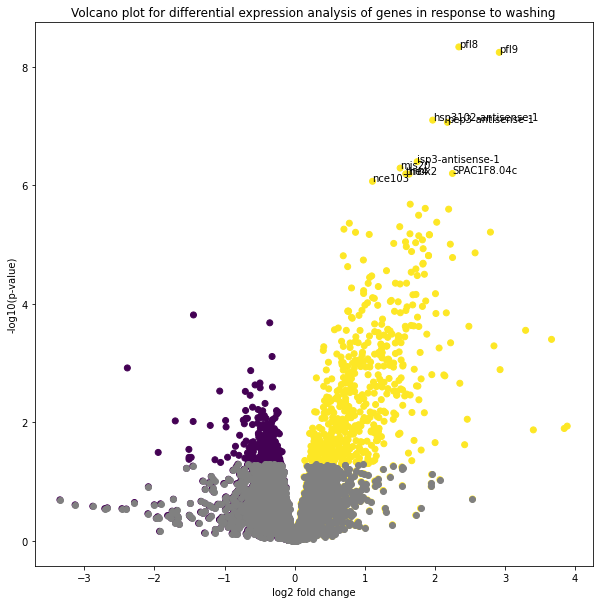

In [ ]:
#add a new column for phenotype, where if washing is above 0.25, then it is 1, otherwise 0
phenotypes_['wash_pheno'] = [1 if i>0.5 else 0 for i in phenotypes_.washing]
#add a new column for phenotype, where if filtering is above 0.25, then it is 1, otherwise 0
phenotypes_['filter_pheno'] = [1 if i>0.5 else 0 for i in phenotypes_.filtering]
#perform differential expression analysis in data_ for those genotypes that have wash_pheno==1 vs those that have wash_pheno==0
#take the mean for each group, then divide them and take the log2 and get p-value
#create a results df, with columns gene, log2 fold change, p-value
wash_results = pd.DataFrame(columns=['gene','log2 fold change','p-value'])
for i in range(data_.shape[0]):
    print(i/float(data_.shape[0]))
    #get the mean of the values for each group
    mean_0 = np.mean(data_[i,phenotypes_.wash_pheno==0])
    mean_1 = np.mean(data_[i,phenotypes_.wash_pheno==1])
    #get the log2 fold change
    log2_fold_change = np.log2(mean_1/mean_0)
    #get the p-value
    p_val = st.ttest_ind(data_[i,phenotypes_.wash_pheno==0],data_[i,phenotypes_.wash_pheno==1])[1]
    #add the results to the df
    wash_results = wash_results.append({'gene':ind_names[i],'log2 fold change':log2_fold_change,'p-value':p_val},ignore_index=True)
#remove nans
wash_results = wash_results.dropna()
#perform bonferroni correction
wash_results['p-value adj'] = wash_results['p-value']*wash_results.shape[0]
#order by p-value
wash_results = wash_results.sort_values(by='p-value')

#using the log2fold change and p values create a volcano plot

#create a large figure
plt.figure(figsize=(10,10))
#make volcano plot using matplotlib and color points whether they are up or down regulated
#to the p_values add 10^-300 to avoid taking log of 0
plt.scatter(wash_results['log2 fold change'],-np.log10(np.array(wash_results['p-value']+10**-100,dtype=float)),c=wash_results['log2 fold change']>0)
#if logpval is less than threshold, color with gray
plt.scatter(wash_results['log2 fold change'][wash_results['p-value']>0.05],-np.log10(np.array(wash_results['p-value'][wash_results['p-value']>0.05]+10**-100,dtype=float)),c='gray')
#make plot pretty
plt.xlabel('log2 fold change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot for differential expression analysis of genes in response to washing')
#label very highly significant points
for i in range(wash_results.shape[0]):
    if wash_results['p-value adj'].values[i]<0.01:
        plt.annotate(wash_results.gene.values[i],(wash_results['log2 fold change'].values[i],-np.log10(wash_results['p-value'].values[i])))
plt.show()



0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

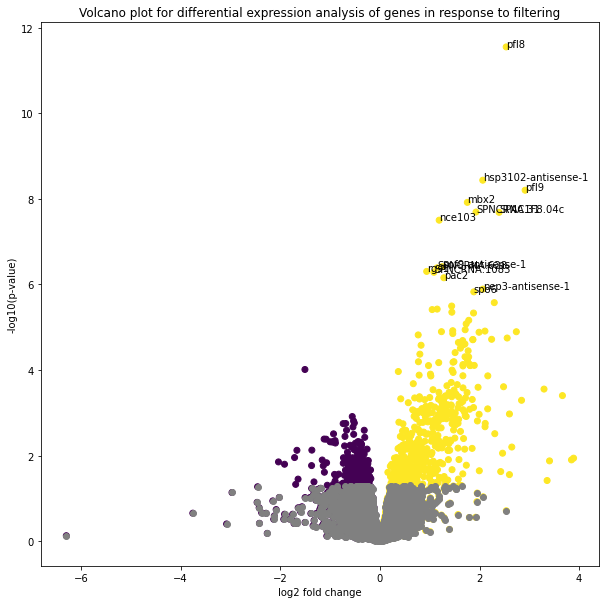

In [ ]:
#do the same for filtering_results

filter_results = pd.DataFrame(columns=['gene','log2 fold change','p-value'])
for i in range(data_.shape[0]):
    print(i/float(data_.shape[0]))
    #get the mean of the values for each group
    mean_0 = np.mean(data_[i,phenotypes_.filter_pheno==0])
    mean_1 = np.mean(data_[i,phenotypes_.filter_pheno==1])
    #get the log2 fold change
    log2_fold_change = np.log2(mean_1/mean_0)
    #get the p-value
    p_val = st.ttest_ind(data_[i,phenotypes_.filter_pheno==0],data_[i,phenotypes_.filter_pheno==1])[1]
    #add the results to the df
    filter_results = filter_results.append({'gene':ind_names[i],'log2 fold change':log2_fold_change,'p-value':p_val},ignore_index=True)
#remove nans
filter_results = filter_results.dropna()
#perform bonferroni correction
filter_results['p-value adj'] = filter_results['p-value']*filter_results.shape[0]
#order by p-value
filter_results = filter_results.sort_values(by='p-value')

#using the log2fold change and p values create a volcano plot
plt.figure(figsize=(10,10))
#make volcano plot using matplotlib and color points whether they are up or down regulated
#to the p_values add 10^-300 to avoid taking log of 0
plt.scatter(filter_results['log2 fold change'],-np.log10(np.array(filter_results['p-value']+10**-100,dtype=float)),c=filter_results['log2 fold change']>0)
#if logpval is less than threshold, color with gray
plt.scatter(filter_results['log2 fold change'][filter_results['p-value']>0.05],-np.log10(np.array(filter_results['p-value'][filter_results['p-value']>0.05]+10**-100,dtype=float)),c='gray')
#make plot pretty
plt.xlabel('log2 fold change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot for differential expression analysis of genes in response to filtering')
#label very highly significant points
for i in range(filter_results.shape[0]):
    if filter_results['p-value adj'].values[i]<0.01:
        plt.annotate(filter_results.gene.values[i],(filter_results['log2 fold change'].values[i],-np.log10(filter_results['p-value'].values[i])))



In [ ]:
filter_results.head(20)

gene log2 fold change   p-value p-value adj
807                  pfl8         2.534274       0.0         0.0
6316  hsp3102-antisense-1         2.064068       0.0    0.000024
594                  pfl9         2.914583       0.0    0.000042
3423                 mbx2         1.754587       0.0     0.00008
6060           SPNCRNA.31         1.928366       0.0    0.000135
805           SPAC1F8.04c          2.39149       0.0    0.000137
4150               nce103          1.18902       0.0    0.000209
5696     pof9-antisense-1         1.246265       0.0    0.002551
6332          SPNCRNA.628         1.145874       0.0    0.002716
938                  rgs1            0.938       0.0    0.003289
5268         SPNCRNA.1083         1.083167  0.000001    0.003453
1426                 pac2         1.282724  0.000001    0.004626
5482     pep3-antisense-1         2.066386  0.000001    0.008522
2892                 spo6         1.884207  0.000001    0.009888
6597          SPNCRNA.871         2.294998  0.000003    0.017653
3931                mis20          1.43992  0.000003    0.021219
5673          SPNCRNA.145         1.148575  0.000004     0.02502
2960         SPBC18E5.09c         1.048284  0.000004    0.025679
4599                 spn6         1.443623  0.000004    0.029582
4024                pho84         1.878851  0.000005    0.030934

In [ ]:
cbf12_corr.head(50)


gene correlation p-value p-value adj  \
4274             cbf12         1.0     0.0         0.0   
2749              rix7    0.786241     0.0         0.0   
4715        SPCC320.03    0.767189     0.0         0.0   
1851              cdr1    0.760393     0.0         0.0   
1292      SPAC29E6.06c    0.757506     0.0         0.0   
4337              gdh2    0.744117     0.0         0.0   
4454             utp21    0.742046     0.0         0.0   
4544             vid21    0.734971     0.0         0.0   
4886             sup35    0.728954     0.0    0.000001   
2504              mef1    0.723555     0.0    0.000001   
1296              nst1    0.722288     0.0    0.000001   
3480              cdh1    0.706267     0.0    0.000004   
4526             cdc11    0.704873     0.0    0.000004   
5085              for3    0.701524     0.0    0.000006   
4281              fft2    0.700533     0.0    0.000006   
4410             ubp12    0.699632     0.0    0.000007   
4415              adn3    0.693834     0.0     0.00001   
4012              rmt3    0.691058     0.0    0.000013   
2806              top1    0.690731     0.0    0.000013   
3320              gef3     0.68941     0.0    0.000015   
819              cdc17    0.688886     0.0    0.000015   
3752              mod5    0.686022     0.0    0.000019   
1063             htr12    0.685946     0.0    0.000019   
2599            kap123    0.684966     0.0     0.00002   
1635              ade4    0.684316     0.0    0.000021   
185               mkt1    0.682136     0.0    0.000025   
2446             mtr10    0.681743     0.0    0.000026   
990               frs1    0.679823     0.0     0.00003   
1110             mug70    0.676266     0.0    0.000038   
6674       SPNCRNA.941    0.675628     0.0     0.00004   
4933              sec5    0.674279     0.0    0.000044   
5993       SPNCRNA.236    0.673396     0.0    0.000047   
4036              apl2    0.673009     0.0    0.000048   
3013              prs1    0.672587     0.0     0.00005   
2233              per1    0.672012     0.0    0.000052   
4939              epe1    0.671284     0.0    0.000054   
4164             spt16    0.668354     0.0    0.000067   
1678              puf5    0.667973     0.0    0.000068   
2507              ani1    0.667958     0.0    0.000068   
5484  opt3-antisense-1    0.667911     0.0    0.000069   
52                pma1    0.664837     0.0    0.000085   
2825              cft2    0.663422     0.0    0.000093   
4749             naa15    0.662479     0.0    0.000099   
1235              cdc1    0.656935     0.0    0.000144   
92                fhl1    0.656199     0.0    0.000151   
538               sec3    0.655816     0.0    0.000155   
1766              ura3    0.655048     0.0    0.000163   
1517              elf1     0.65386     0.0    0.000176   
2847             prp16    0.652623     0.0    0.000191   
1330            kap104    0.652508     0.0    0.000193   

                                               function  \
4274  DNA-binding transcription factor, CBF1/Su(H)/L...   
2749                      ribosome assembly ATPase Rix7   
4715                   DNA-binding transcription factor   
1851  serine/threonine protein kinase (NIM1 family) ...   
1292              cytoplasmic cysteine-tRNA ligase Crs1   
4337         NAD-dependent glutamate dehydrogenase Gdh2   
4454                 U3 snoRNP-associated protein Utp21   
4544  NuA4 histone acetyltransferase complex subunit...   
4886  cytoplasmic translation release factor class I...   
2504  mitochondrial translation elongation factor G ...   
1296                             P-body component, Nst1   
3480                          18S rRNA dimethylase Cdh1   
4526  SIN component scaffold protein, centriolin ort...   
5085                                        formin For3   
4281                        SMARCAD1 family ATPase Fft2   
4410       CSN-associated deubiquitinating enzyme Ubp12   
4415              DNA-binding transcription factor Adn3 

In [ ]:
puf5_vals = data_full[ind_names=="puf5",:]
puf5_corr = find_correlated_genes(data_full,puf5_vals[0])

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

In [ ]:
puf5_corr.head(50)

gene correlation p-value p-value adj  \
1678          puf5         1.0     0.0         0.0   
4337          gdh2     0.77278     0.0         0.0   
306           slr1    0.708424     0.0         0.0   
1049          fep1    0.704478     0.0         0.0   
3480          cdh1    0.702053     0.0         0.0   
1844          rex1    0.699689     0.0         0.0   
990           frs1    0.698918     0.0         0.0   
52            pma1     0.68815     0.0    0.000001   
1628         sec71    0.687196     0.0    0.000001   
2599        kap123    0.682956     0.0    0.000001   
6330   SPNCRNA.626    0.679772     0.0    0.000001   
3289          pcf1    0.679376     0.0    0.000001   
5068    SPCC825.01    0.677865     0.0    0.000001   
4274         cbf12    0.677313     0.0    0.000002   
1851          cdr1    0.677282     0.0    0.000002   
1895    SPAC694.02    0.672418     0.0    0.000002   
3829          gap1    0.670672     0.0    0.000003   
2735          zrt1    0.668752     0.0    0.000003   
2233          per1    0.666992     0.0    0.000004   
5074          grc3    0.665209     0.0    0.000004   
1256          cbf5    0.659472     0.0    0.000006   
4012          rmt3    0.658599     0.0    0.000007   
4715    SPCC320.03    0.656566     0.0    0.000008   
755           lkh1    0.656035     0.0    0.000008   
3090          mcm6    0.653874     0.0     0.00001   
2293          glt1    0.653034     0.0    0.000011   
4538          vcx1    0.651716     0.0    0.000012   
719           elo2    0.651706     0.0    0.000012   
3827         nop56    0.649731     0.0    0.000014   
1167          jmj1    0.649295     0.0    0.000014   
4733   SPCC330.07c    0.649293     0.0    0.000014   
469   SPAC17A2.10c    0.647657     0.0    0.000016   
1150          isp7    0.646578     0.0    0.000017   
5089         ucp12    0.644888     0.0     0.00002   
44           mms19    0.643429     0.0    0.000022   
4663          skb5    0.638748     0.0    0.000031   
2581         tim44    0.638294     0.0    0.000032   
4791          set9    0.637896     0.0    0.000033   
4268          drs1    0.636185     0.0    0.000037   
3786          arg5    0.635284     0.0     0.00004   
3481         efc25    0.634264     0.0    0.000043   
3063          clg1    0.633899     0.0    0.000044   
2973          ubp4     0.63263     0.0    0.000048   
80            ppk1    0.631746     0.0    0.000051   
2446         mtr10    0.631726     0.0    0.000051   
4097          rpa2    0.631142     0.0    0.000053   
4304          pgp1    0.630916     0.0    0.000054   
3013          prs1    0.629988     0.0    0.000058   
614           chp1    0.629265     0.0    0.000061   
5386  SPNCRNA.1190     0.62826     0.0    0.000066   

                                               function  \
1678            pumilio family RNA-binding protein Puf5   
4337         NAD-dependent glutamate dehydrogenase Gdh2   
306              RNA-binding protein, LARP1 family Slr1   
1049  DNA-binding transcription factor, iron-sensing...   
3480                          18S rRNA dimethylase Cdh1   
1844                        3'-5'- exoribonuclease Rex1   
990   cytoplasmic phenylalanine-tRNA ligase beta sub...   
52    plasma membrane P-type proton exporting ATPase...   
1628                                            Arf GEF   
2599  karyopherin/importin beta family nuclear impor...   
6330  intergenic RNA (predicted), possible alternati...   
3289  histone H3-H4 chaperone, CAF assembly factor (...   
5068  ATPase, involved in cytoplasmic translational ...   
4274  DNA-binding transcription factor, CBF1/Su(H)/L...   
1851  serine/threonine protein kinase (NIM1 family) ...   
1895  DEAD/DEAH box helicase, human DDL60 and DDL60L...   
3829                                       Ras GAP Gap1   
2735  plasma membrane ZIP zinc transmembrane transpo...   
2233  plasma membrane amino acid transmembrane trans...   
5074             polynucleotide 5'-hydroxyl-kinase Grc3   
1256                

In [ ]:
#find pvg1 in puf5_corr
puf5_corr[puf5_corr.gene=="SPBPB7E8.01"]

Empty DataFrame
Columns: [gene, correlation, p-value, p-value adj, function, sense function]
Index: []

In [ ]:
#is pvg1 in the dataset
"SPBPB7E8.01" in ind_names

True

In [ ]:
wash_df

gene correlation   p-value p-value adj  \
807                       pfl8    0.755394       0.0         0.0   
3423                      mbx2    0.707523       0.0    0.000004   
594                       pfl9     0.69685       0.0    0.000008   
6316       hsp3102-antisense-1    0.680254       0.0    0.000029   
805                SPAC1F8.04c    0.656457       0.0    0.000149   
4150                    nce103    0.650311       0.0    0.000222   
5482          pep3-antisense-1    0.649353       0.0    0.000236   
6308          isp3-antisense-1    0.627371       0.0    0.000919   
3244                      the4    0.622556       0.0     0.00122   
2892                      spo6    0.618629       0.0    0.001533   
3931                     mis20    0.610405       0.0    0.002445   
5696          pof9-antisense-1    0.607136       0.0    0.002933   
5268              SPNCRNA.1083    0.606103       0.0    0.003105   
6442                SPNCRNA.73    0.601101  0.000001    0.004083   
1426                      pac2    0.599514  0.000001    0.004449   
6017               SPNCRNA.264    0.595517  0.000001    0.005511   
5912   SPBC1861.05-antisense-1    0.591225  0.000001    0.006913   
3534                      pfl7    0.590282  0.000001    0.007263   
6682          sut1-antisense-1    0.589672  0.000001    0.007498   
6406  SPAC1687.19c-antisense-1    0.586698  0.000001     0.00875   
4599                      spn6    0.586342  0.000001    0.008912   
4024                     pho84    0.584182  0.000001    0.009959   
6597               SPNCRNA.871     0.58357  0.000002    0.010276   
5666              SPNCRNA.1443    0.583026  0.000002    0.010565   
1811                      gmh1    0.576686  0.000002    0.014552   
6494               SPNCRNA.777    0.576256  0.000002    0.014867   
6598          eta2-antisense-1    0.575408  0.000002    0.015509   
6332               SPNCRNA.628    0.574817  0.000002    0.015971   
5558  SPBC1271.07c-antisense-1     0.57471  0.000002    0.016057   
6154               SPNCRNA.421    0.572504  0.000003    0.017907   
5560              SPNCRNA.1347    0.572123  0.000003    0.018247   
6410          mss1-antisense-1    0.572065  0.000003    0.018299   
6056               SPNCRNA.304    0.571887  0.000003     0.01846   
6495               SPNCRNA.778    0.565693  0.000004    0.024956   
5673               SPNCRNA.145     0.56282  0.000004    0.028645   
4531                      gsf2    0.561241  0.000005    0.030881   
5263          rad2-antisense-1    0.560289  0.000005    0.032306   
6453                SPNCRNA.74    0.558361  0.000005    0.035386   
938                       rgs1    0.557889  0.000005    0.036179   
4029                      ecl3    0.555092  0.000006    0.041236   
5807         taf73-antisense-1    0.553994  0.000006    0.043394   
806                       isp3    0.553914  0.000006    0.043555   
5489          alr1-antisense-1    0.552438  0.000007    0.046634   
6431                SPNCRNA.72    0.551732  0.000007    0.048178   

                                               function  \
807           cell surface glycoprotein, flocculin Pfl8   
3423    DNA-binding transcription factor, MADS-box Pvg4   
594   cell surface glycoprotein, flocculin Pfl9, DIP...   
6316                          antisense RNA (predicted)   
805    hydrolase, implicated in cellular detoxification   
4150                                 carbonic anhydrase   
5482                          antisense RNA (predicted)   
6308                          antisense RNA (predicted)   
3244                  acyl-coenzyme A thioesterase The4   
2892   Spo4-Spo6 kinase complex regulatory subunit Spo6   
3931                      centromere protein Mis20/Eic2   
5696                          antisense RNA (predicted)   
5268                         intergenic RNA (predicted)   
6442                                            unknown   
1426           cAMP-independent regulatory protein Pac2   
6017                 

In [ ]:
#does filt_df have a gene starting with rpl
filt_df[filt_df.gene.str.startswith("isp3")]

Empty DataFrame
Columns: [gene, correlation, p-value, p-value adj, function, sense function]
Index: []

In [ ]:
filt_df

gene correlation   p-value p-value adj  \
3423                 mbx2    0.756145       0.0         0.0   
807                  pfl8    0.700905       0.0    0.000006   
1426                 pac2     0.61812       0.0    0.001578   
4038                 pfl3    0.603282  0.000001    0.003625   
5696     pof9-antisense-1     0.58575  0.000001    0.009188   
4150               nce103    0.583954  0.000001    0.010076   
805           SPAC1F8.04c    0.582058  0.000002    0.011099   
5268         SPNCRNA.1083    0.577086  0.000002    0.014263   
594                  pfl9    0.572507  0.000003    0.017904   
2892                 spo6    0.572064  0.000003      0.0183   
6316  hsp3102-antisense-1     0.56859  0.000003     0.02169   
5263     rad2-antisense-1    0.565241  0.000004    0.025506   
4531                 gsf2    0.565167  0.000004    0.025597   

                                               function  \
3423    DNA-binding transcription factor, MADS-box Pvg4   
807           cell surface glycoprotein, flocculin Pfl8   
1426           cAMP-independent regulatory protein Pac2   
4038  cell surface glycoprotein, flocculin Pfl3, DIP...   
5696                          antisense RNA (predicted)   
4150                                 carbonic anhydrase   
805    hydrolase, implicated in cellular detoxification   
5268                         intergenic RNA (predicted)   
594   cell surface glycoprotein, flocculin Pfl9, DIP...   
2892   Spo4-Spo6 kinase complex regulatory subunit Spo6   
6316                          antisense RNA (predicted)   
5263  antisense RNA (predicted), possible alternativ...   
4531  cell surface glycoprotein, galactose-specific ...   

                                         sense function  
3423    DNA-binding transcription factor, MADS-box Pvg4  
807           cell surface glycoprotein, flocculin Pfl8  
1426           cAMP-independent regulatory protein Pac2  
4038  cell surface glycoprotein, flocculin Pfl3, DIP...  
5696                                 F-box protein Pof9  
4150                                 carbonic anhydrase  
805    hydrolase, implicated in cellular detoxification  
5268                         intergenic RNA (predicted)  
594   cell surface glycoprotein, flocculin Pfl9, DIP...  
2892   Spo4-Spo6 kinase complex regulatory subunit Spo6  
6316                             glyoxylase III Hsp3102  
5263                            FEN-1 endonuclease Rad2  
4531  cell surface glycoprotein, galactose-specific ...

In [ ]:
_corr.head(50)

NameError: name 'gsf1_corr' is not defined

In [ ]:
#get correlation for gsf2 and other genes
gsf1_vals = data_full[ind_names=='gsf1',:]
gsf1_corr = find_correlated_genes(data_full,gsf1_vals[0])
gsf1_corr.head(50)

0.0
0.00014843402107763098
0.00029686804215526197
0.000445302063232893
0.0005937360843105239
0.0007421701053881549
0.000890604126465786
0.0010390381475434169
0.0011874721686210479
0.0013359061896986788
0.0014843402107763098
0.001632774231853941
0.001781208252931572
0.001929642274009203
0.0020780762950868338
0.002226510316164465
0.0023749443372420957
0.002523378358319727
0.0026718123793973577
0.002820246400474989
0.0029686804215526197
0.003117114442630251
0.003265548463707882
0.003413982484785513
0.003562416505863144
0.0037108505269407748
0.003859284548018406
0.004007718569096037
0.0041561525901736675
0.004304586611251299
0.00445302063232893
0.004601454653406561
0.0047498886744841914
0.004898322695561823
0.005046756716639454
0.005195190737717085
0.005343624758794715
0.005492058779872347
0.005640492800949978
0.005788926822027609
0.005937360843105239
0.0060857948641828705
0.006234228885260502
0.006382662906338133
0.006531096927415764
0.006679530948493394
0.006827964969571026
0.00697639899

gene correlation p-value p-value adj  \
2627          gsf1         1.0     0.0         0.0   
3565    SPBC365.16    0.931431     0.0         0.0   
3782  SPBC56F2.05c    0.930579     0.0         0.0   
4502          sts5    0.916638     0.0         0.0   
4213   SPBPB7E8.02       0.912     0.0         0.0   
4361          fil1     0.90722     0.0         0.0   
432           gti1    0.904507     0.0         0.0   
2070          cgs1    0.898845     0.0         0.0   
4051          pib2    0.894714     0.0         0.0   
620           edc1    0.891242     0.0         0.0   
4615          gaf1    0.889914     0.0         0.0   
1755          esc1    0.887671     0.0         0.0   
4657          gad8     0.88736     0.0         0.0   
1156          loz1    0.886574     0.0         0.0   
3173          ssn6    0.885528     0.0         0.0   
4449          sap1     0.88444     0.0         0.0   
2538          ptr2    0.882094     0.0         0.0   
3266          pho7    0.881701     0.0         0.0   
4960          rgf3    0.880145     0.0         0.0   
3425   SPBC31A8.02    0.877177     0.0         0.0   
1051          ste7    0.876698     0.0         0.0   
4500          scw1    0.876605     0.0         0.0   
3814    SPBC609.01    0.876215     0.0         0.0   
3676          wis1    0.876081     0.0         0.0   
169           cip2    0.871921     0.0         0.0   
3396          wsc1    0.870534     0.0         0.0   
5563   SPNCRNA.135    0.870431     0.0         0.0   
4251          msy1    0.869461     0.0         0.0   
1611          isp6    0.867052     0.0         0.0   
1263          rga3    0.866831     0.0         0.0   
4366         duf89    0.865977     0.0         0.0   
1202          pyp1    0.865871     0.0         0.0   
4533          git3    0.865748     0.0         0.0   
4460   SPCC1672.14    0.865241     0.0         0.0   
2855          zfs1    0.858772     0.0         0.0   
3644          kgd1    0.854495     0.0         0.0   
923           sck2    0.853294     0.0         0.0   
2315          pmc1    0.849338     0.0         0.0   
3909          php2    0.848669     0.0         0.0   
1079          ppk9    0.847641     0.0         0.0   
3062          scr1    0.846143     0.0         0.0   
218           gld1    0.844575     0.0         0.0   
1797         mug86    0.843054     0.0         0.0   
2654          shk1    0.835893     0.0         0.0   
5006          mmi1    0.834052     0.0         0.0   
2997          pat1    0.833842     0.0         0.0   
3012          rcr1    0.832786     0.0         0.0   
1049          fep1    0.832581     0.0         0.0   
219           vta1    0.831554     0.0         0.0   
755           lkh1     0.82722     0.0         0.0   

                                               function  \
2627  DNA-binding transcription factor, zf-fungal bi...   
3565  mitochondrial membrane protein, conserved in y...   
3782                   DNA-binding transcription factor   
4502  cytoplasmic P body 3'-5'-exoribonuclease, Dis3...   
4213                                PSP1 family protein   
4361     DNA-binding transcription factor, zf-GATA type   
432    gluconate transmembrane transporter inducer Gti1   
2070  cAMP-dependent protein kinase regulatory subun...   
4051  zf-FYVE type zinc finger protein and glutamine...   
620       Dcp2-Dcp1 mRNA-decapping complex subunit Edc1   
4615              DNA-binding transcription factor Gaf1   
1755              DNA-binding transcription factor Esc1   
4657  serine/threonine protein kinase (AGC family) Gad8   
1156      DNA-binding transcription factor zf-C2H2 type   
3173                   transcriptional corepressor Ssn6   
4449                     switch-activating protein Sap1   
2538  plasma membrane PTR family peptide transmembra...   
3266              DNA-binding transcription factor Pho7   
4960                              RhoGEF for Rho1, Rgf3   
3425                                         pseudogene   
1051  meiosis-specif

In [ ]:
#is rad24 in gsf1_corr

gene correlation   p-value p-value adj  \
2627          gsf1         1.0       0.0         0.0   
3565    SPBC365.16    0.931431       0.0         0.0   
3782  SPBC56F2.05c    0.930579       0.0         0.0   
4502          sts5    0.916638       0.0         0.0   
4213   SPBPB7E8.02       0.912       0.0         0.0   
...            ...         ...       ...         ...   
4085          sbg1   -0.514369  0.000007    0.048665   
5821   SPNCRNA.159   -0.514325  0.000007    0.048767   
5654  SPNCRNA.1432    -0.51424  0.000007    0.048967   
4793         cwf20   -0.514214  0.000007    0.049026   
748           cct2    0.513983  0.000007    0.049572   

                                               function  \
2627  DNA-binding transcription factor, zf-fungal bi...   
3565  mitochondrial membrane protein, conserved in y...   
3782                   DNA-binding transcription factor   
4502  cytoplasmic P body 3'-5'-exoribonuclease, Dis3...   
4213                                PSP1 family protein   
...                                                 ...   
4085  plasma membrane-actinomyosin ring linker prote...   
5821                                                NaN   
5654  intergenic RNA (predicted), possible alternati...   
4793                  complexed with Cdc5 protein Cwf20   
748   chaperonin-containing T-complex beta subunit Cct2   

                                         sense function  
2627  DNA-binding transcription factor, zf-fungal bi...  
3565  mitochondrial membrane protein, conserved in y...  
3782                   DNA-binding transcription factor  
4502  cytoplasmic P body 3'-5'-exoribonuclease, Dis3...  
4213                                PSP1 family protein  
...                                                 ...  
4085  plasma membrane-actinomyosin ring linker prote...  
5821                                                NaN  
5654  intergenic RNA (predicted), possible alternati...  
4793                  complexed with Cdc5 protein Cwf20  
748   chaperonin-containing T-complex beta subunit Cct2  

[1314 rows x 6 columns]

In [ ]:
wash_results.head(50)

gene log2 fold change   p-value p-value adj
807                       pfl8         2.341258       0.0    0.000031
594                       pfl9         2.918144       0.0    0.000038
6316       hsp3102-antisense-1         1.968129       0.0     0.00053
5482          pep3-antisense-1         2.178867       0.0    0.000577
6308          isp3-antisense-1         1.746757       0.0    0.002658
3931                     mis20         1.504169  0.000001    0.003406
805                SPAC1F8.04c         2.250376  0.000001    0.004196
3244                      the4         1.583832  0.000001    0.004261
3423                      mbx2         1.631185  0.000001    0.004314
4150                    nce103         1.109699  0.000001    0.005692
6495               SPNCRNA.778         1.647673  0.000002     0.01385
2892                      spo6         1.862137  0.000002    0.016289
6017               SPNCRNA.264         2.196026  0.000003    0.016788
6442                SPNCRNA.73         1.767669  0.000003     0.02126
6498               SPNCRNA.780         2.026017  0.000004    0.027894
5666              SPNCRNA.1443         0.778955  0.000004     0.02896
5912   SPBC1861.05-antisense-1         1.498467  0.000005    0.033164
6398                      tos1         0.702095  0.000005    0.036531
6154               SPNCRNA.421         2.791884  0.000006    0.040957
6682          sut1-antisense-1         0.867352  0.000006     0.04126
5375         rec11-antisense-1         1.644254  0.000007    0.043704
6410          mss1-antisense-1         1.063076  0.000007    0.044796
5560              SPNCRNA.1347          1.92133  0.000007    0.045202
6056               SPNCRNA.304         1.921063  0.000007    0.045569
6494               SPNCRNA.777         1.769757  0.000007    0.047216
5697              SPNCRNA.1472         1.821699  0.000008    0.055334
5558  SPBC1271.07c-antisense-1         1.580722  0.000009    0.059686
1811                      gmh1         1.725224  0.000009    0.061739
4599                      spn6         1.412675   0.00001     0.06353
6597               SPNCRNA.871         2.219681   0.00001    0.065428
6598          eta2-antisense-1         1.591784  0.000011    0.072016
4024                     pho84         1.832084  0.000012    0.077983
6453                SPNCRNA.74         1.666847  0.000013    0.086999
806                       isp3         2.573188  0.000014    0.091633
6043                     meu19         1.908813  0.000015    0.101847
5502              SPNCRNA.1295         1.908938  0.000015    0.102043
5401          rec7-antisense-1         0.692536  0.000015    0.102622
5489          alr1-antisense-1         2.251588  0.000017     0.10986
5268              SPNCRNA.1083         0.979489  0.000018    0.121035
5466              SPNCRNA.1262         1.832134  0.000021    0.137323
5350          gnr1-antisense-1         1.827967  0.000021    0.141808
6315   SPAC5H10.01-antisense-1         0.755716  0.000024    0.156319
3534                      pfl7         1.728893  0.000026    0.171008
6599               SPNCRNA.873         1.309451  0.000028    0.183235
2883               SPBC1773.12         1.661897  0.000029    0.194417
5583         rhp14-antisense-1         1.849801  0.000032    0.210262
5332              SPNCRNA.1141         1.748329  0.000033    0.221341
5696          pof9-antisense-1         1.098611  0.000034    0.224184
5673               SPNCRNA.145         1.068652  0.000036    0.237908
6406  SPAC1687.19c-antisense-1         1.595427  0.000045    0.297343

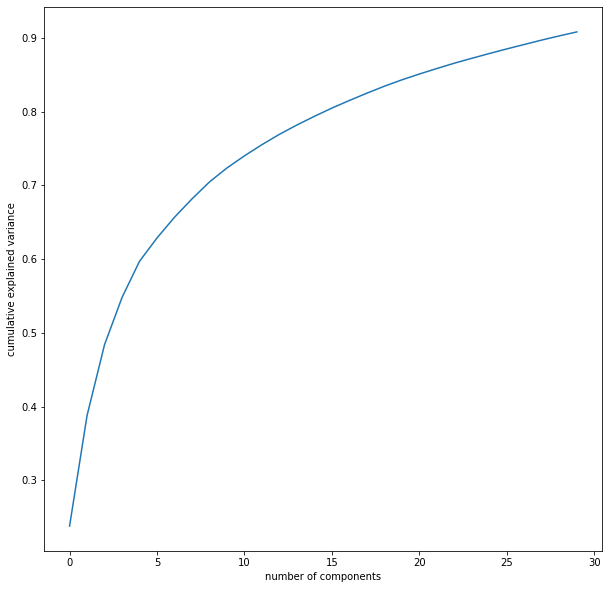

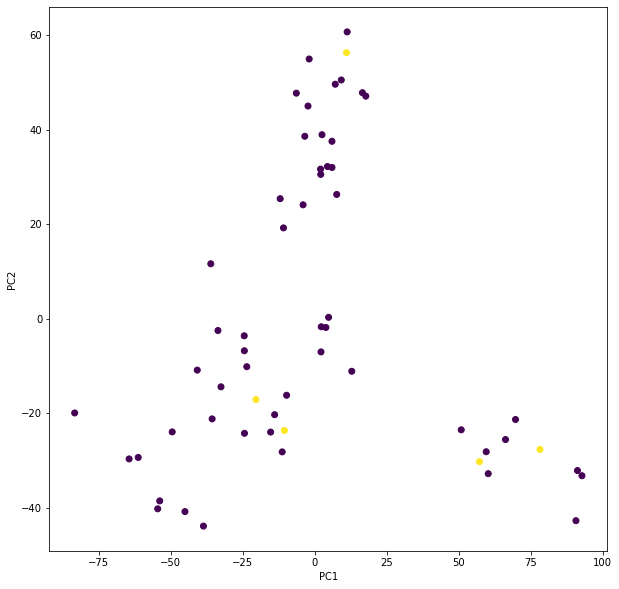

In [ ]:
#perform pca of data_ and then plot the first two components, show their explained variance. Color points by wash_pheno
#import PCA tools from sklearn
from sklearn.decomposition import PCA
#center and scale the rows of data_ using sklearn
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data_.T).T
#perform pca
pca = PCA(n_components=30)
pca.fit(data_scaled.T)
#plot the explained variance
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#transform the data
data_pca = pca.transform(data_scaled.T)
#plot the first two components
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0],data_pca[:,1],c=phenotypes_.wash_pheno)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



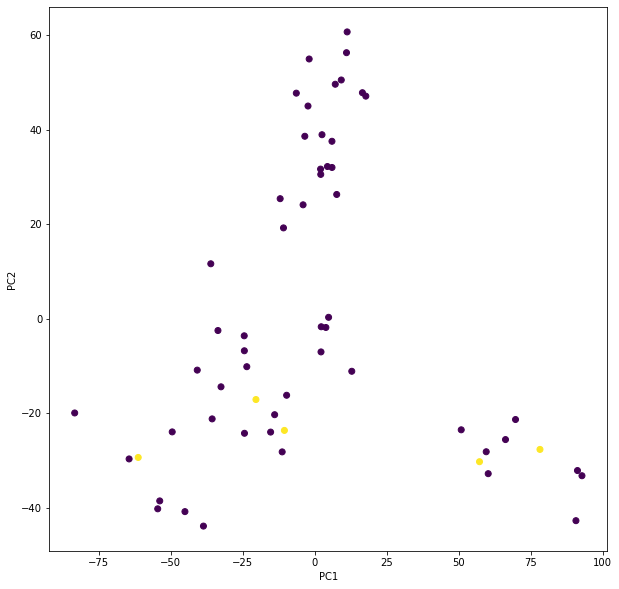

In [ ]:
#plot the first two components
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:,0],data_pca[:,1],c=phenotypes_.filter_pheno)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
